In [178]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np

In [179]:
A_RRP = np.load('Simul/RR_RP.npz',allow_pickle=True)

In [180]:
KK,MM = np.meshgrid(A_RRP['Ks'],A_RRP['ms'])

In [181]:
N = 5000
df_new = pd.read_excel(f'N = {N} seed = 10 QNORMAL w pv.xlsm',index_col=[0,1])
NRP = df_new['r+'].unstack().to_numpy(float).T
NR = df_new['rm'].unstack().to_numpy(float).T
NRPT = df_new['r+_total'].unstack().to_numpy(float).T
NR0 = df_new['r0'].unstack().to_numpy(float).T
NRM = df_new['r-'].unstack().to_numpy(float).T
NRMT = df_new['r-_total'].unstack().to_numpy(float).T
NSIG_S = df_new['sig'].unstack().to_numpy(float).T

In [182]:
# sigma2 =
R,R0,RP,RPl = A_RRP['R'],A_RRP['R0'],A_RRP['RP'],A_RRP['RPl']
RD = R0 - R

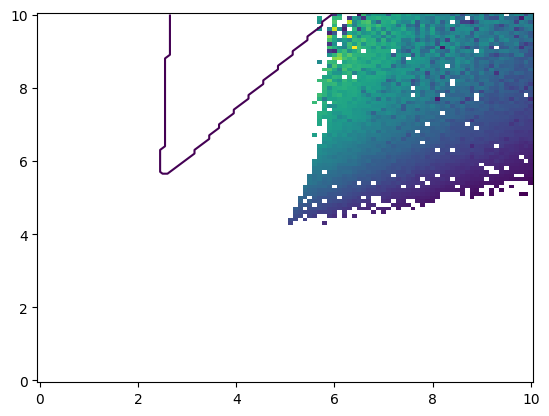

In [189]:
plt.contour(KK,MM,R<2*RPl)
plt.pcolormesh(KK,MM,NRP)

In [183]:
a = 1/np.sqrt(KK*R*MM)
b = 4/np.pi * a - 0.3056*a**3
b = np.where(np.where(a>1.193,1,b)>=1,1,b)

OPS = b*KK*R

/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_21811/1498381093.py:1: RuntimeWarning: divide by zero encountered in divide
  a = 1/np.sqrt(KK*R*MM)
/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_21811/1498381093.py:2: RuntimeWarning: invalid value encountered in subtract
  b = 4/np.pi * a - 0.3056*a**3


In [7]:
RP_T = np.nanmax((RP,RD/2),axis=(0,1))
R_TM = R0 - MM*KK*R0*RP/(MM**2*OPS**2 + 1)

/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_21811/3126430851.py:1: RuntimeWarning: All-NaN axis encountered
  RP_T = np.nanmax((RP,RD/2),axis=(0,1))


In [8]:
sig_r = 2*RP*np.sqrt(1/2 - MM*KK*R0/(4*(4*MM**2*OPS**2 + 1)) - (MM*KK*R0/(2*(MM**2*OPS**2 + 1)))**2)

In [9]:
R_KC = np.load('Simul/R_Kc.npz',allow_pickle=True)
K_cs = R_KC['Kcs']
m_Kc = R_KC['ms']
K_mins = R_KC['K_mins']

In [10]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]


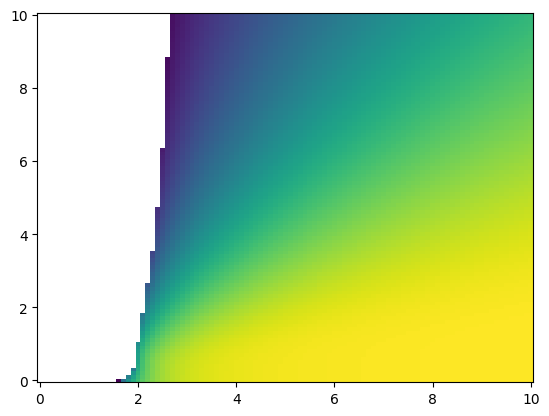

In [51]:
plt.pcolormesh(KK,MM,R0)

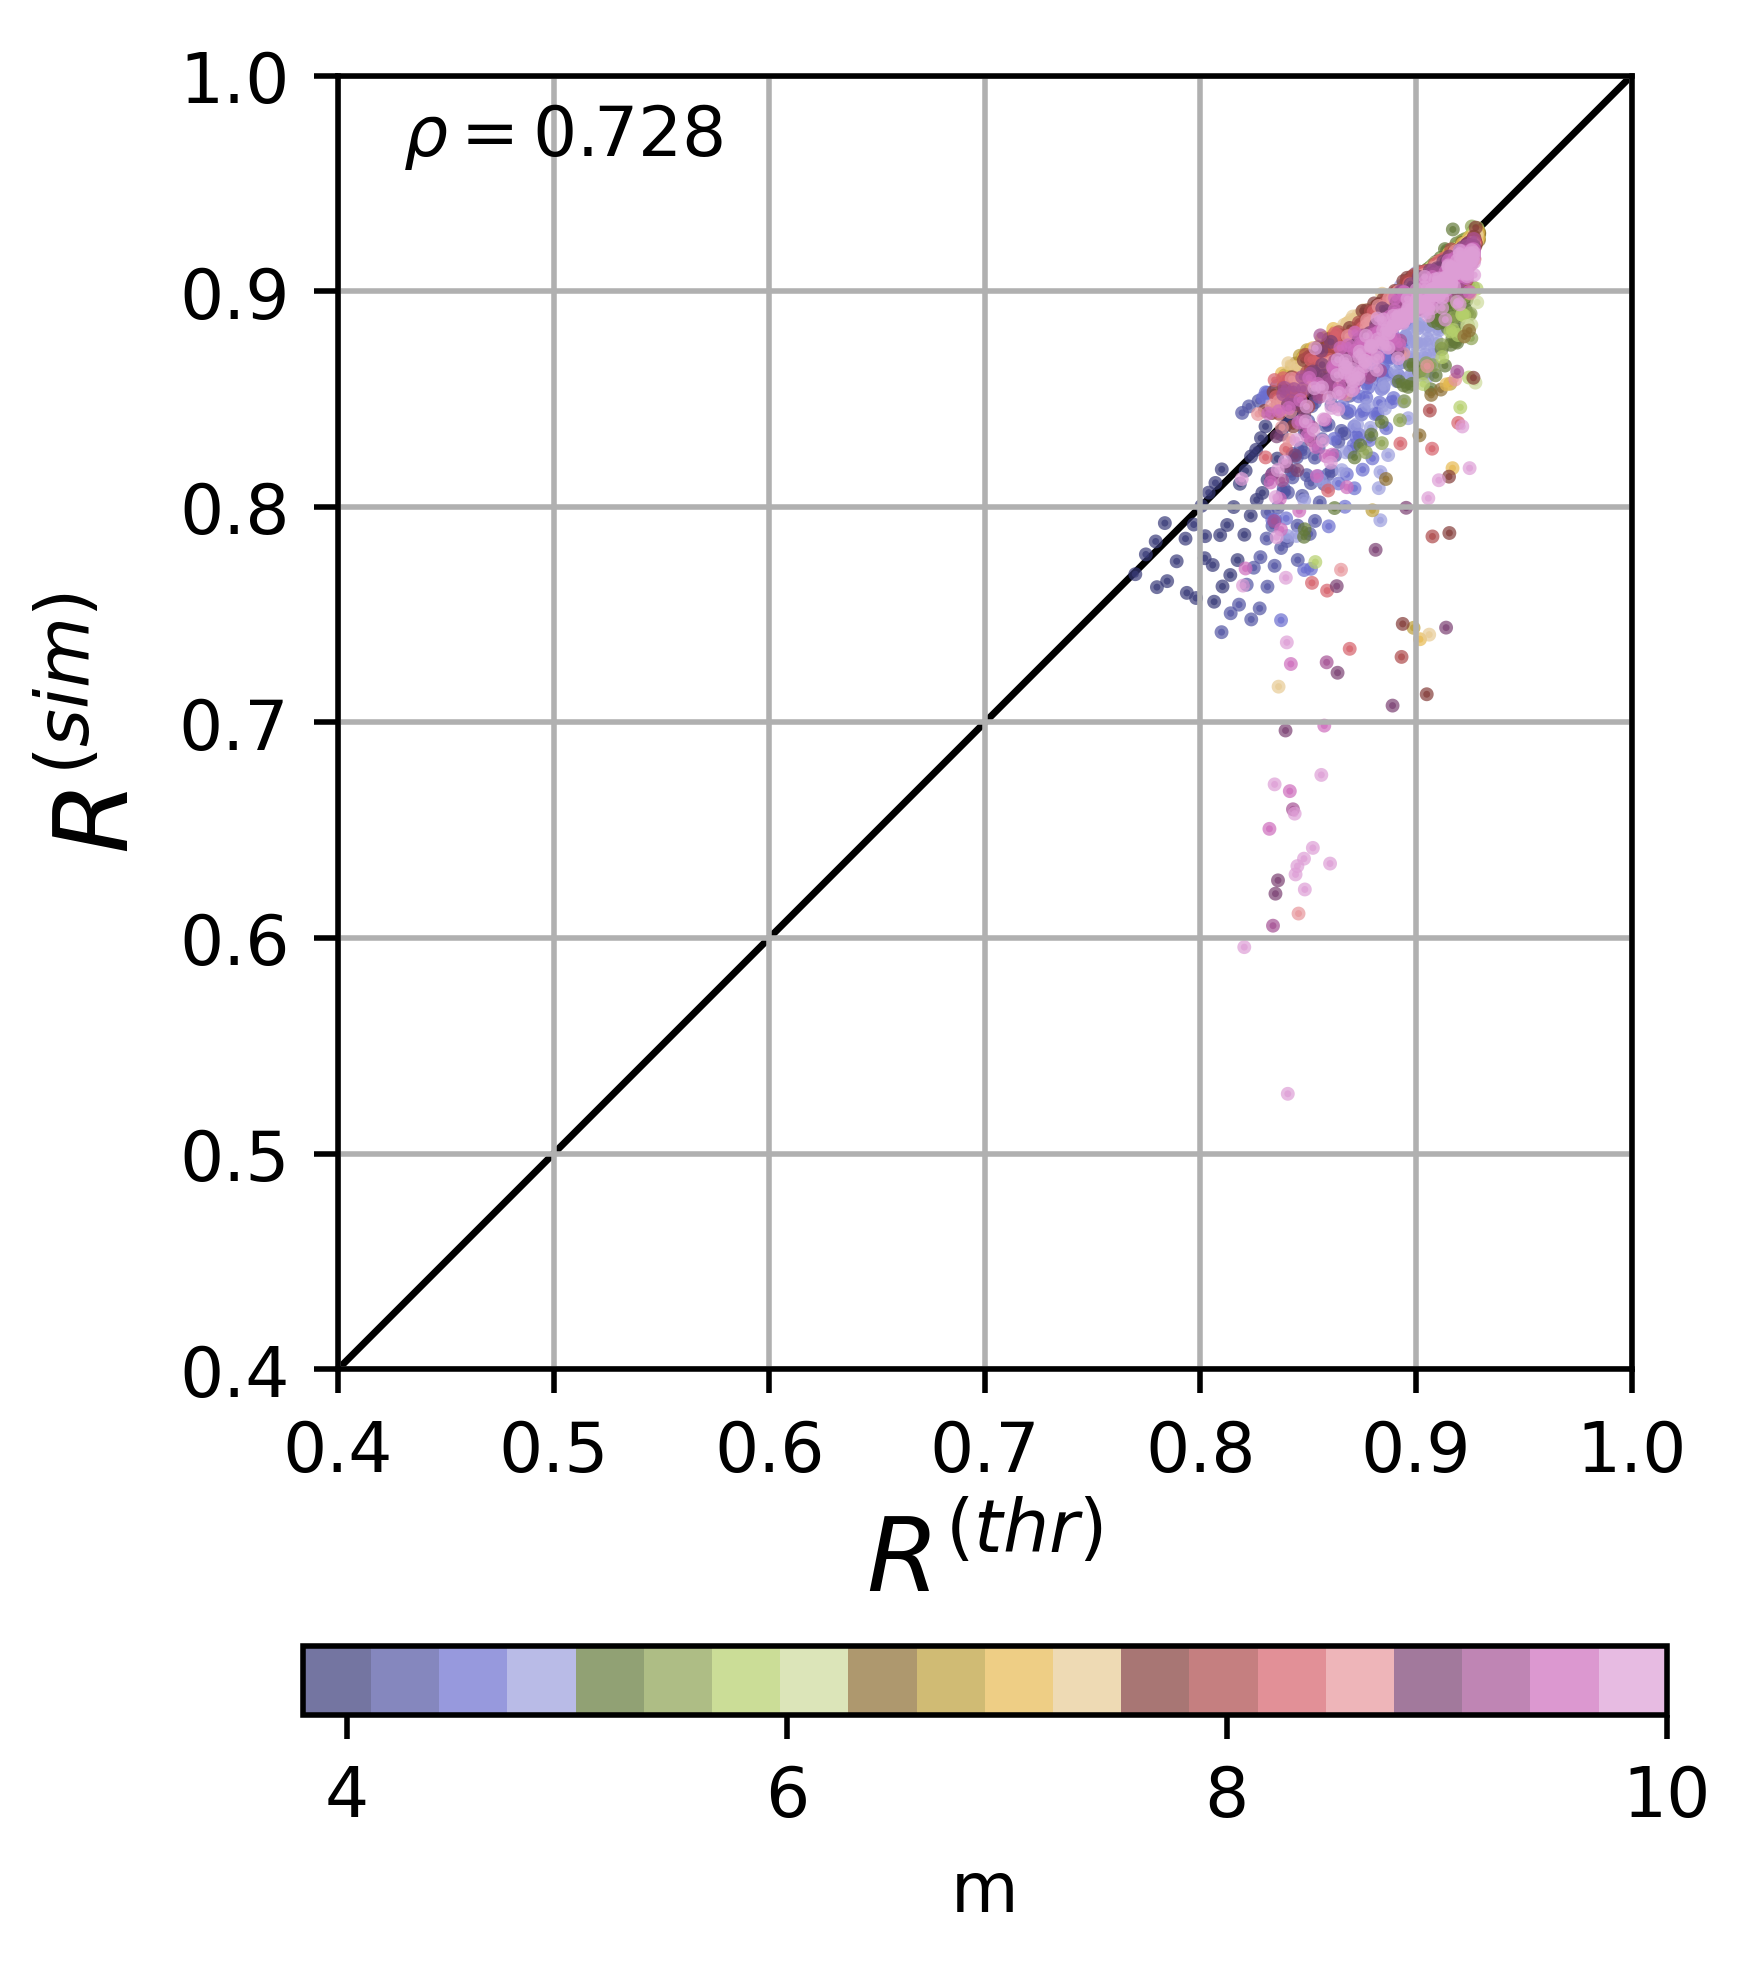

In [ ]:
RP_T = np.where(~np.isnan(RP),RP,0)
Rthr = R0 + 2*RP_T
Rsim = NR0 + np.where(~np.isnan(NRP),NRP,0) + np.where(~np.isnan(NRM),NRM,0)
plt.figure(dpi=500)
plt.scatter(Rthr,Rsim,s=1,c=MM,alpha=0.7,cmap='tab20b')
l = (0.775,0.93)
l = (0.0,1)
rho = nan_corrcoef(Rthr,Rsim)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
plt.text(0.05,0.98,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top')
plt.xlim(0.4,1)
plt.ylim(0.4,1)
# plt.xlim(0.775,0.93)
# plt.ylim(0.775,0.93)
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$R^{(sim)}$',fontsize=15)
plt.xlabel(r'$R^{(thr)}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal',shrink=0.55)
plt.grid()



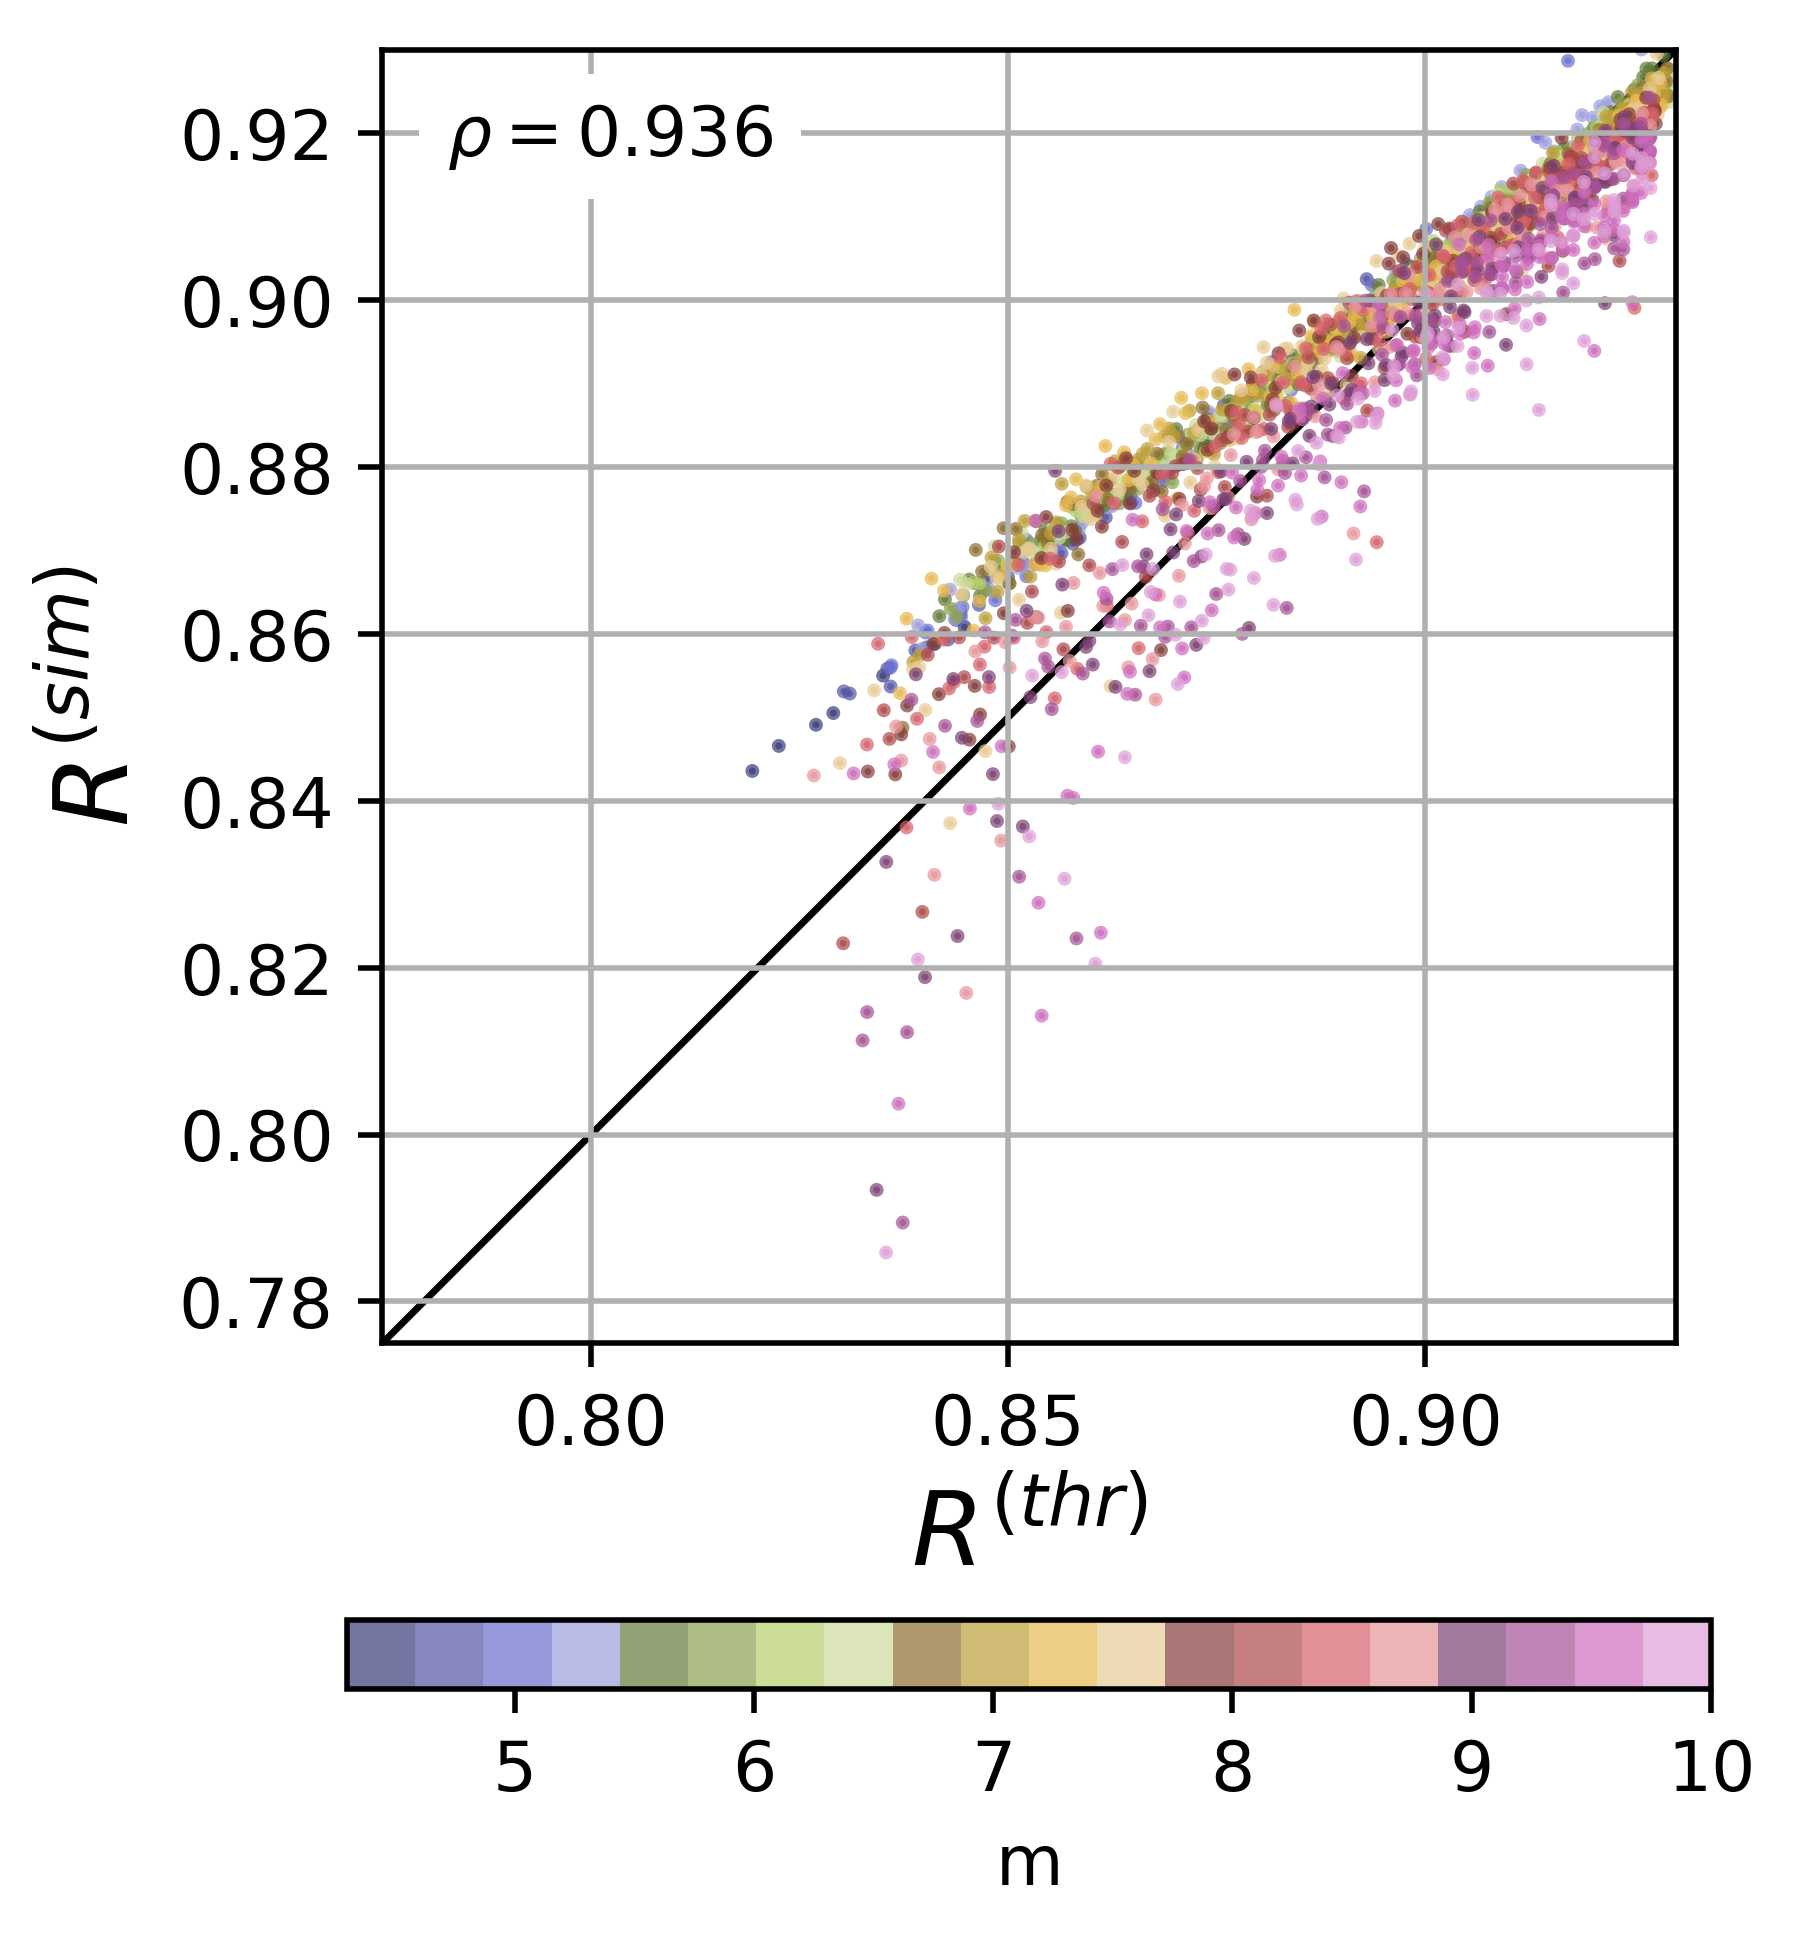

In [109]:
RP_T = np.where(~np.isnan(RP),RP,0)
Rthr = R0 + 2*RP
Rsim = NR0 + NRP +NRM
plt.figure(dpi=500)
plt.scatter(Rthr,Rsim,s=1,c=MM,alpha=0.7,cmap='tab20b')
l = (0.775,0.93)
l = (0.0,1)
rho = nan_corrcoef(Rthr,Rsim)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
plt.text(0.05,0.96,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top'
         ,bbox=dict(facecolor='w', alpha=1,linewidth=0))

# plt.xlim(0.4,1)
# plt.ylim(0.4,1)
plt.xlim(0.775,0.93)
plt.ylim(0.775,0.93)
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$R^{(sim)}$',fontsize=15)
plt.xlabel(r'$R^{(thr)}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal',shrink=0.55)
plt.grid()



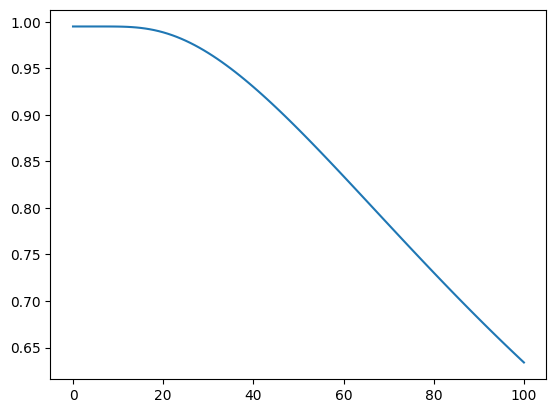

In [47]:
plt.plot(S[:,i])

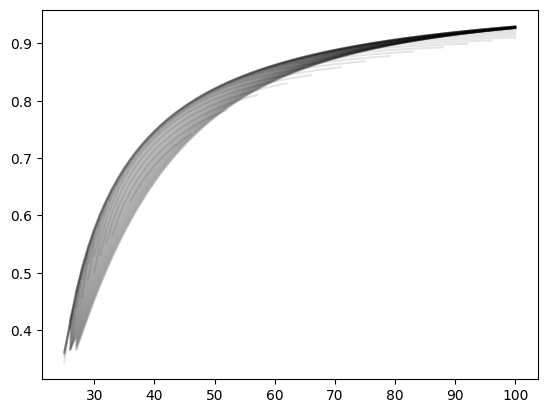

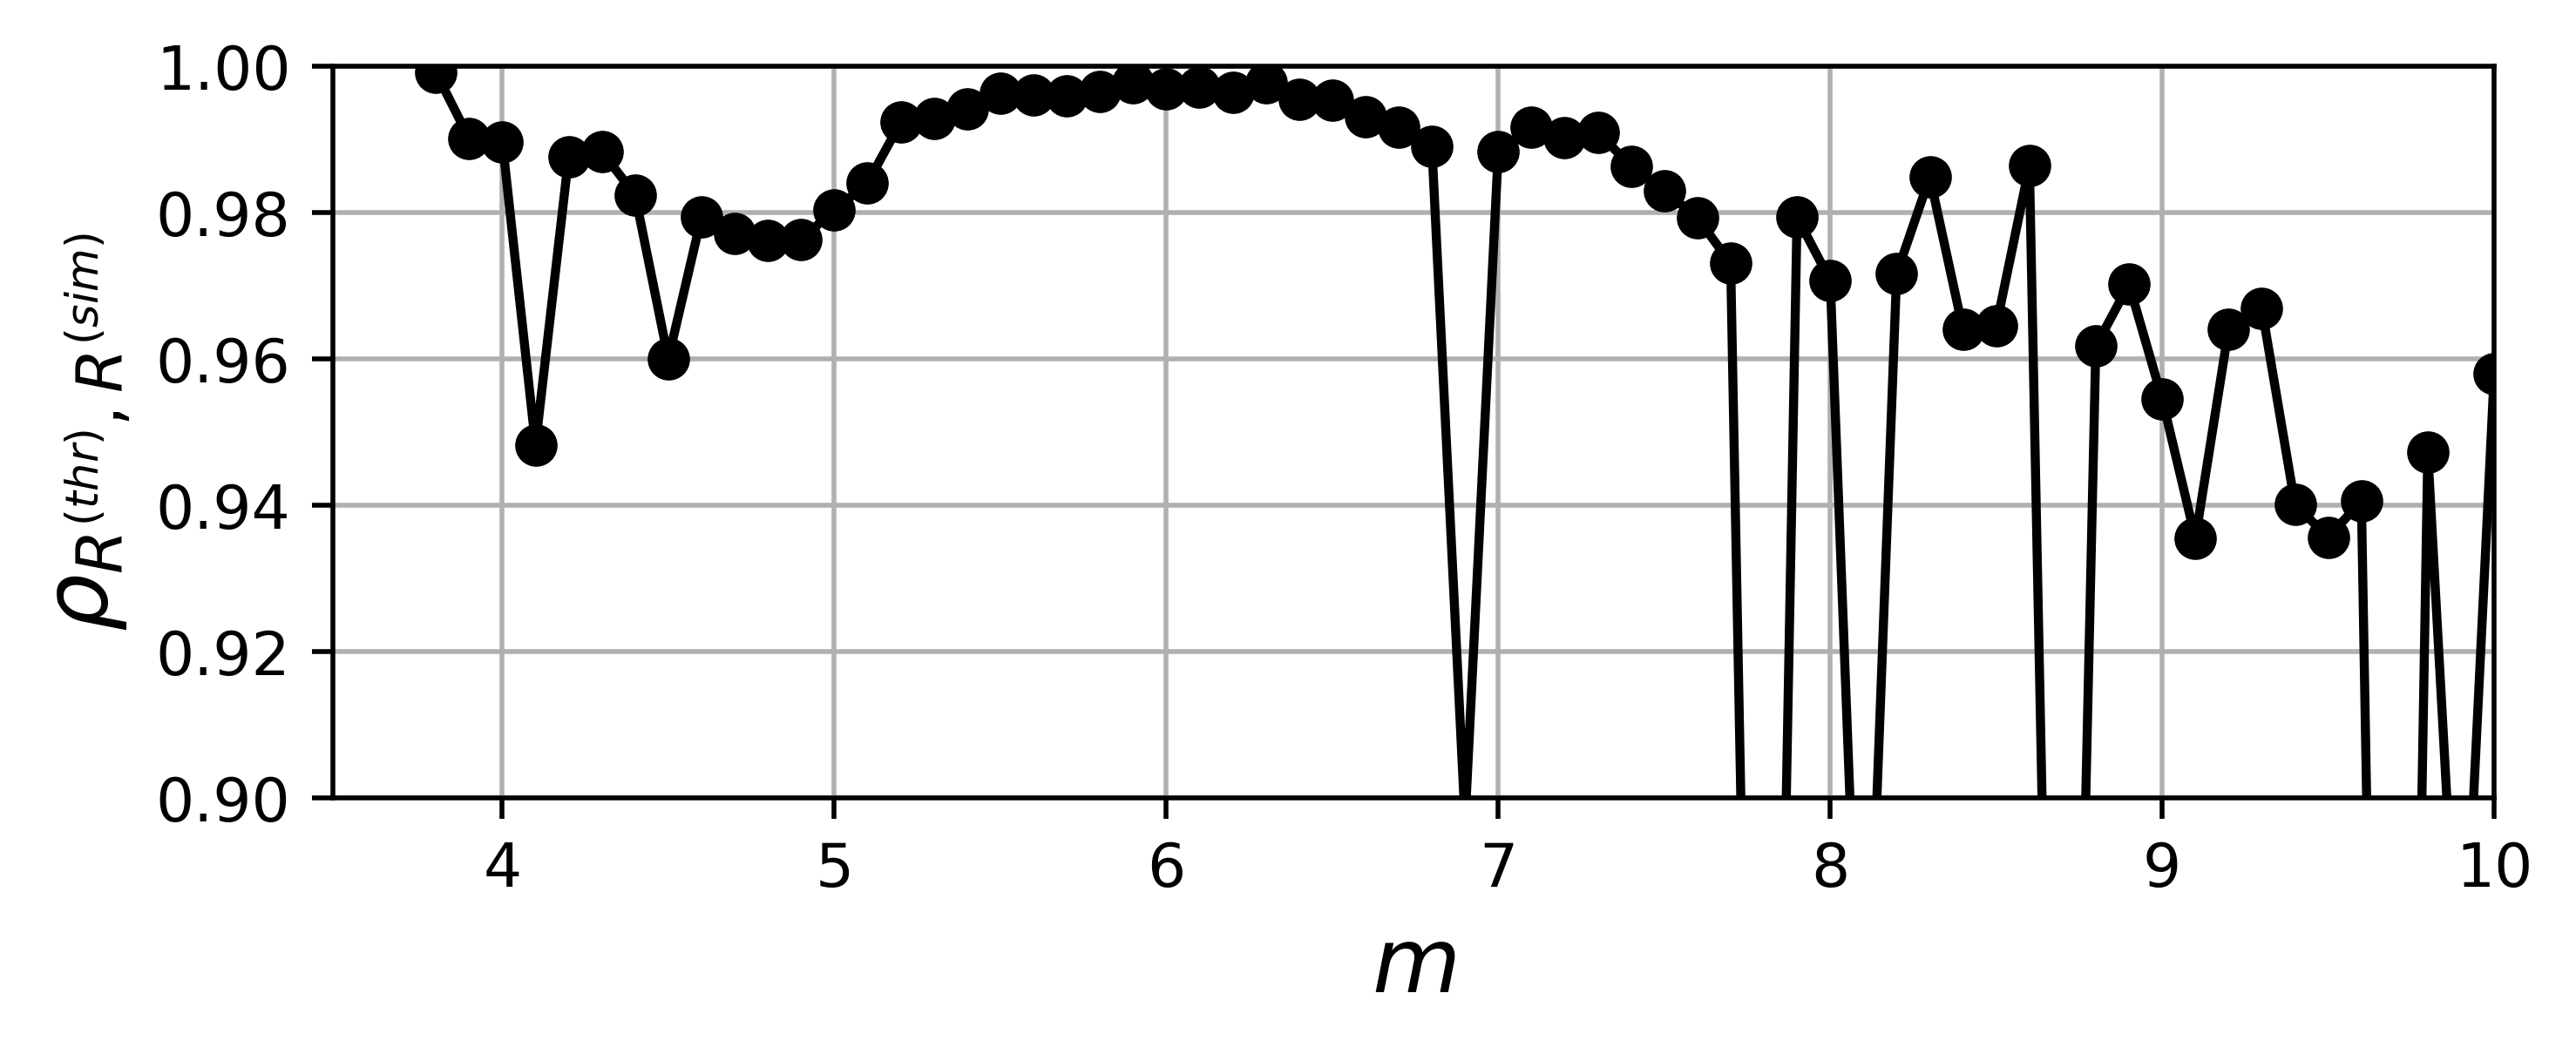

In [71]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    if len(a) == 0:
        return np.nan
    if len(b) == 0:
        return np.nan
    return np.corrcoef(a,b)[0,1]

S = Rthr
NS = Rsim
c_sigs = []
for i in range(0,101,1):
    c = nan_corrcoef(S[i,:], NS[i,:])
    plt.plot(S[i,:],c='k',alpha=0.1)
    c_sigs.append(c)
c_sigs = np.array(c_sigs)
plt.figure(dpi=500)
plt.subplot(211)
plt.plot(np.linspace(0,10,101),c_sigs,'ko-')
plt.xlabel('$m$',fontsize=15)
plt.ylabel(r'$\rho_{R^{(thr)},R^{(sim)}}$',fontsize=15)
plt.ylim(0.9,1)
plt.xlim(right=10)
plt.grid()
plt.show()

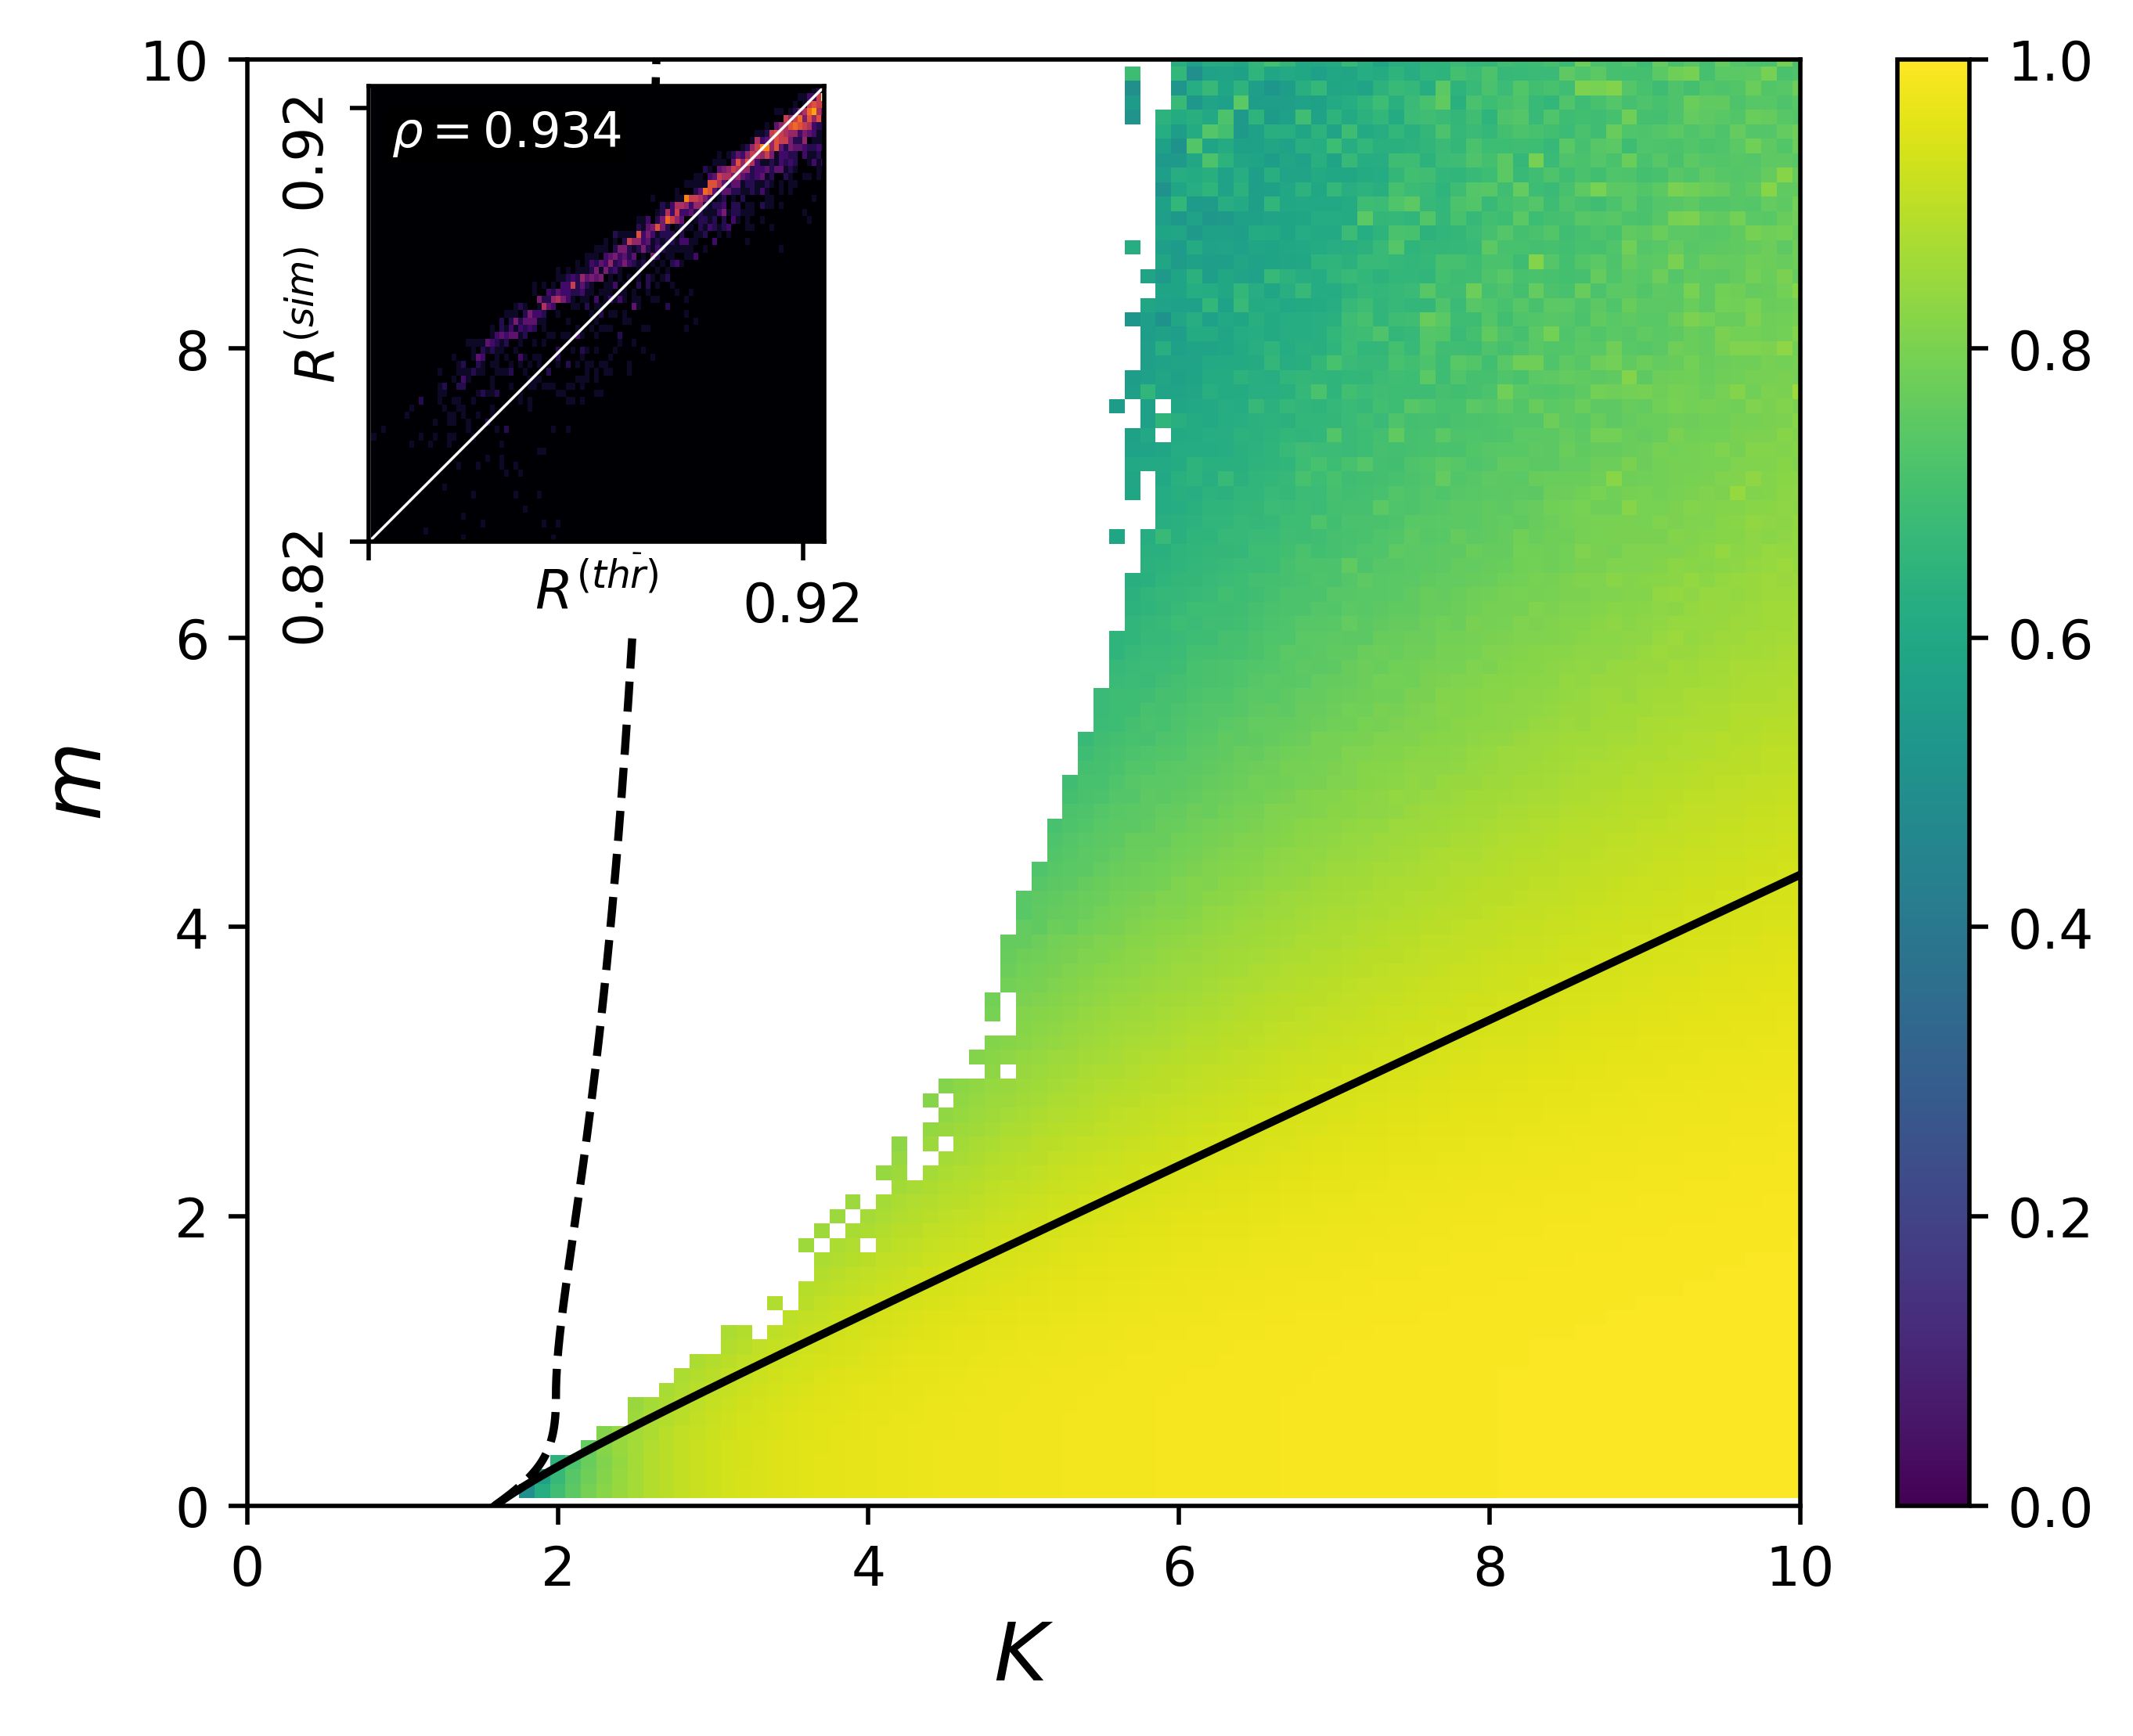

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)
pcm = ax.pcolormesh(KK, MM, NR0, vmin=0, vmax=1)
ax.plot(K_cs, m_Kc, 'k-')
ax.plot(K_mins, m_Kc, 'k--')
fig.colorbar(pcm, ax=ax)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=15)
ax.set_ylabel('$m$', fontsize=15)

# --- hist2d inset ---
axins = inset_axes(ax, width="35%", height="35%", bbox_to_anchor=(-0.5, 0.1, 0.9, 0.9),bbox_transform=ax.transAxes)

valid_indices = ~np.isnan(Rthr) & ~np.isnan(Rsim)
filtered_A_RPU = Rthr[valid_indices]
filtered_RP = Rsim[valid_indices]

# 2D 히스토그램
axins.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')

pcc = nan_corrcoef(Rthr,Rsim)
# 대각선
lims = (0.82, 0.925)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='w')

axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims)
axins.set_ylim(*lims)
xl =axins.set_xlabel('$R^{(thr)}$', fontsize=10)
xl.set_bbox(dict(facecolor='white', edgecolor='none', pad=2.0))
axins.set_ylabel('$R^{(sim)}$', fontsize=10)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

pcc = nan_corrcoef(Rthr, Rsim)

# inset 안에 텍스트 추가
axins.text(
    0.05, 0.95,                       # inset 좌표계 기준 위치 (왼쪽 위 근처)
    fr"$\rho = {pcc:.3f}$",                 # 표시할 내용
    transform=axins.transAxes,        # inset 축 좌표계(0~1) 사용
    fontsize=9, color="white",        # 글자 크기, 색
    ha="left", va="top",              # 정렬 (왼쪽 위 기준)
    bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0)  # 배경박스
)


# y라벨을 yticks 쪽에 더 붙임 (기본보다 왼쪽으로 이동)
axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.82,0.92],[0.82,0.92])
axins.set_xticks([0.82,0.92],["",0.92])
# ytick 회전
axins.tick_params(axis='y', rotation=90)

plt.show()


(array([[  1.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ..., 149.,   0.,   0.],
        [  0.,   0.,   0., ...,  34., 222.,   0.],
        [  0.,   0.,   0., ...,   0.,  31., 426.]]),
 array([0.43399851, 0.43960762, 0.44521673, 0.45082584, 0.45643495,
        0.46204405, 0.46765316, 0.47326227, 0.47887138, 0.48448049,
        0.4900896 , 0.49569871, 0.50130782, 0.50691693, 0.51252604,
        0.51813515, 0.52374425, 0.52935336, 0.53496247, 0.54057158,
        0.54618069, 0.5517898 , 0.55739891, 0.56300802, 0.56861713,
        0.57422624, 0.57983535, 0.58544445, 0.59105356, 0.59666267,
        0.60227178, 0.60788089, 0.61349   , 0.61909911, 0.62470822,
        0.63031733, 0.63592644, 0.64153554, 0.64714465, 0.65275376,
        0.65836287, 0.66397198, 0.66958109, 0.6751902 , 0.68079931,
        0.68640842, 0.69201753, 0.69762664, 0.70323574, 0.70884485,

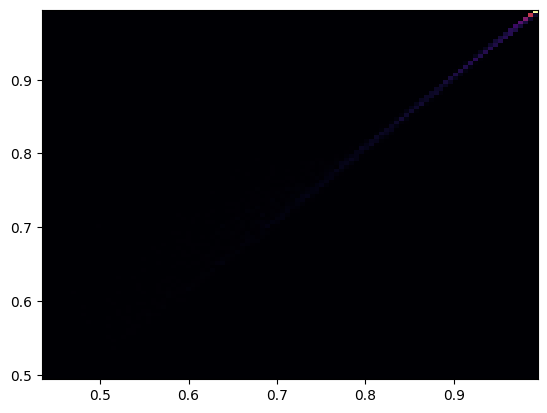

In [165]:
plt.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')

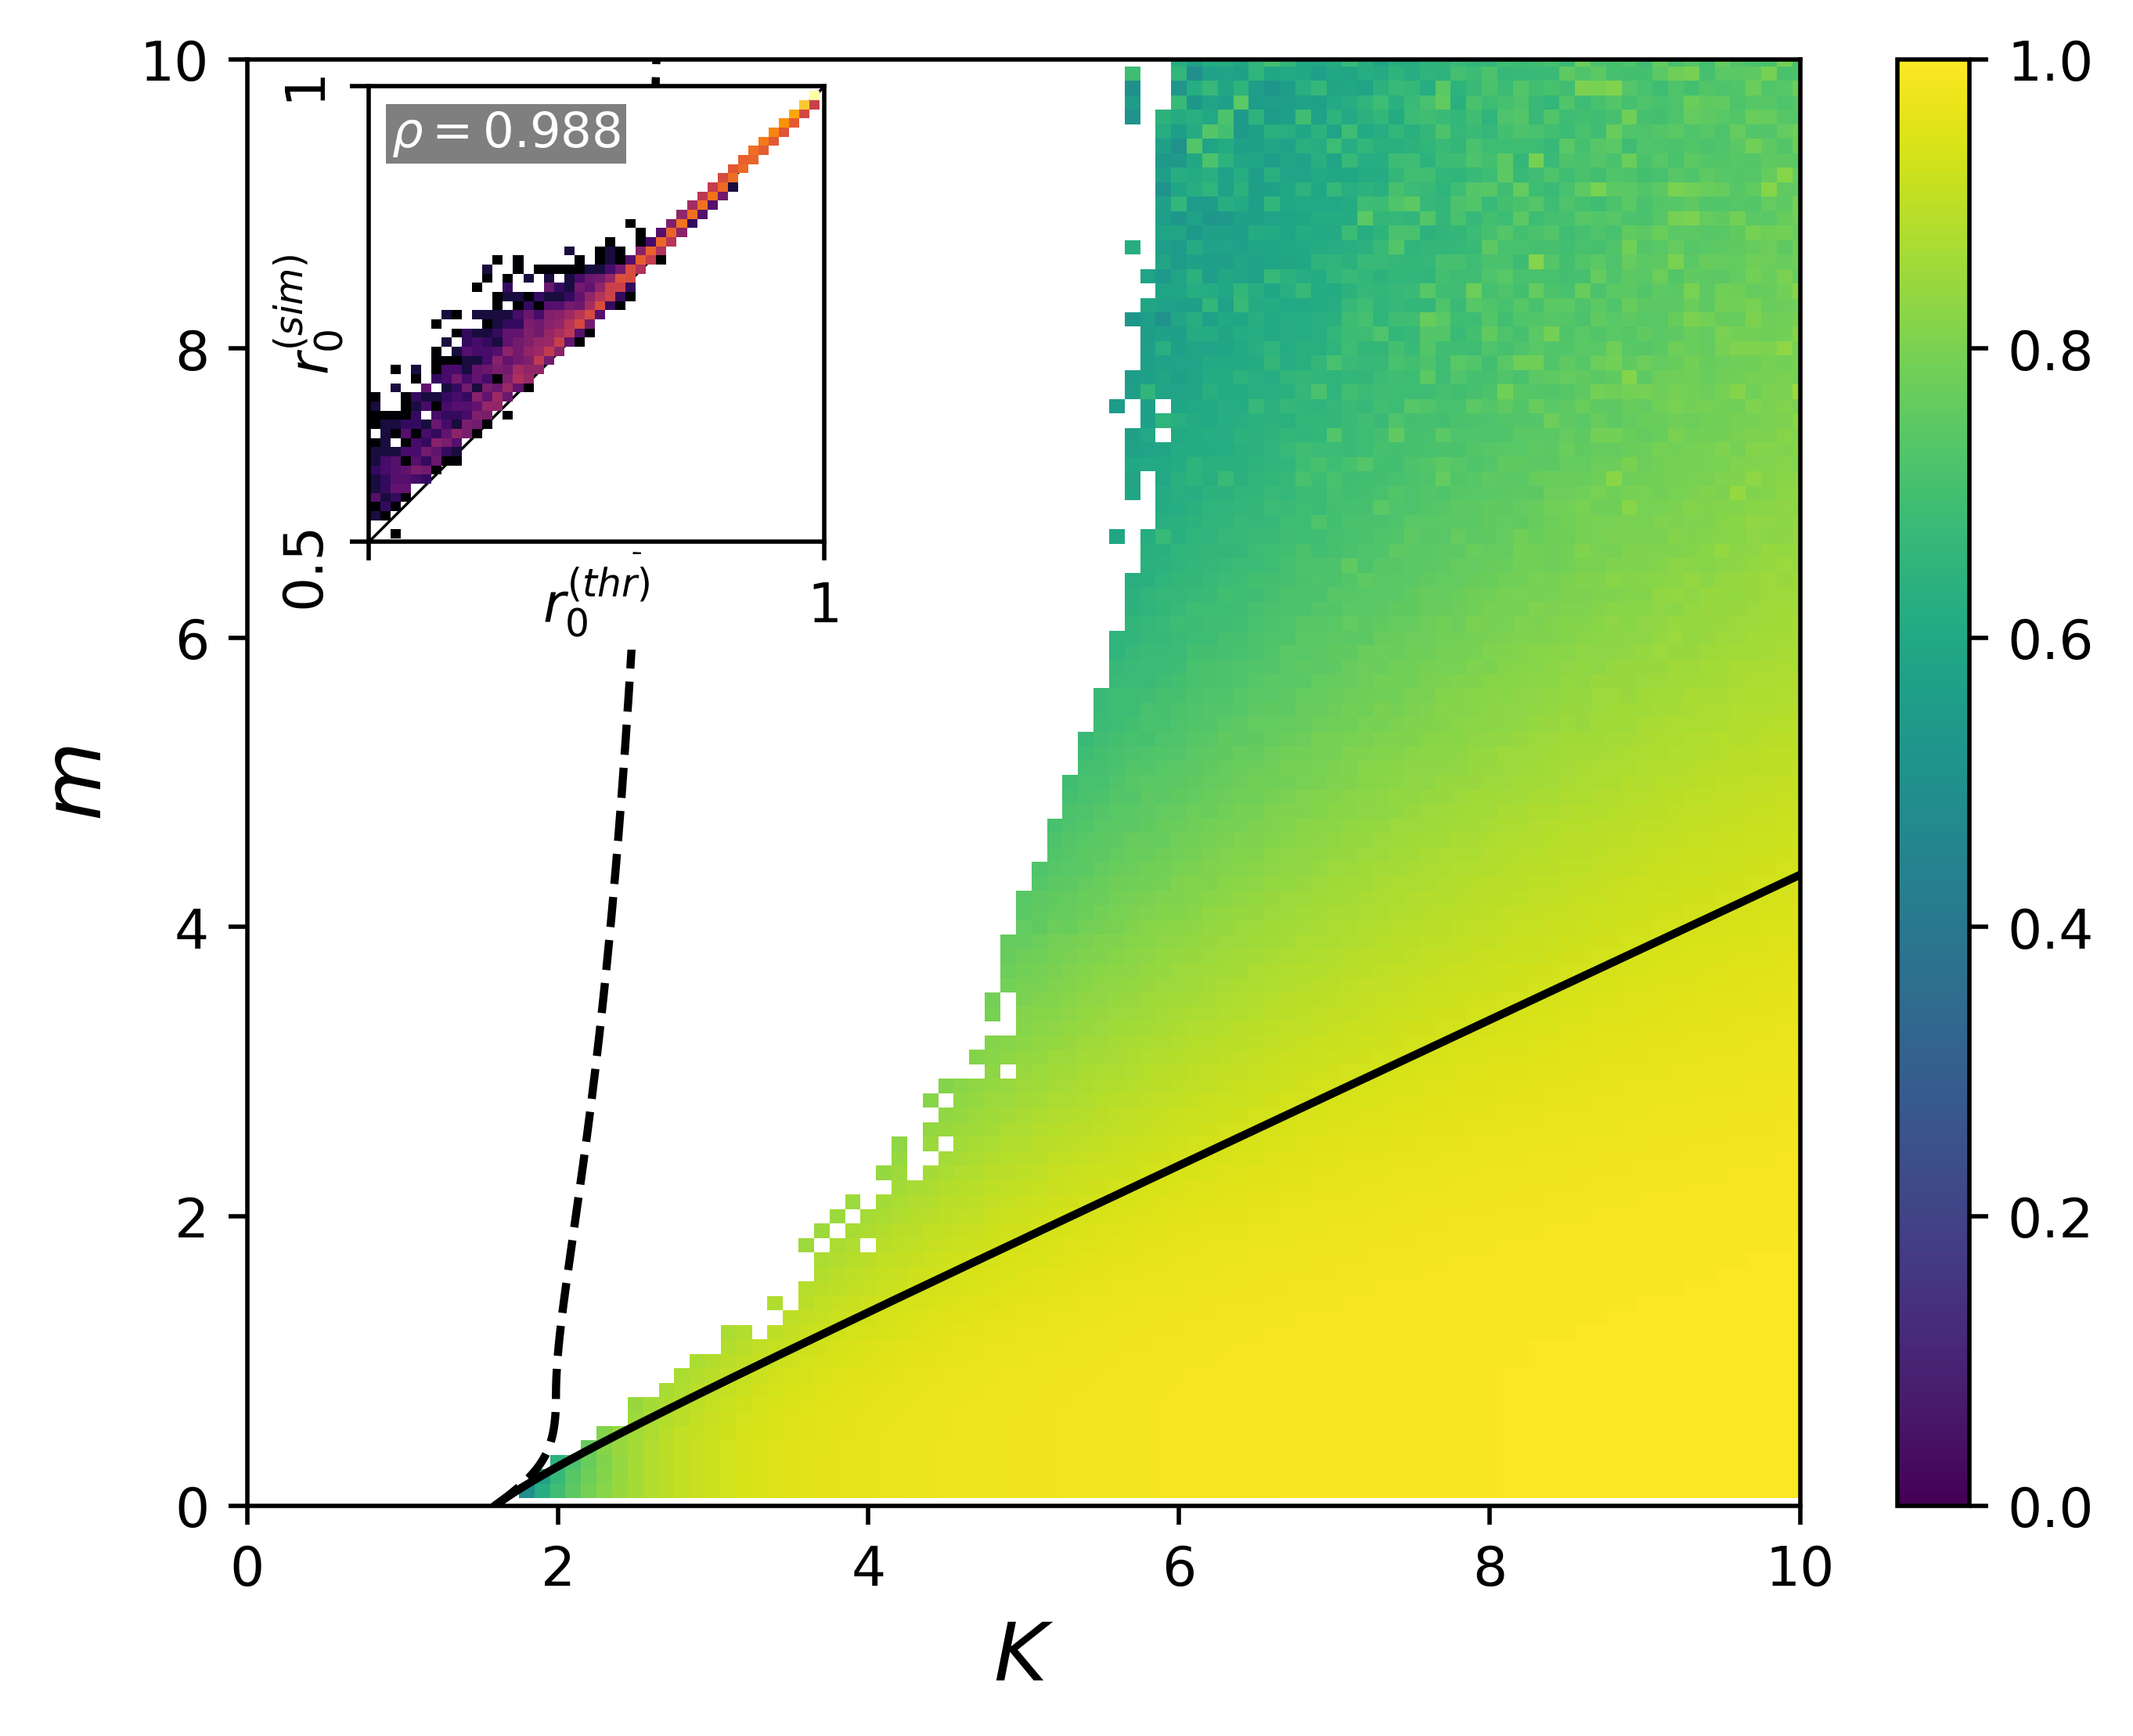

In [170]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# --- 메인 큰 그림 ---
fig, ax = plt.subplots(dpi=500)
pcm = ax.pcolormesh(KK, MM, NR0, vmin=0, vmax=1)
ax.plot(K_cs, m_Kc, 'k-')
ax.plot(K_mins, m_Kc, 'k--')
fig.colorbar(pcm, ax=ax)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_xlabel('$K$', fontsize=15)
ax.set_ylabel('$m$', fontsize=15)

# --- hist2d inset ---
axins = inset_axes(ax, width="35%", height="35%", bbox_to_anchor=(-0.5, 0.1, 0.9, 0.9),bbox_transform=ax.transAxes)

valid_indices = ~np.isnan(R0) & ~np.isnan(NR0)
filtered_A_RPU = R0[valid_indices]
filtered_RP = NR0[valid_indices]

# 2D 히스토그램
axins.hist2d(filtered_A_RPU, filtered_RP, bins=50, cmap='inferno',norm=LogNorm())

pcc = nan_corrcoef(R0,NR0)
# 대각선
lims = (0.5, 1)
axins.plot([lims[0], lims[1]], [lims[0], lims[1]], lw=0.5, c='k',zorder=-10)

axins.set_aspect('equal', adjustable='box')
axins.set_xlim(*lims)
axins.set_ylim(*lims)
xl =axins.set_xlabel('$r_0^{(thr)}$', fontsize=10)
xl.set_bbox(dict(facecolor='white', edgecolor='none', pad=2.0))
axins.set_ylabel('$r_0^{(sim)}$', fontsize=10)
axins.xaxis.set_label_coords(0.5, -0.05, transform=axins.transAxes)

# pcc = nan_corrcoef(Rthr, Rsim)

# inset 안에 텍스트 추가
axins.text(
    0.05, 0.95,                       # inset 좌표계 기준 위치 (왼쪽 위 근처)
    fr"$\rho = {pcc:.3f}$",                 # 표시할 내용
    transform=axins.transAxes,        # inset 축 좌표계(0~1) 사용
    fontsize=9, color="white",        # 글자 크기, 색
    ha="left", va="top",              # 정렬 (왼쪽 위 기준)
    bbox=dict(facecolor="black", alpha=0.5, edgecolor="none", pad=1.0)  # 배경박스
)


# y라벨을 yticks 쪽에 더 붙임 (기본보다 왼쪽으로 이동)
axins.yaxis.set_label_coords(-0.05, 0.5, transform=axins.transAxes)
axins.set_yticks([0.5,1],[0.5,1])
axins.set_xticks([0.5,1],["",1])
# ytick 회전
axins.tick_params(axis='y', rotation=90)

plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


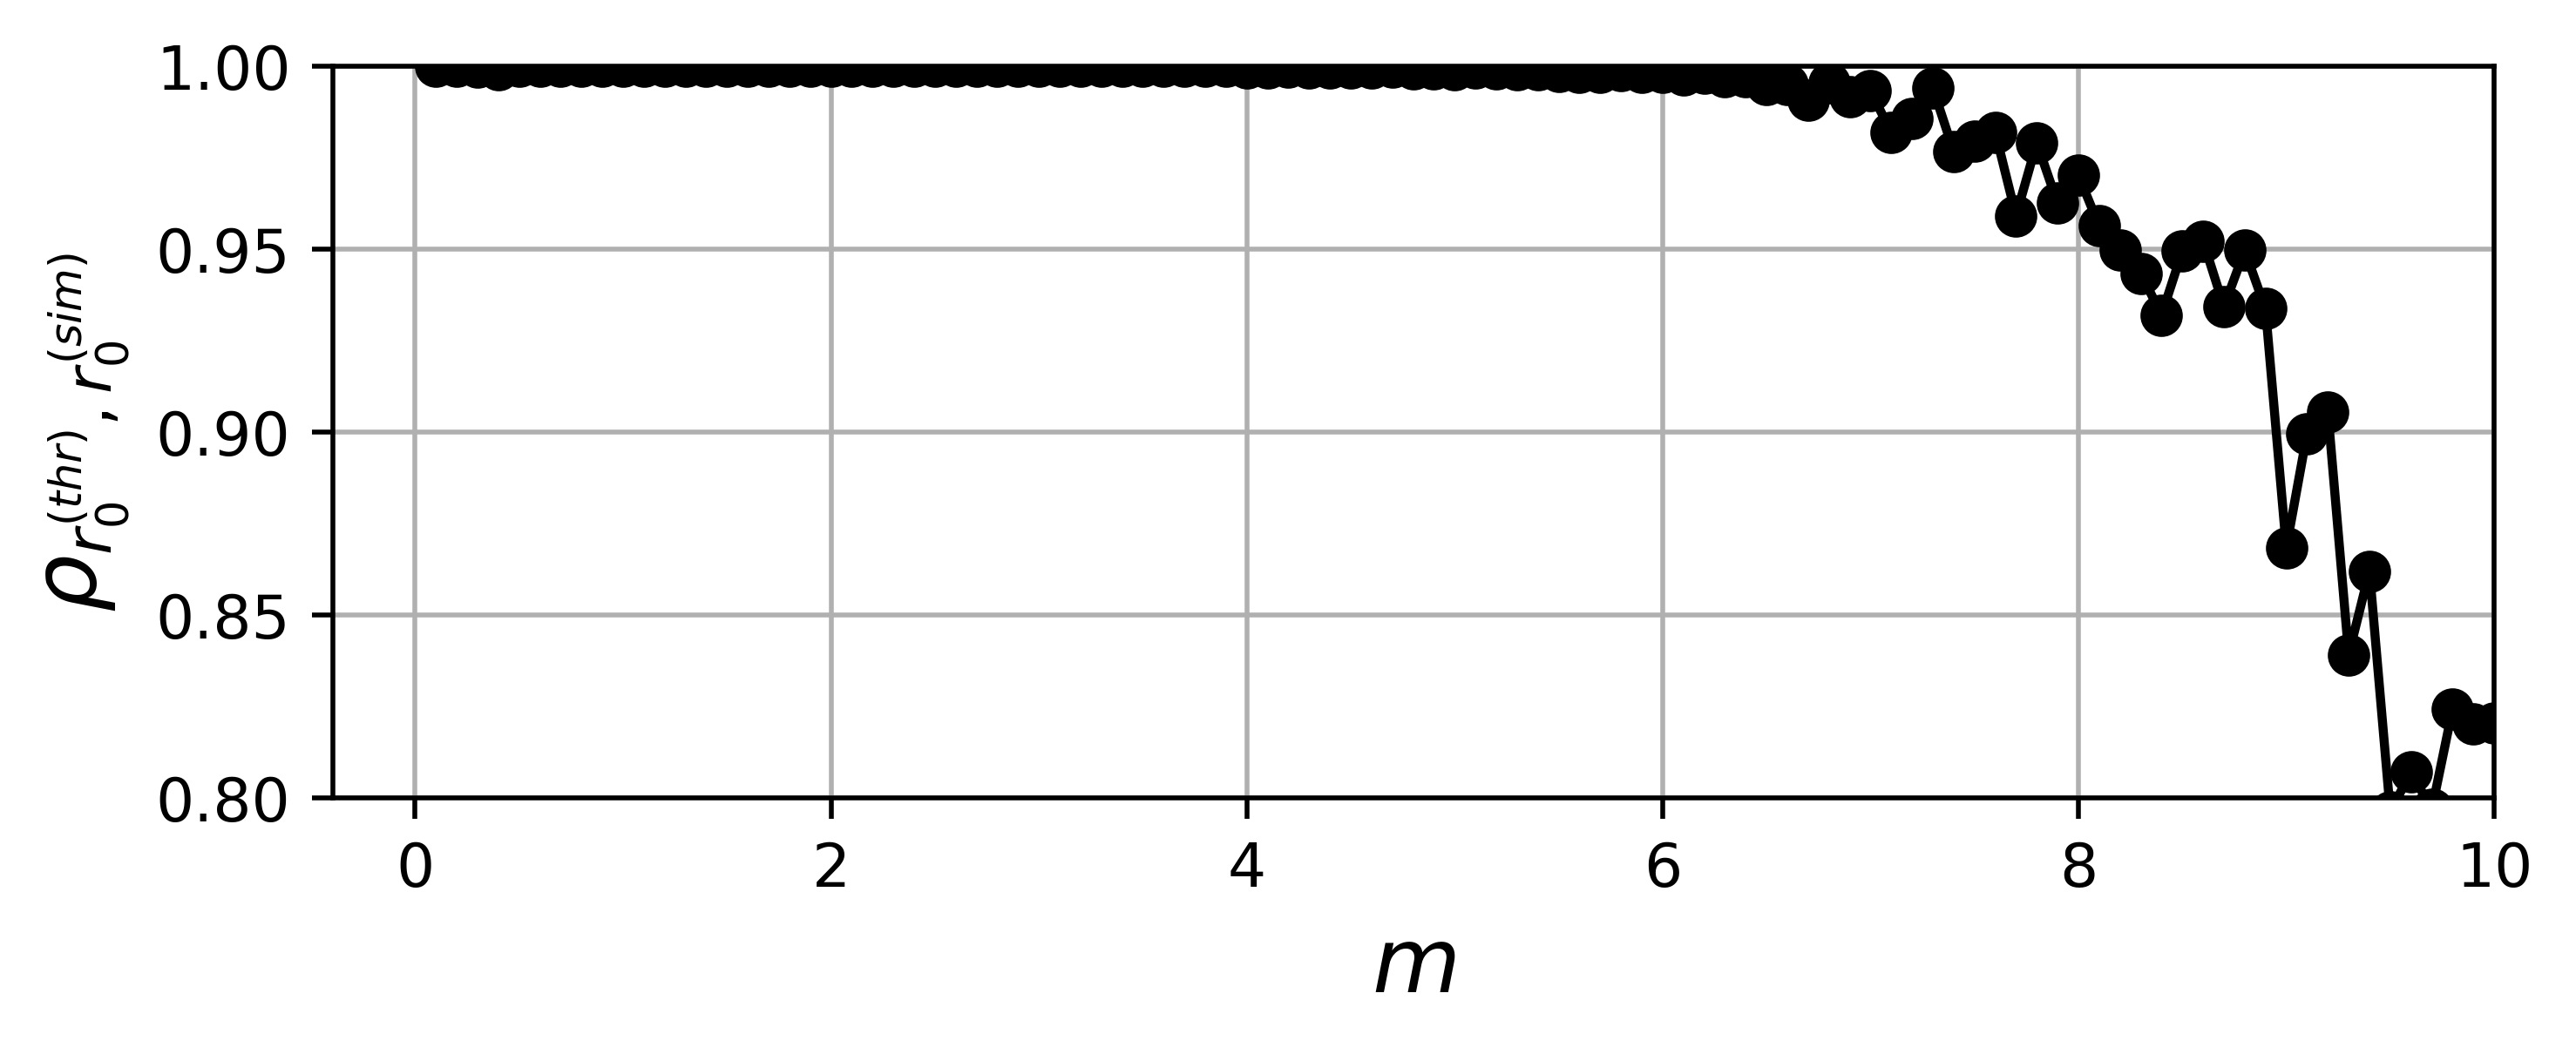

In [171]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]

S = R0
NS = NR0
c_sigs = []
for i in range(0,101,1):
    c = nan_corrcoef(S[i,:], NS[i,:])
    c_sigs.append(c)
c_sigs = np.array(c_sigs)
plt.figure(dpi=500)
plt.subplot(211)
plt.plot(np.linspace(0,10,101),c_sigs,'ko-')
plt.xlabel('$m$',fontsize=15)
plt.ylabel(r'$\rho_{r_0^{(thr)},r_0^{(sim)}}$',fontsize=15)
plt.ylim(0.8,1)
plt.xlim(right=10)
plt.grid()
plt.show()

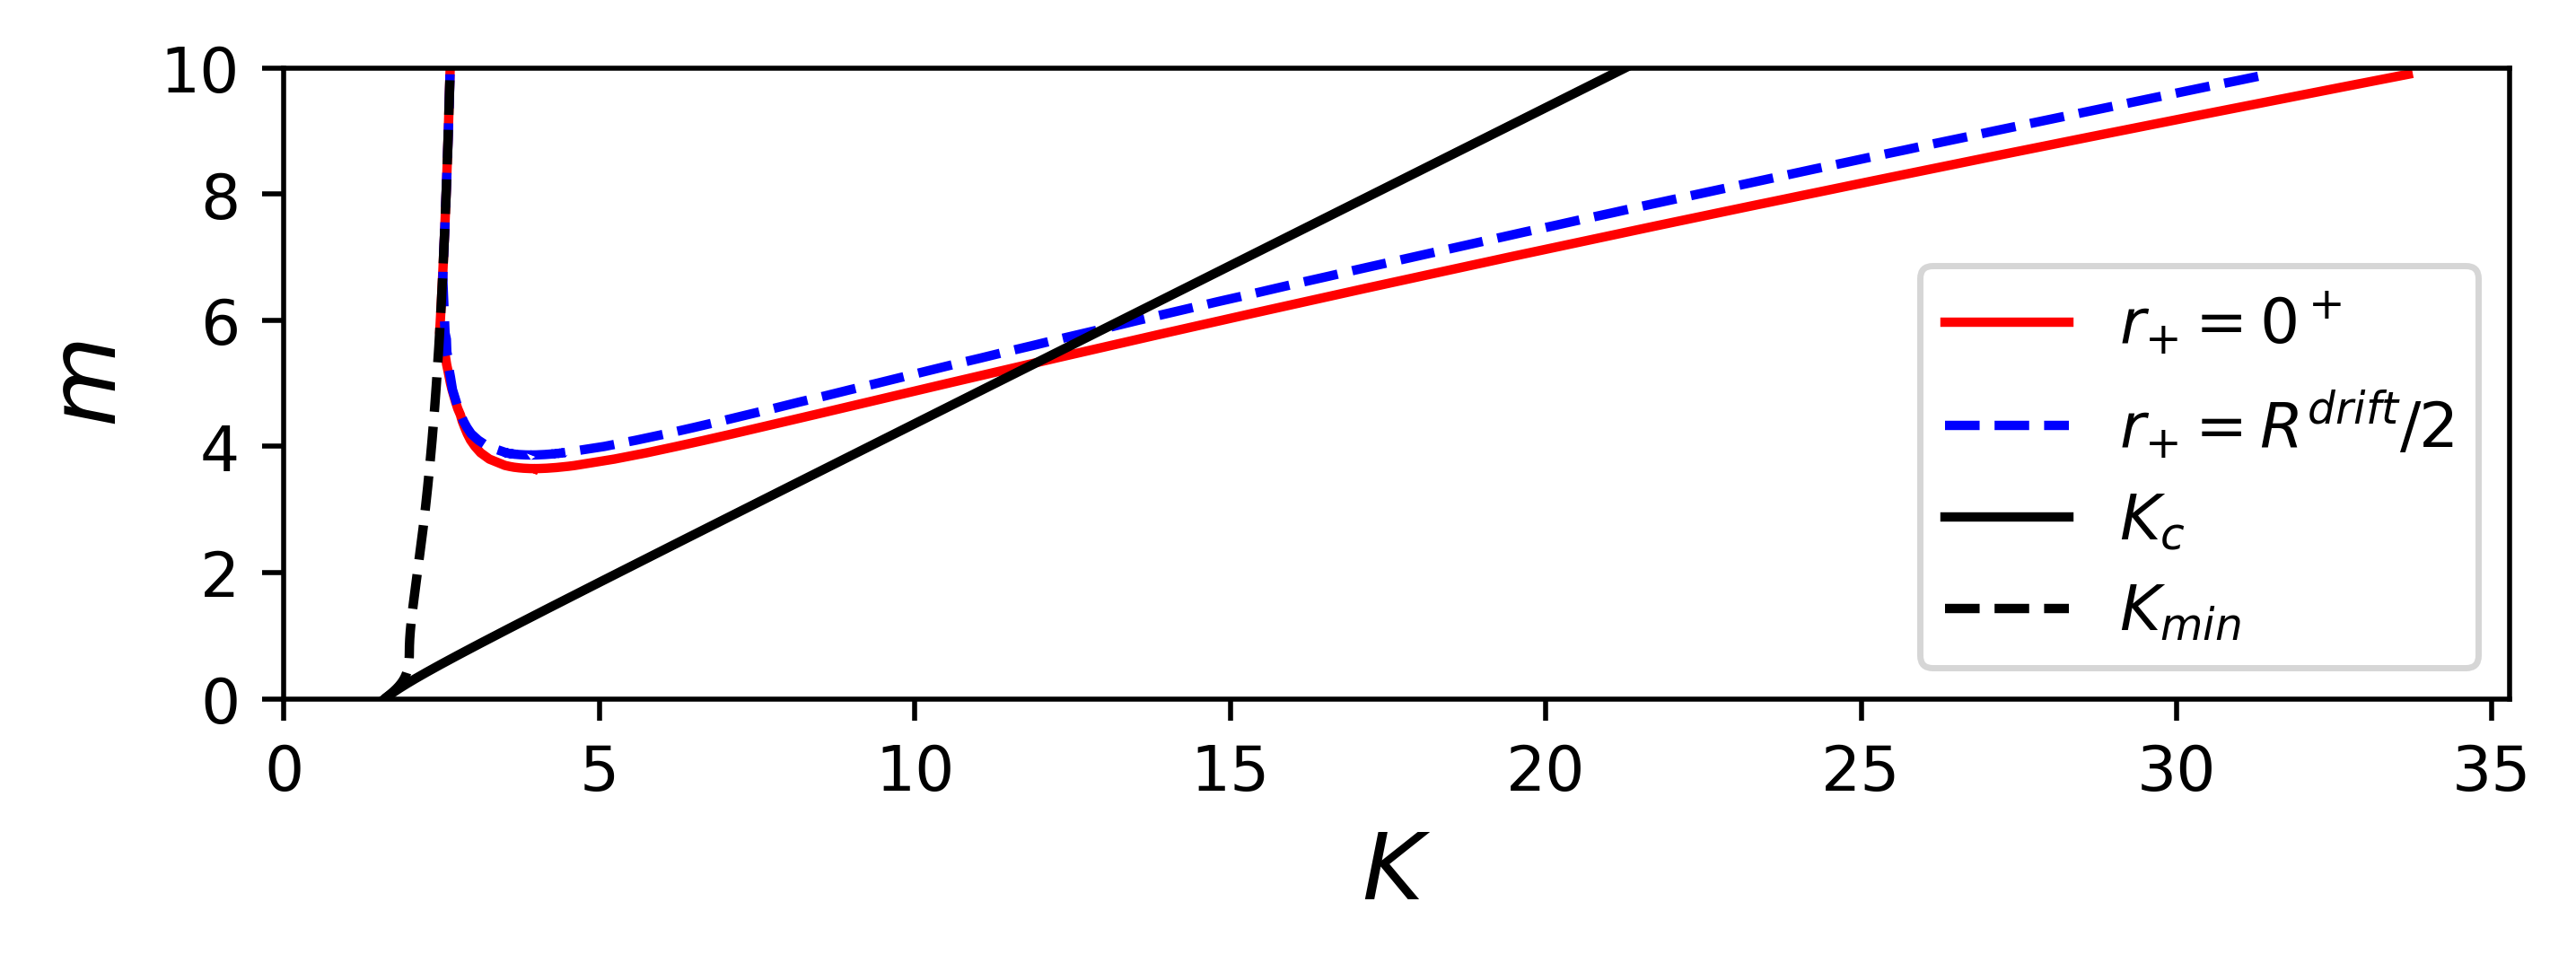

In [103]:
plt.figure(dpi=500)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')

plt.plot(K_cs,m_Kc,'k-',label=r'$K_{c}$')
plt.plot(K_mins,m_Kc,'k--',label=r'$K_{min}$')

# plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('$K$',fontsize=15)
plt.ylabel('$m$',fontsize=15)
plt.gca().set_aspect('equal')

# legend에 라인 + patch 같이 넣기
plt.legend()

plt.show()

/var/folders/kn/fvpnhvjx5d363mgqcf9f1ltc0000gn/T/ipykernel_21811/2777185268.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')


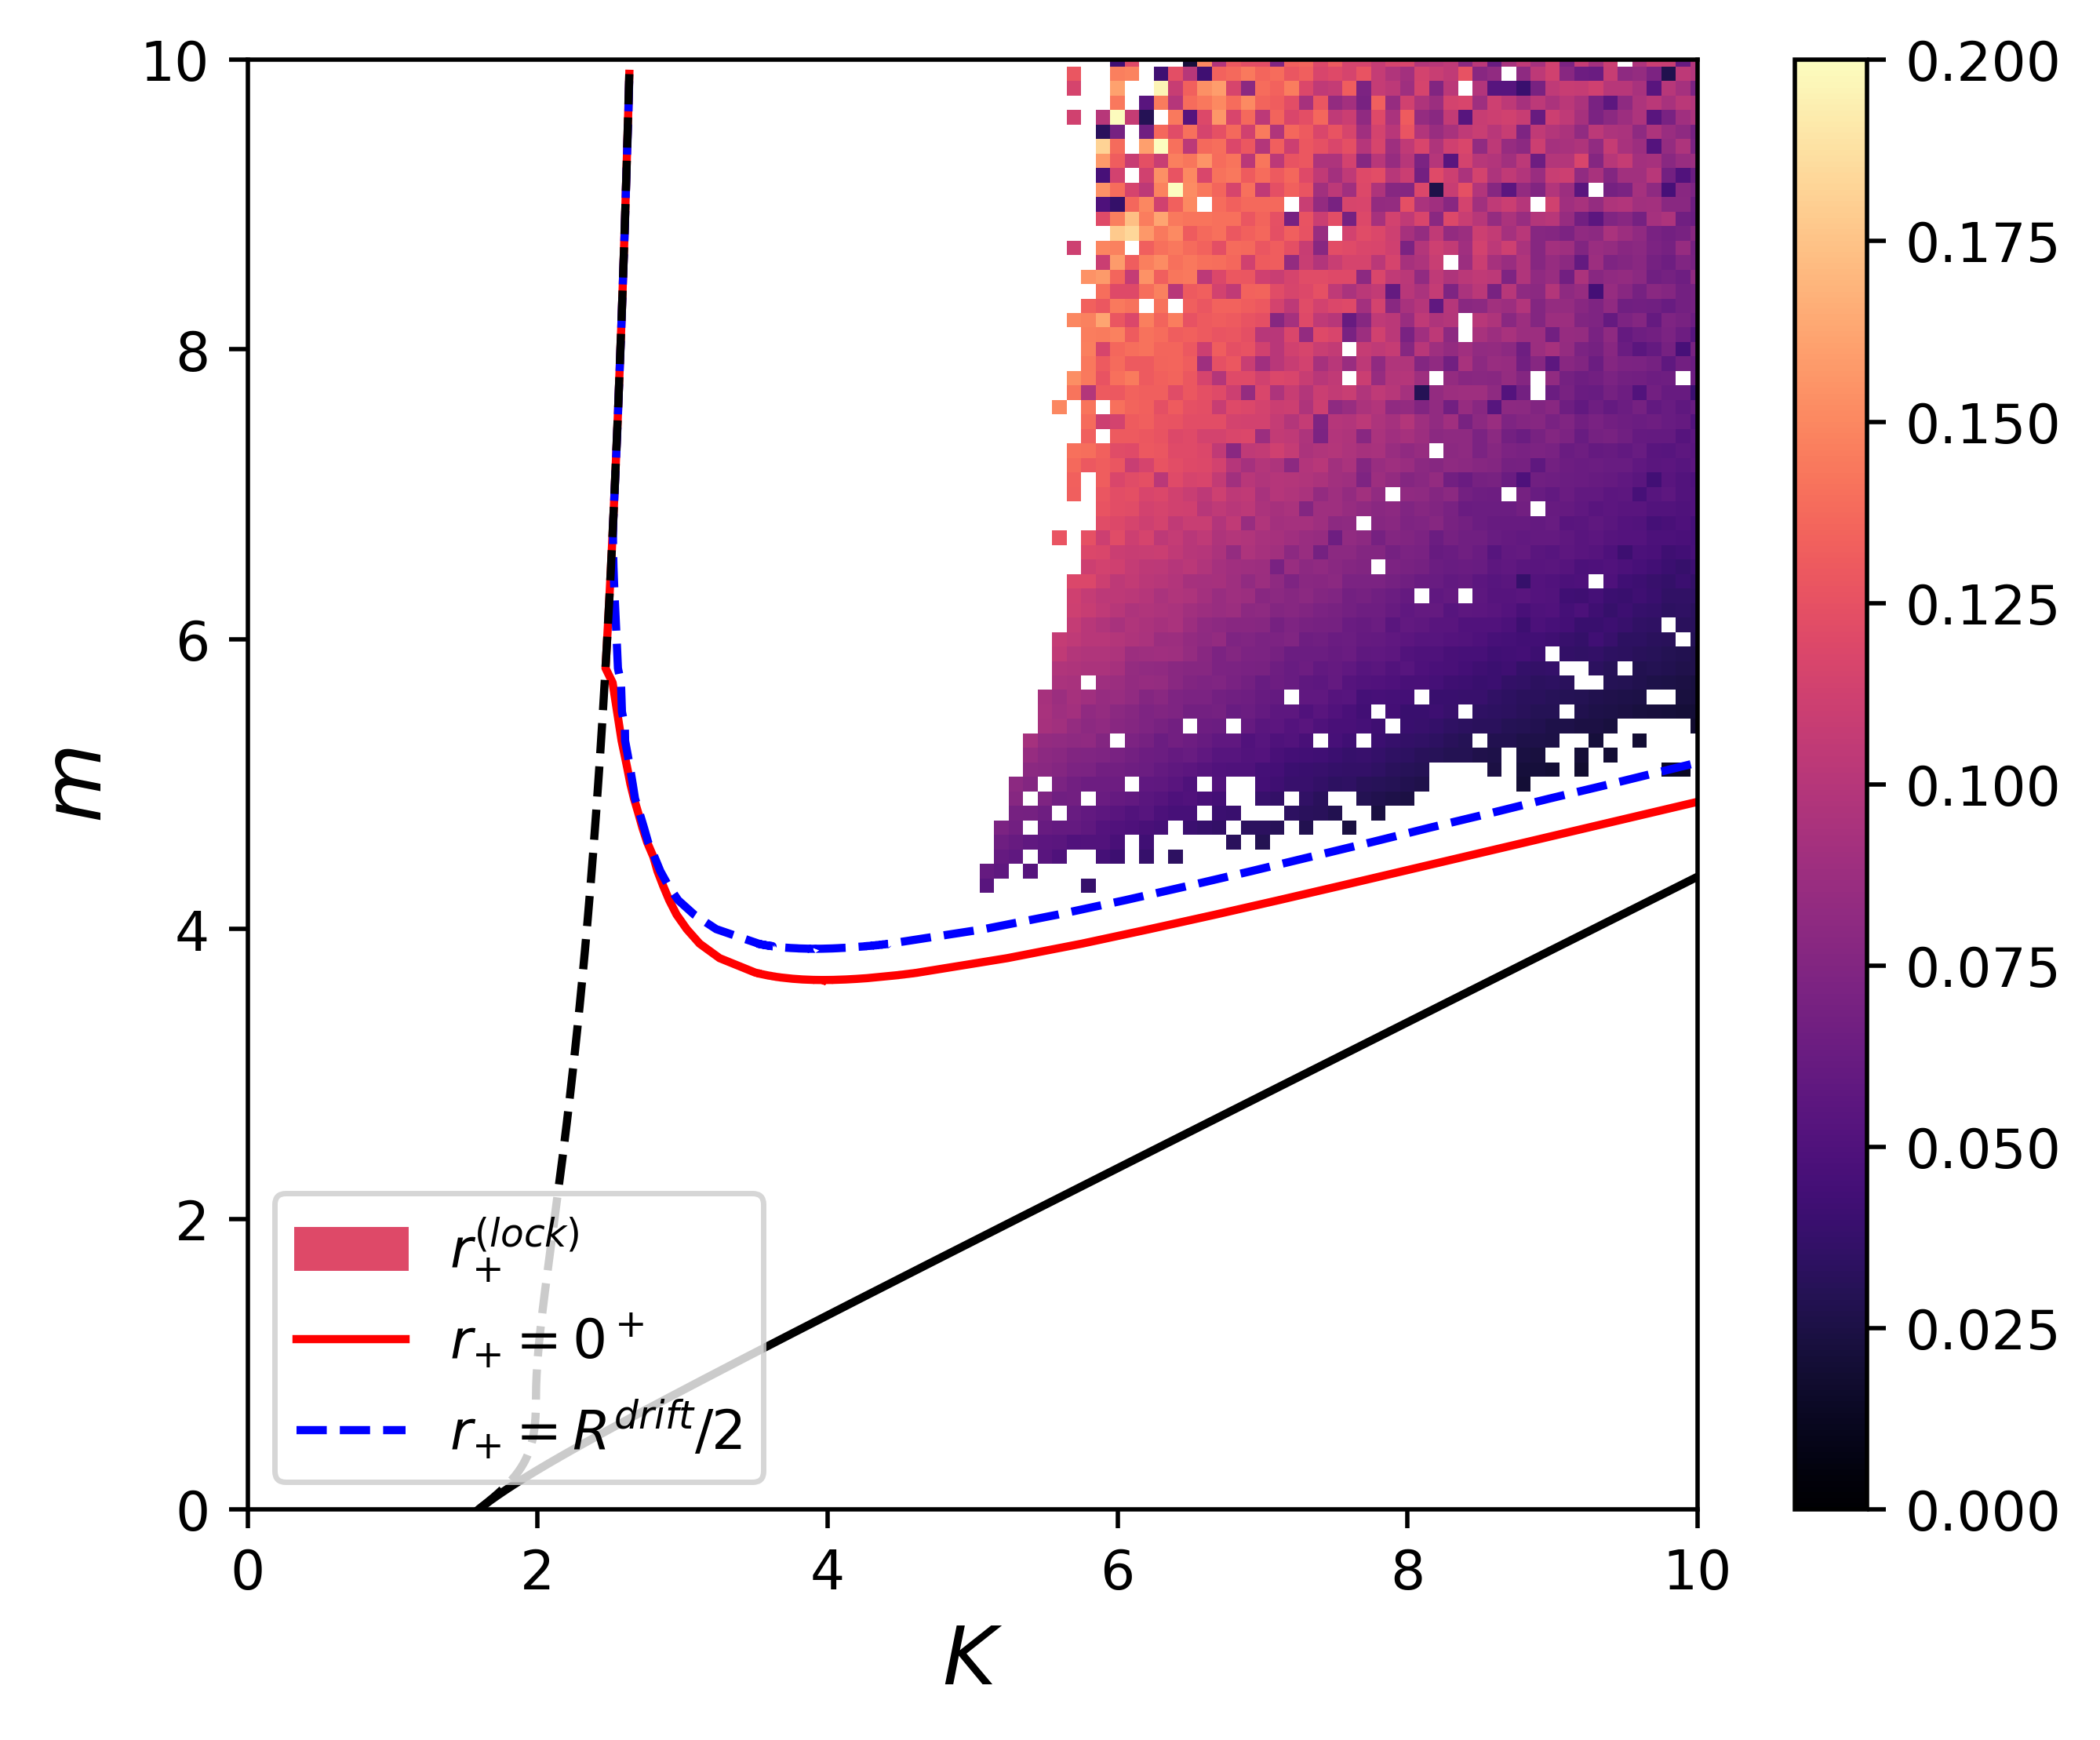

In [95]:
plt.figure(dpi=500)
plt.pcolormesh(KK,MM,NRP,cmap='magma',vmin=0,vmax=0.2)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')

plt.plot(K_cs,m_Kc,'k-')
plt.plot(K_mins,m_Kc,'k--')

plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('$K$',fontsize=15)
plt.ylabel('$m$',fontsize=15)
plt.gca().set_aspect('equal')
cmap = cm.get_cmap('magma')
color_middle = cmap(0.6)  # colormap에서 중간색 선택

patch = mpatches.Patch(color=color_middle, label=r'$r_{+}^{(lock)}$')

# legend에 라인 + patch 같이 넣기
plt.legend(handles=[patch] + plt.gca().get_legend_handles_labels()[0],loc=3)
plt.colorbar()
plt.show()

Text(0, 0.5, '$m$')

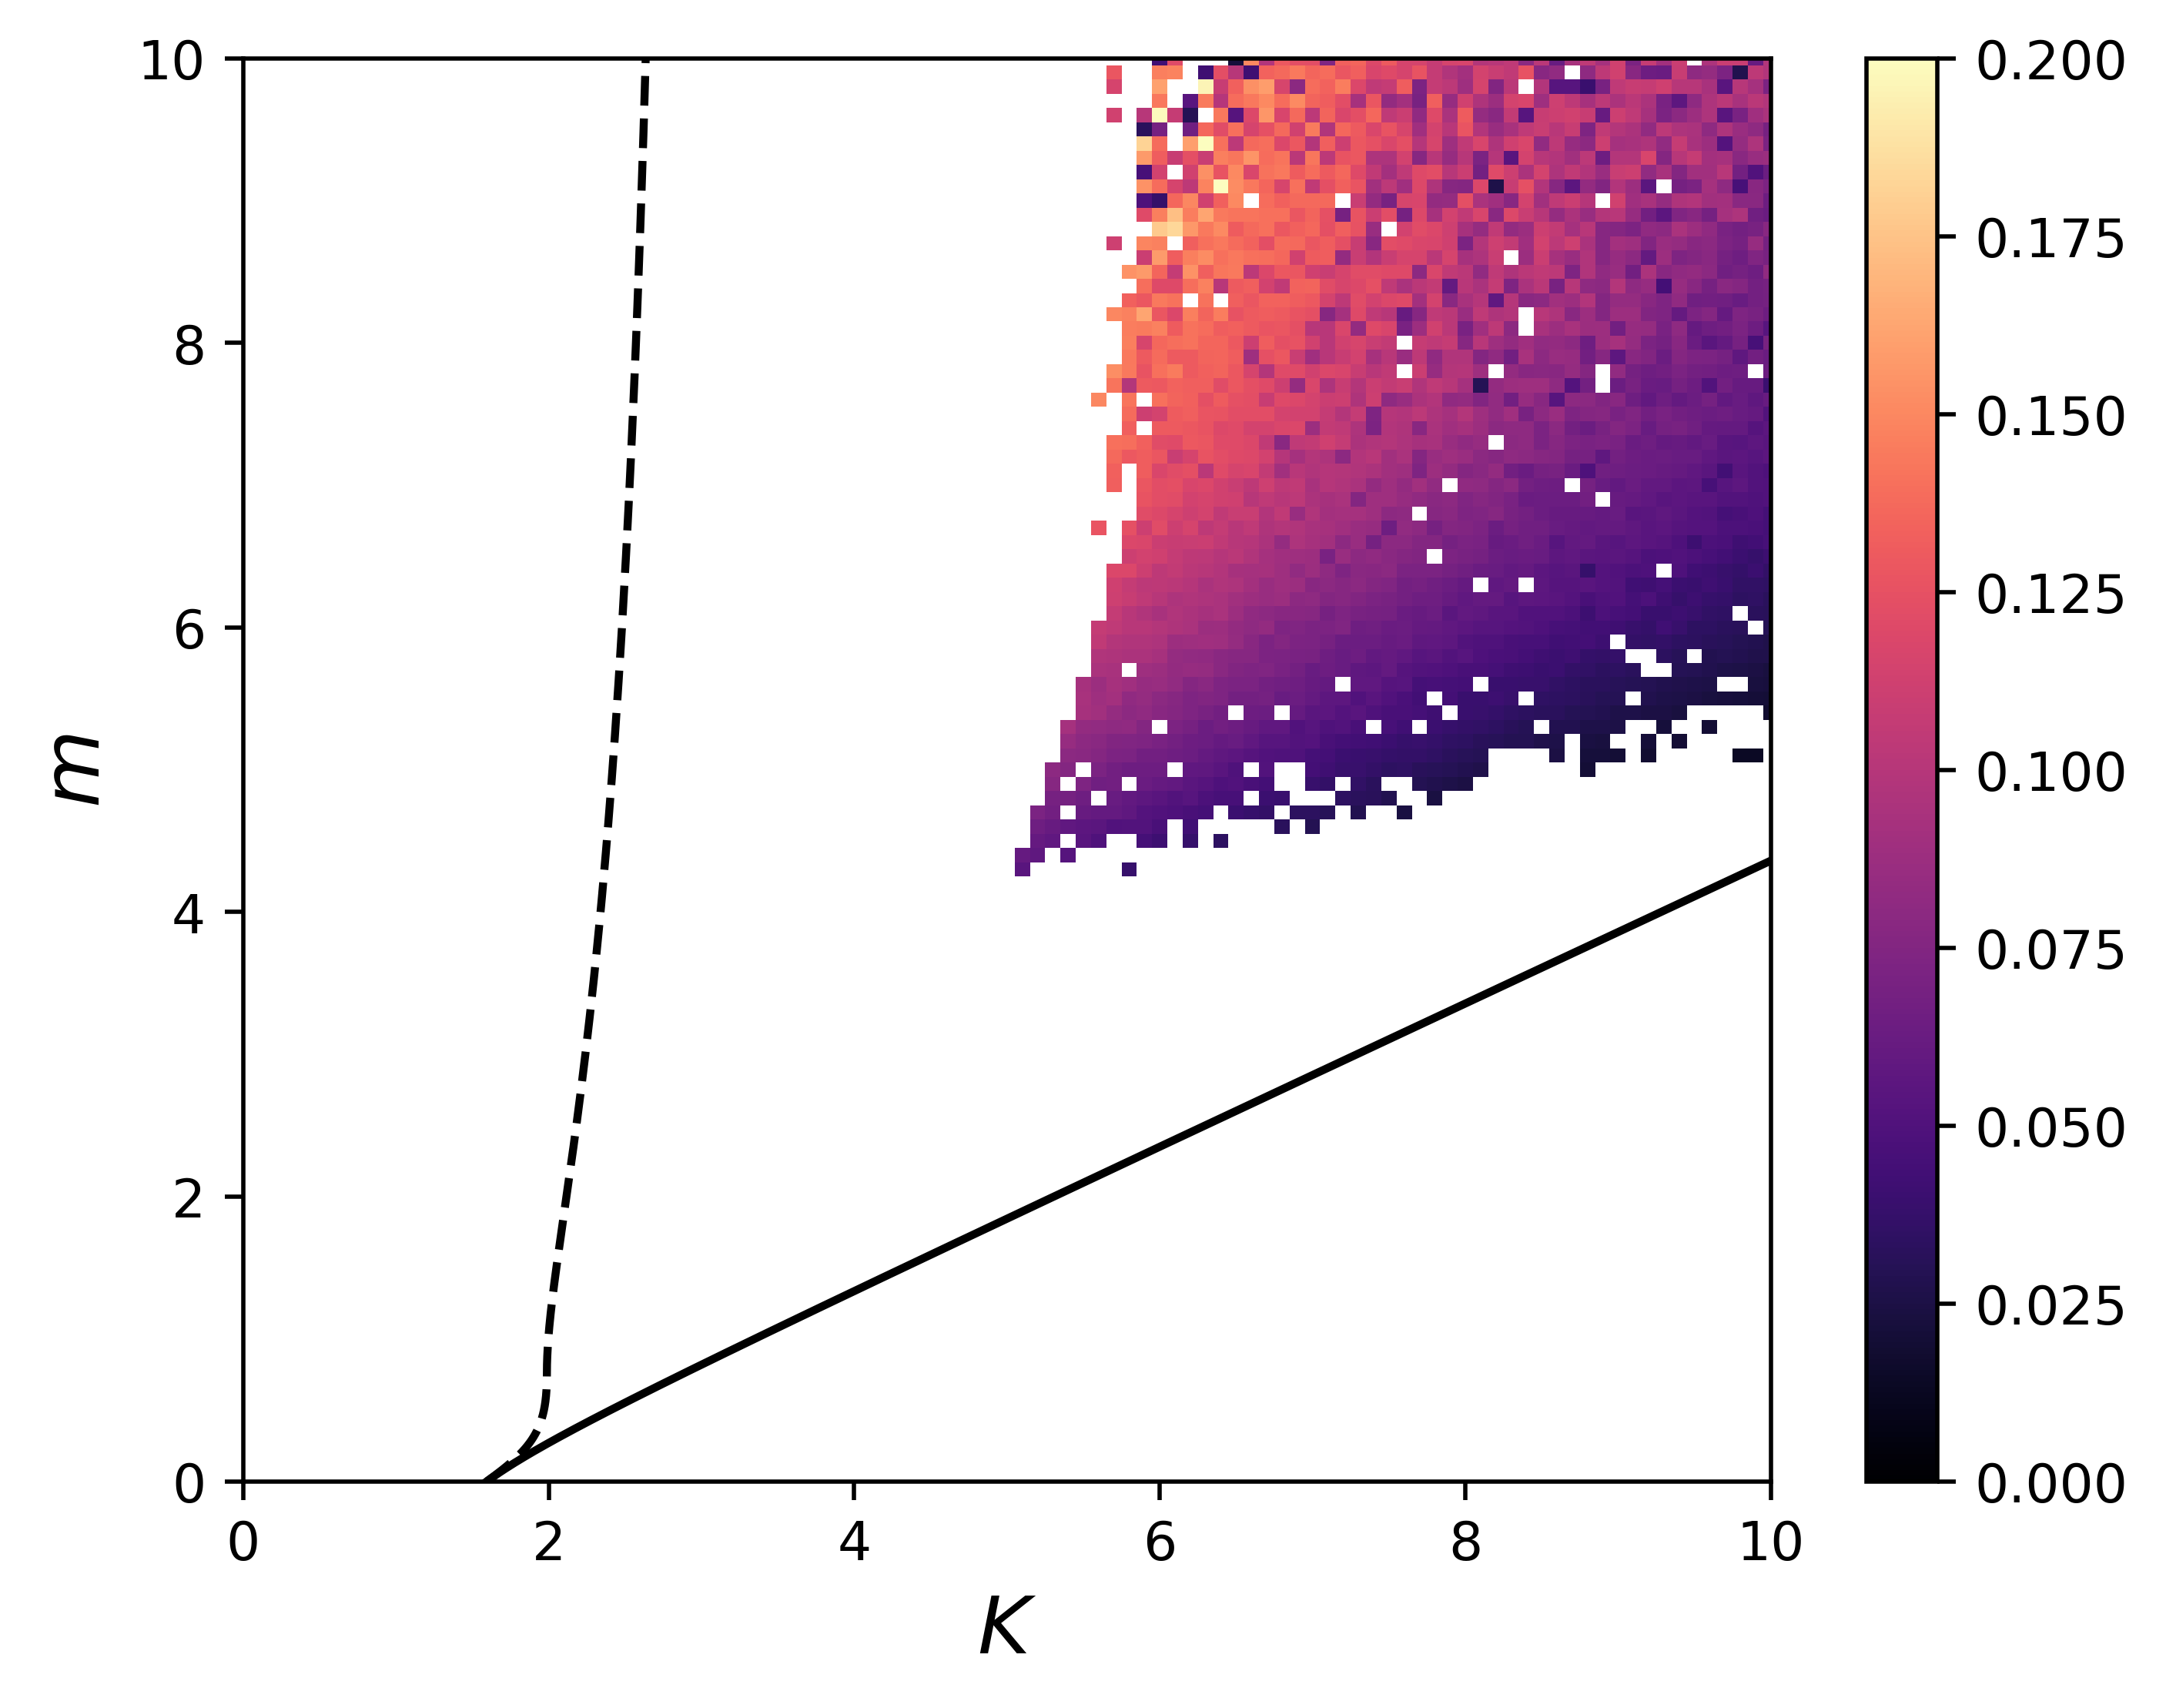

In [ ]:
plt.figure(dpi=500)
X = np.isnan(RP)
Y = RP>=RD/2
Z = np.isnan(NR0)
plt.pcolormesh(KK,MM,NRP,vmin=0,vmax=0.2,cmap='magma')


plt.plot(K_cs,m_Kc,'k-')
plt.plot(K_mins,m_Kc,'k--')
cbar = plt.colorbar()
plt.xlim(0,10)
plt.ylim(0,10)
# cbar.ax.tick_params(labelsize=12)  # Adjust the font size of the colorbar ticks
# cbar.set_label(r'$R_{lock,sim}$', fontsize=15)  # Set the font size of the colorbar label
# plt.title(r'$r_{0,sim}>0.1$',fontsize=15)
# plt.title(r'$r_{+,analytic}<|r_{drift}/2|,N = {5000}$',fontsize=15)

plt.xlabel('$K$',fontsize=15)
plt.ylabel('$m$',fontsize=15)


In [93]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]
nan_corrcoef(Rthr,Rsim)

0.9363216531107291

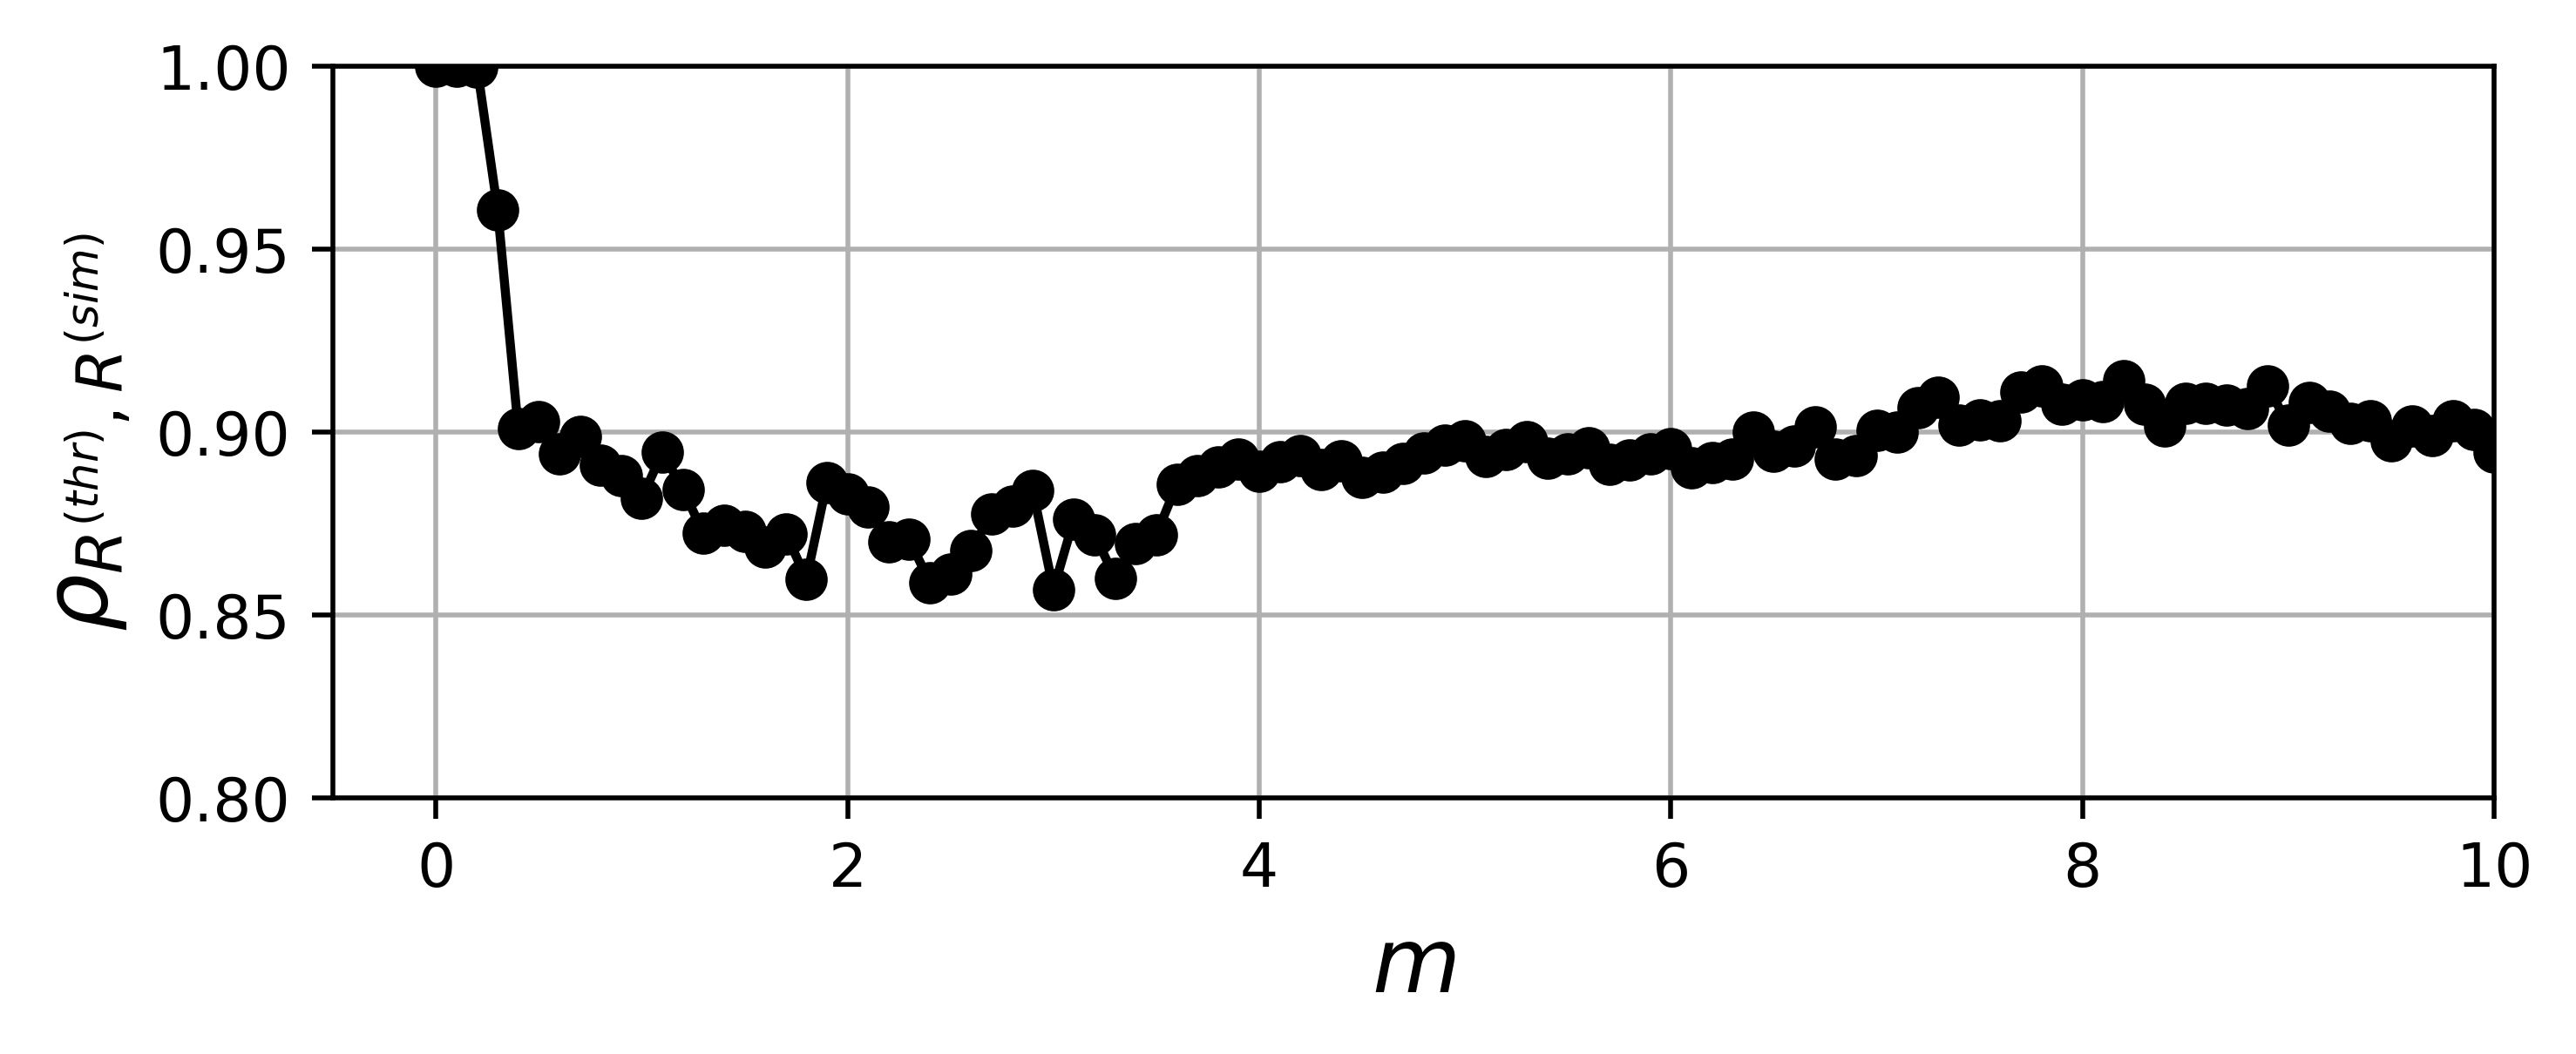

In [44]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]

S = Rthr
NS = Rsim
c_sigs = []
for i in range(0,101,1):
    c = nan_corrcoef(S[i,:], NS[i,:])
    c_sigs.append(c)
c_sigs = np.array(c_sigs)
plt.figure(dpi=500)
plt.subplot(211)
plt.plot(np.linspace(0,10,101),c_sigs,'ko-')
plt.xlabel('$m$',fontsize=15)
plt.ylabel(r'$\rho_{R^{(thr)},R^{(sim)}}$',fontsize=15)
plt.ylim(0.8,1)
plt.xlim(right=10)
plt.grid()
plt.show()

Text(0.5, 0, '$R^{(thr)}$')

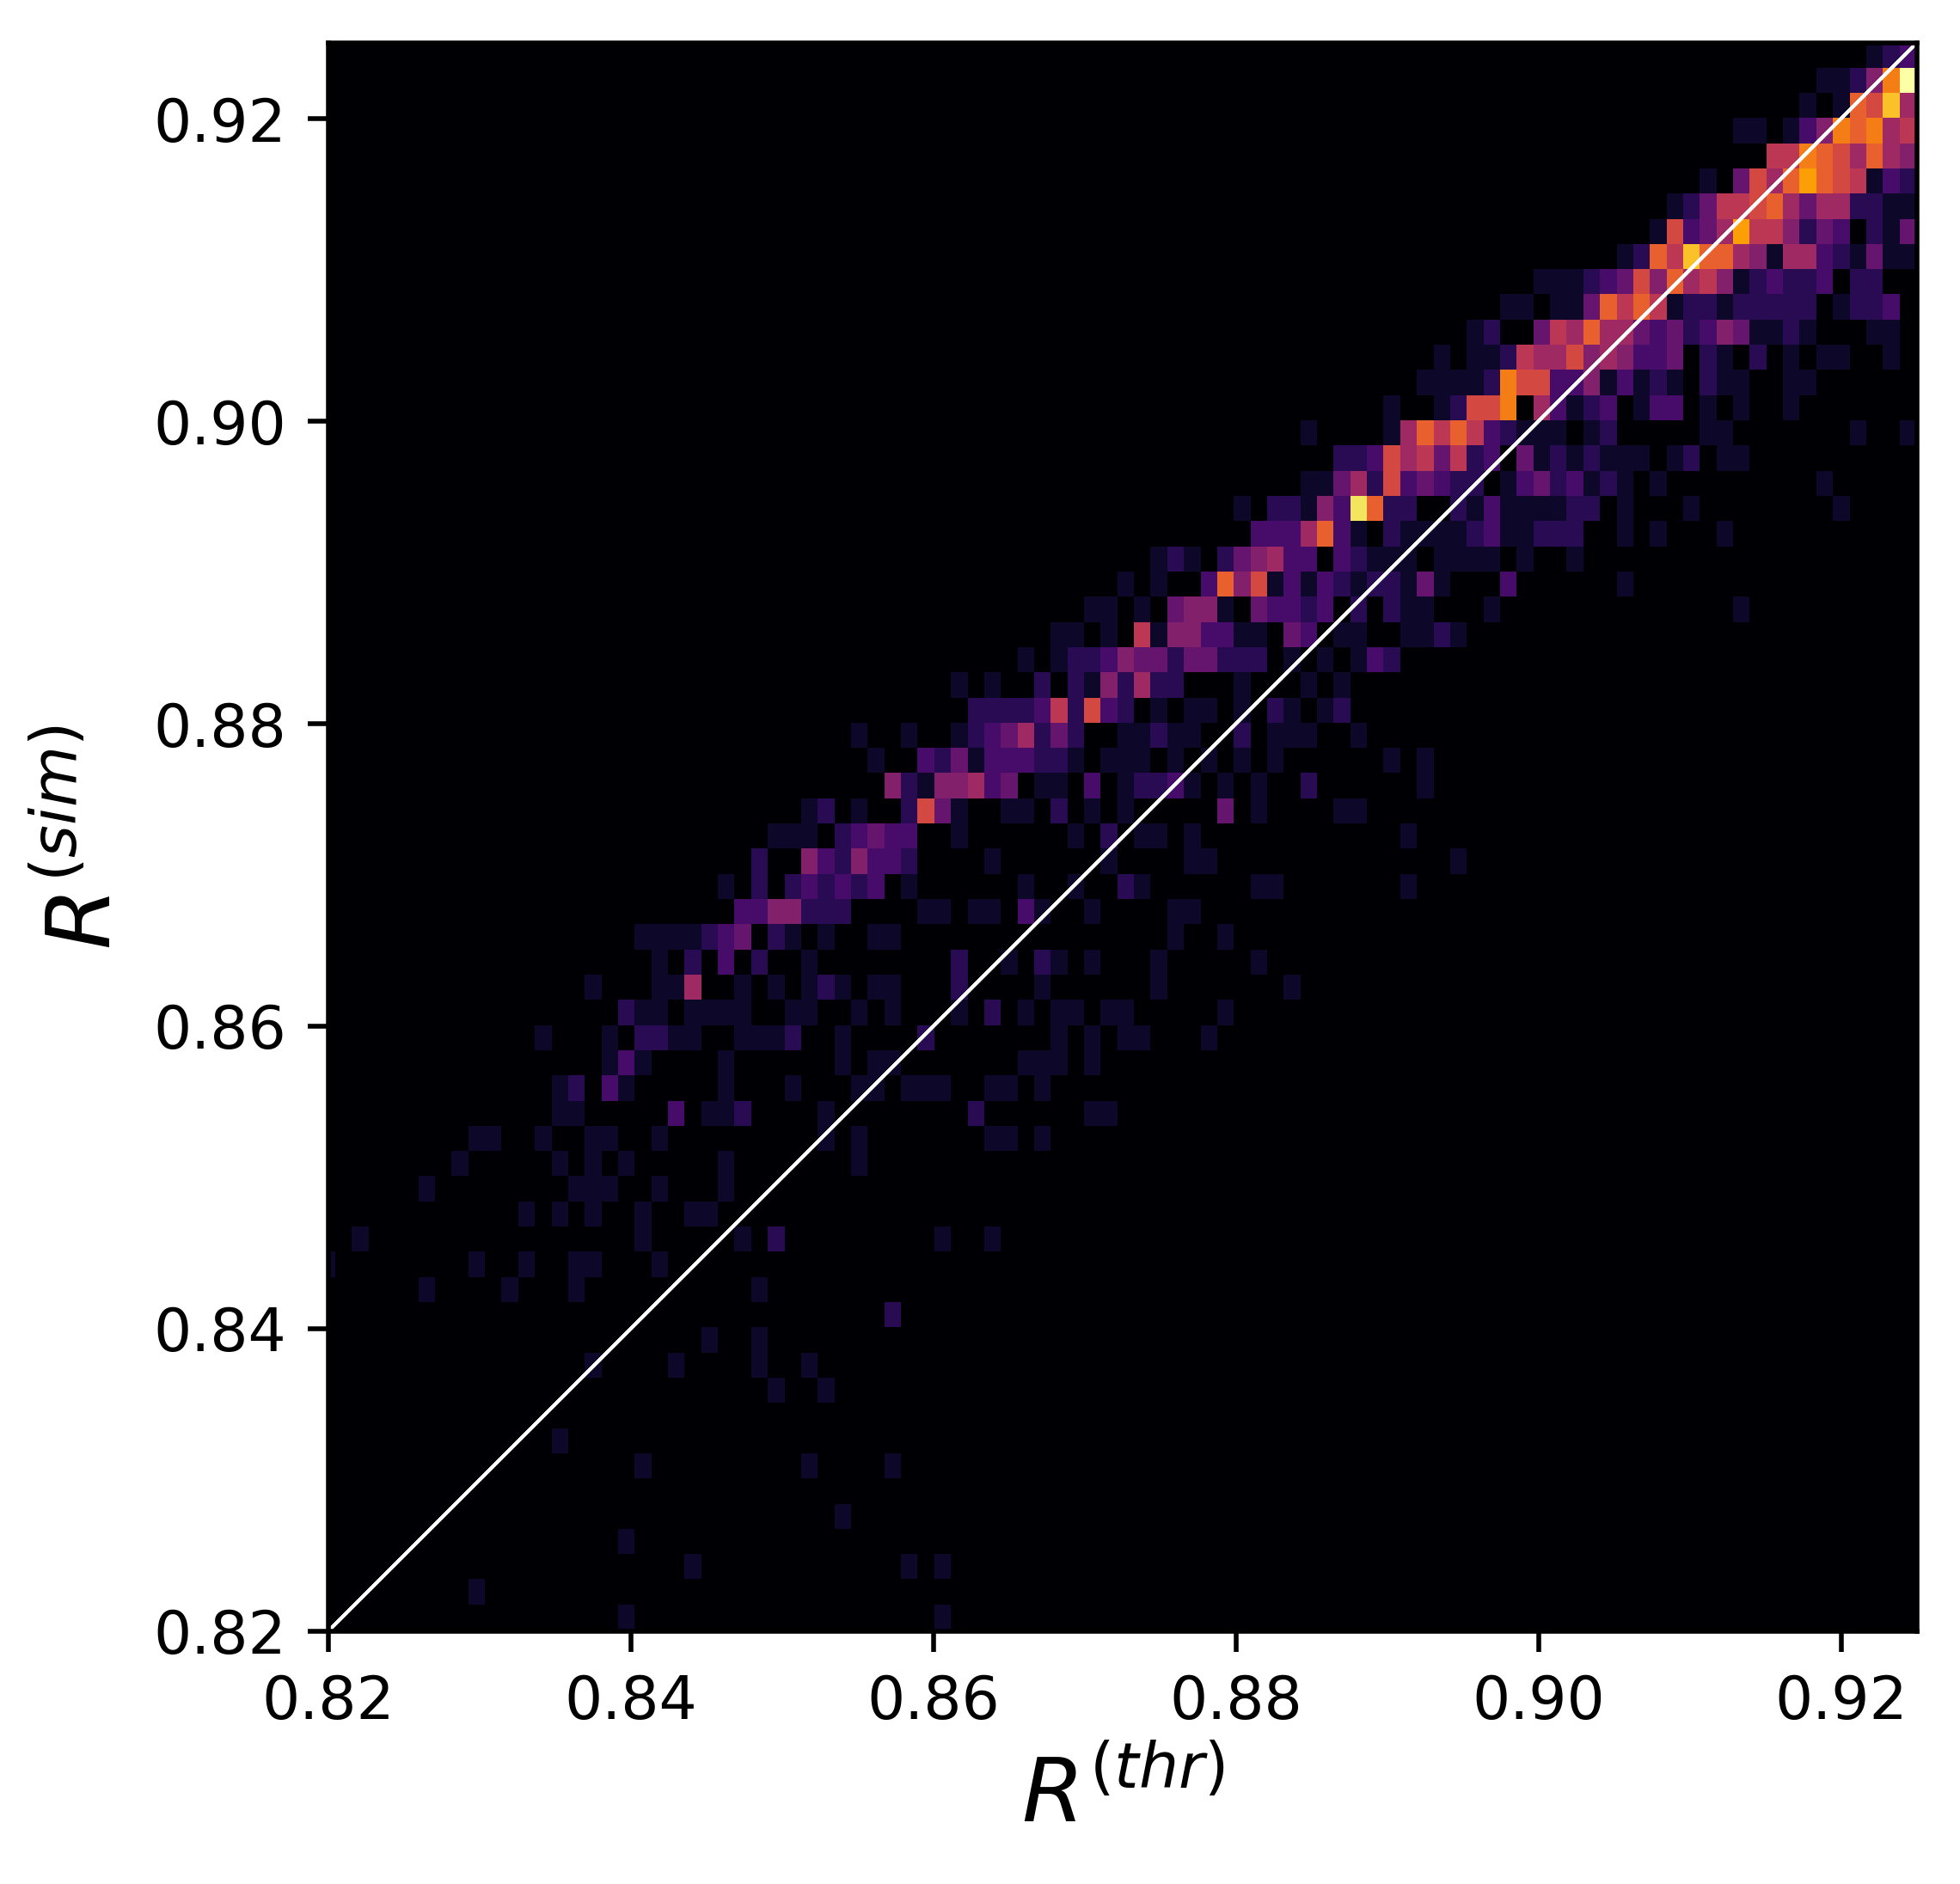

In [243]:
plt.figure(dpi=500)
# Filter out NaN values from A_RPU and RP
valid_indices = ~np.isnan(Rthr) & ~np.isnan(Rsim)
filtered_A_RPU = Rthr[valid_indices]
filtered_RP = Rsim[valid_indices]

# Plot the 2D histogram
plt.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')
# Plot the diagonal line
plt.plot(filtered_RP, filtered_RP, lw=0.5, c='w')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.82,0.925)
plt.ylim(0.82,0.925)
plt.ylabel('$R^{(sim)}$',fontsize=15)
plt.xlabel('$R^{(thr)}$',fontsize=15)

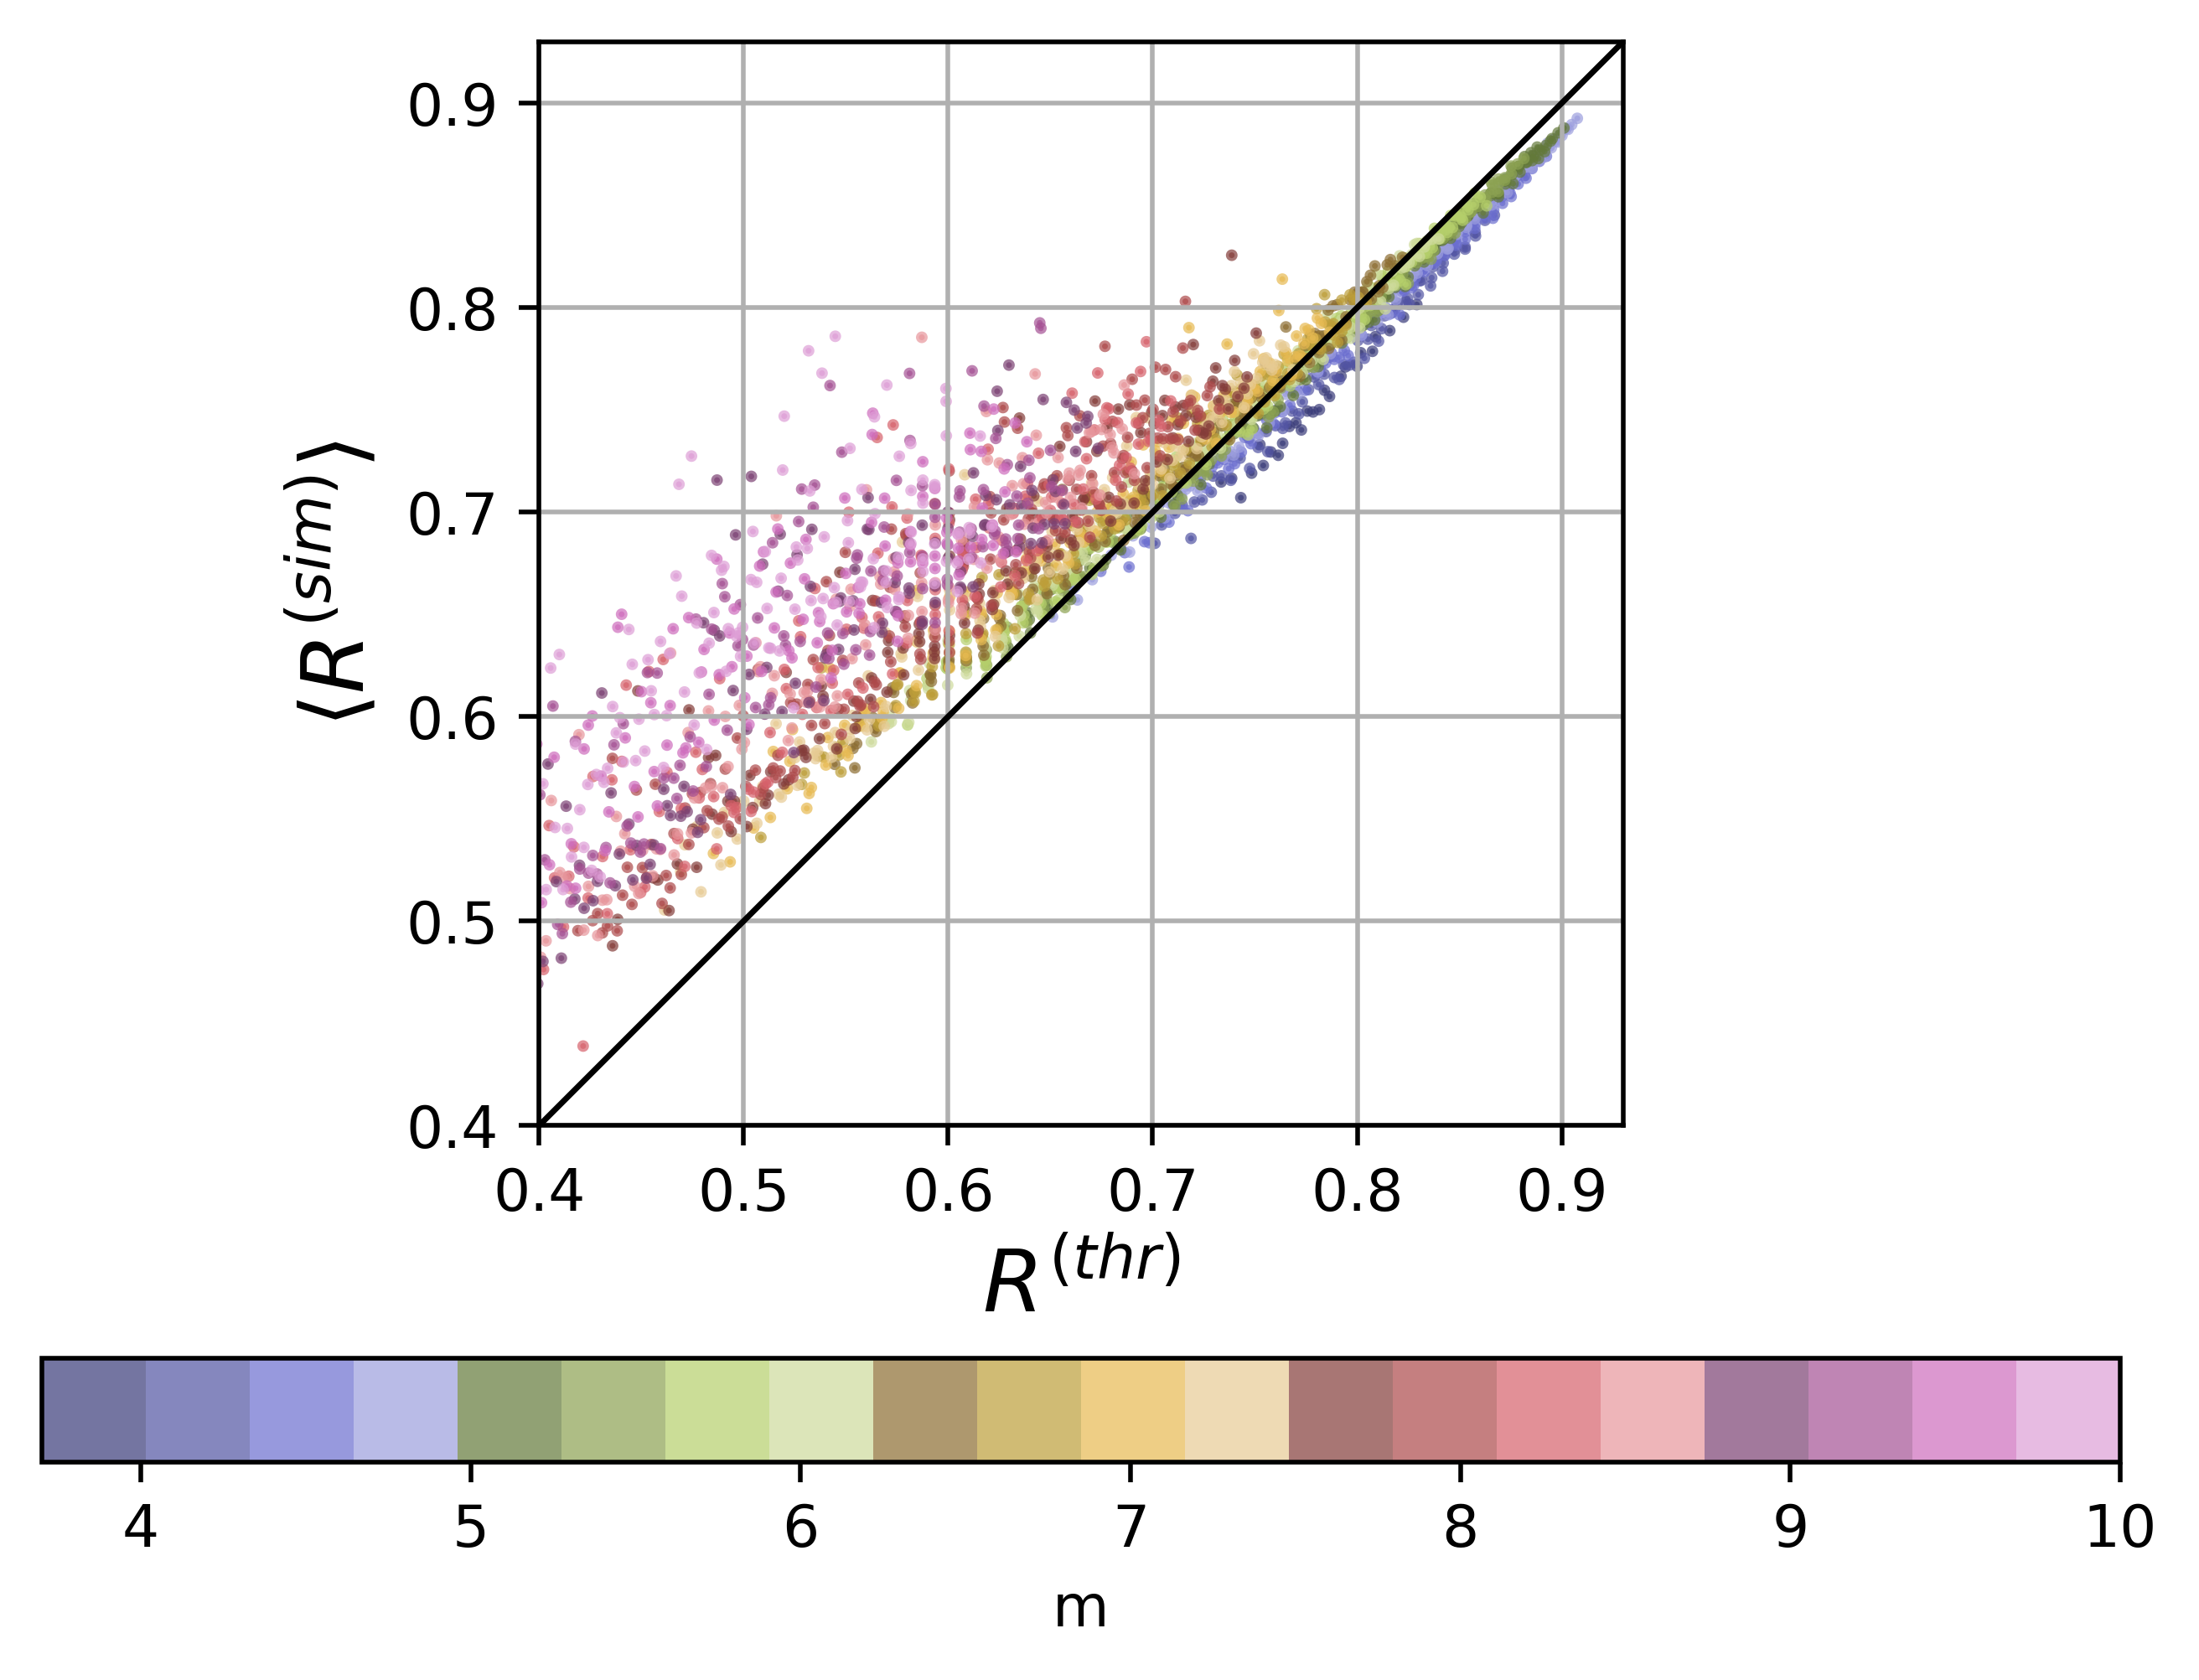

In [236]:
Rthr = R_TM
Rsim = NR
plt.figure(dpi=500)
plt.scatter(Rthr,Rsim,s=1,c=MM,alpha=0.7,cmap='tab20b')
l = (0.4,0.93)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.4,0.93)
plt.ylim(0.4,0.93)
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\left\langle R^{(sim)}\right\rangle$',fontsize=15)
plt.xlabel(r'$R^{(thr)}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal')
plt.grid()



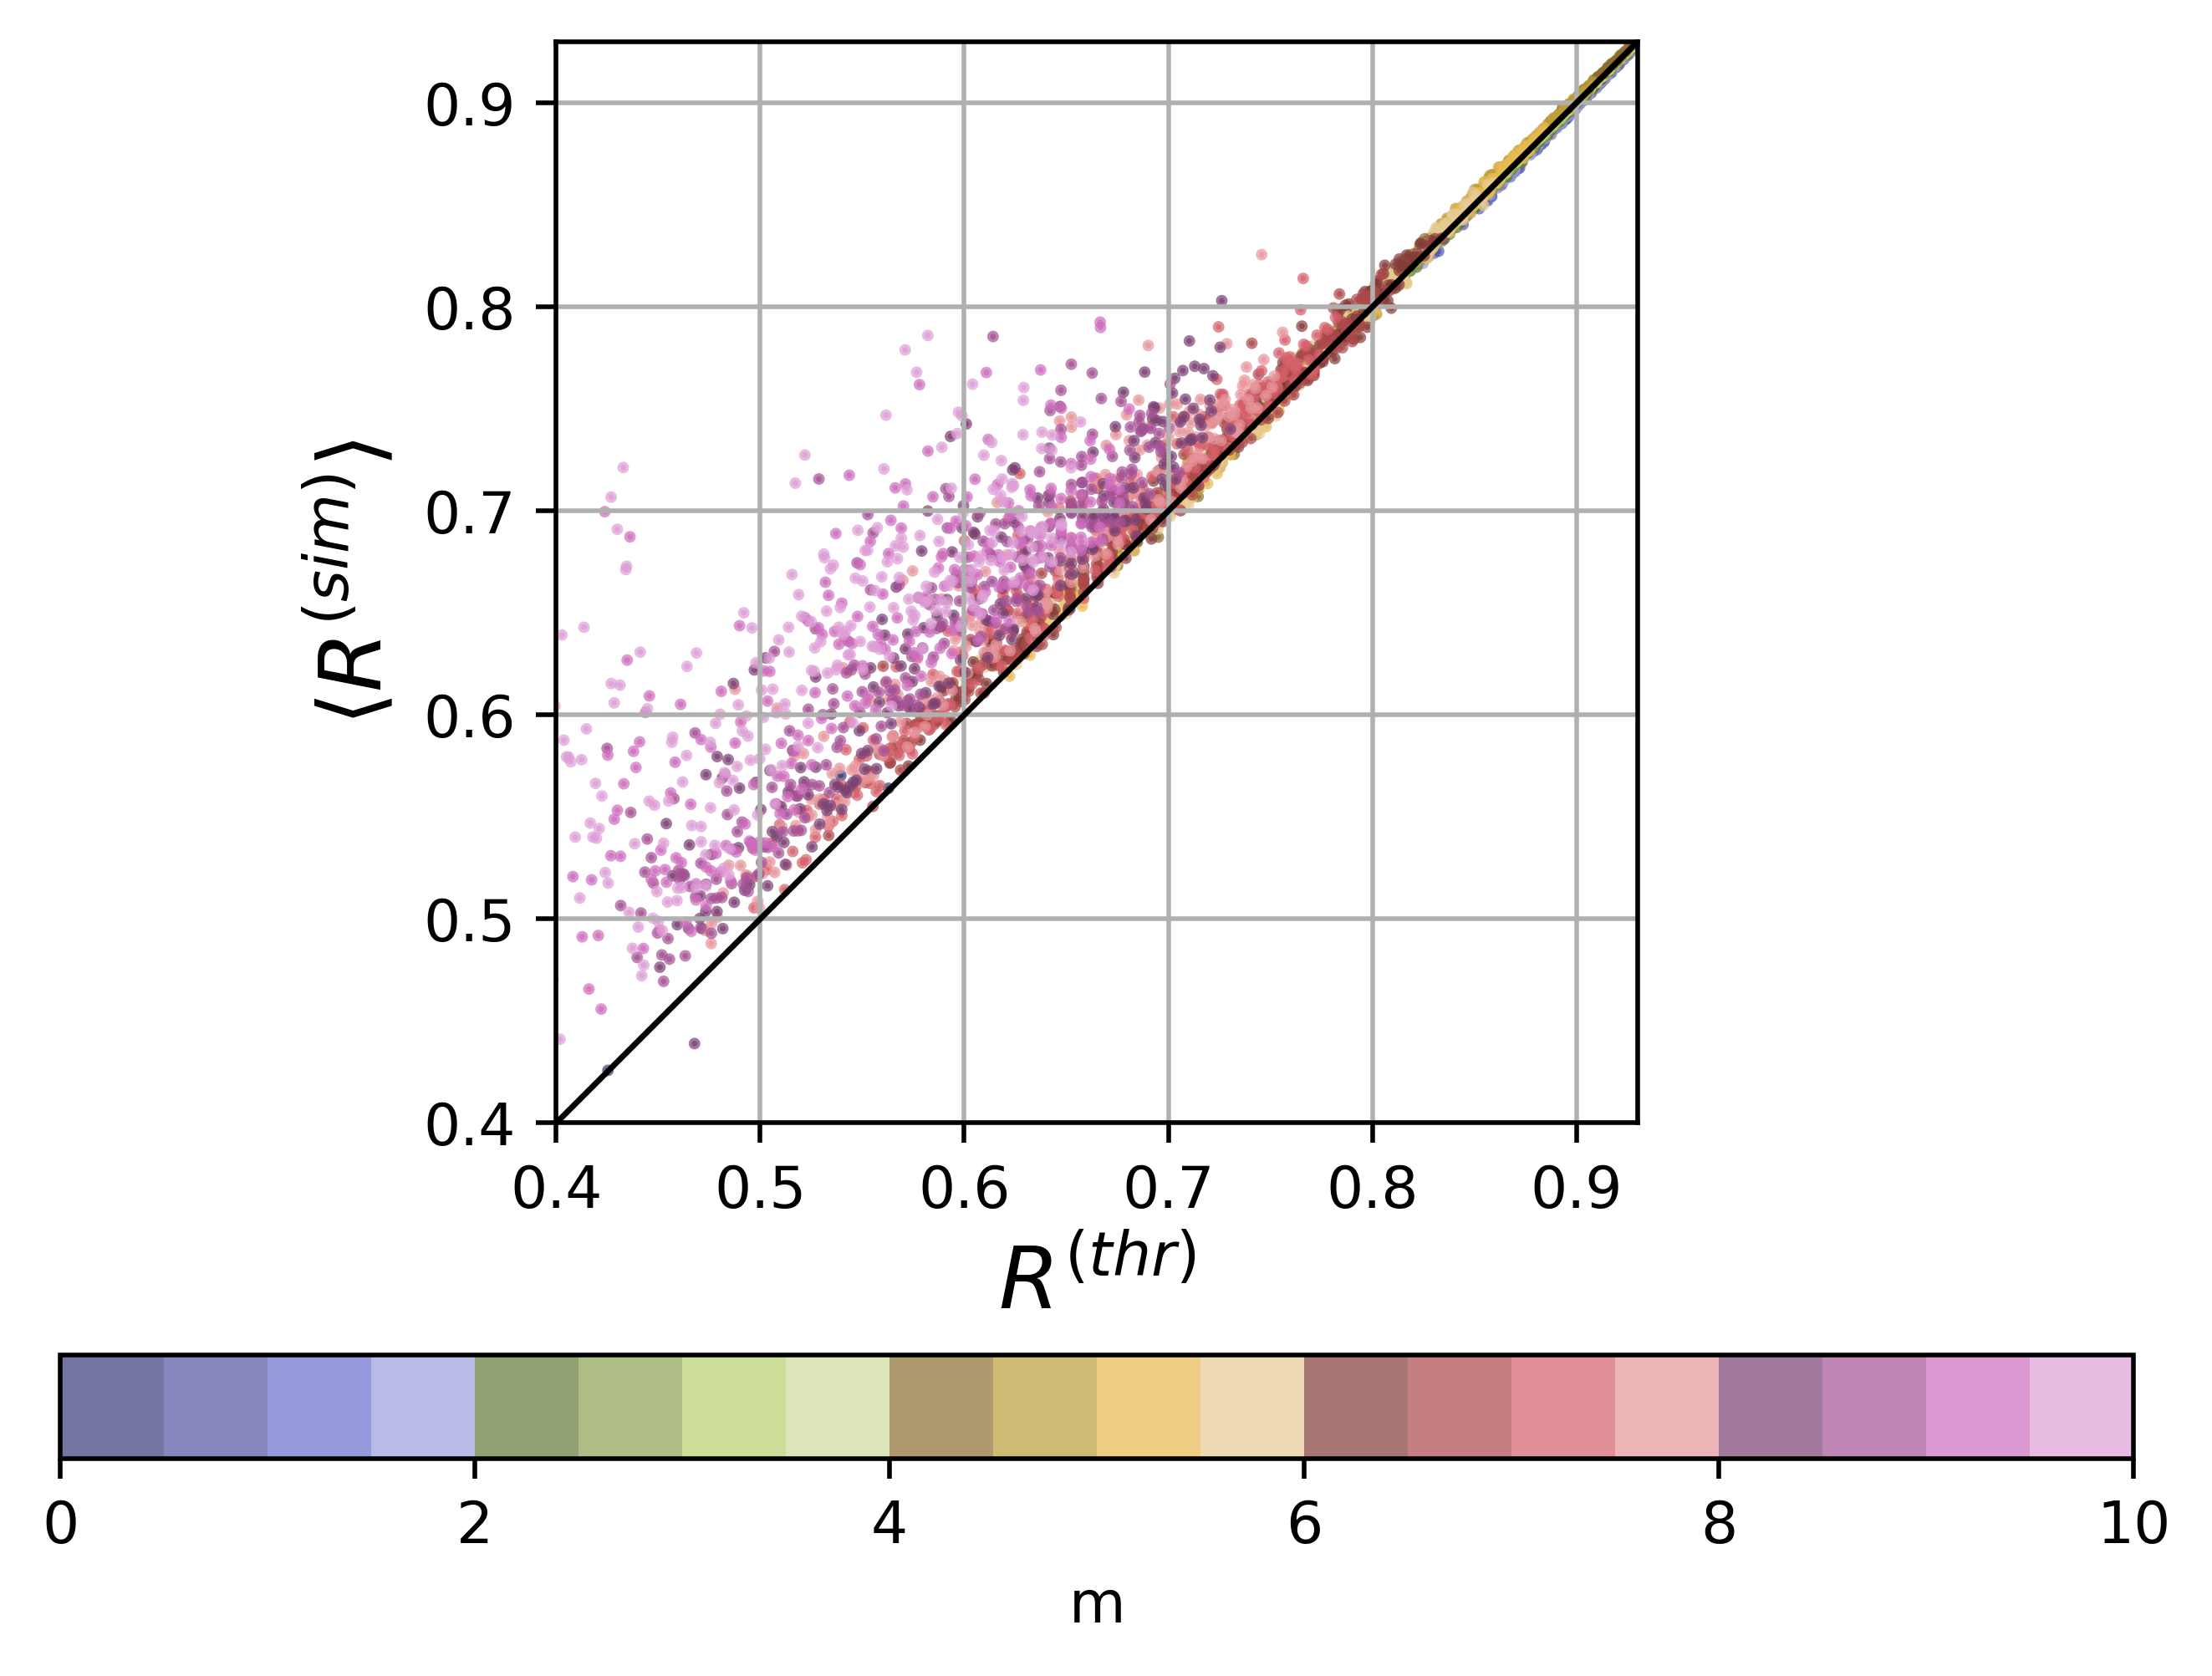

In [235]:
Rthr = R
Rsim = NR
plt.figure(dpi=500)
plt.scatter(Rthr,Rsim,s=1,c=MM,alpha=0.7,cmap='tab20b')
l = (0.4,0.93)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.4,0.93)
plt.ylim(0.4,0.93)
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\left\langle R^{(sim)}\right\rangle$',fontsize=15)
plt.xlabel(r'$R^{(thr)}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal')
plt.grid()



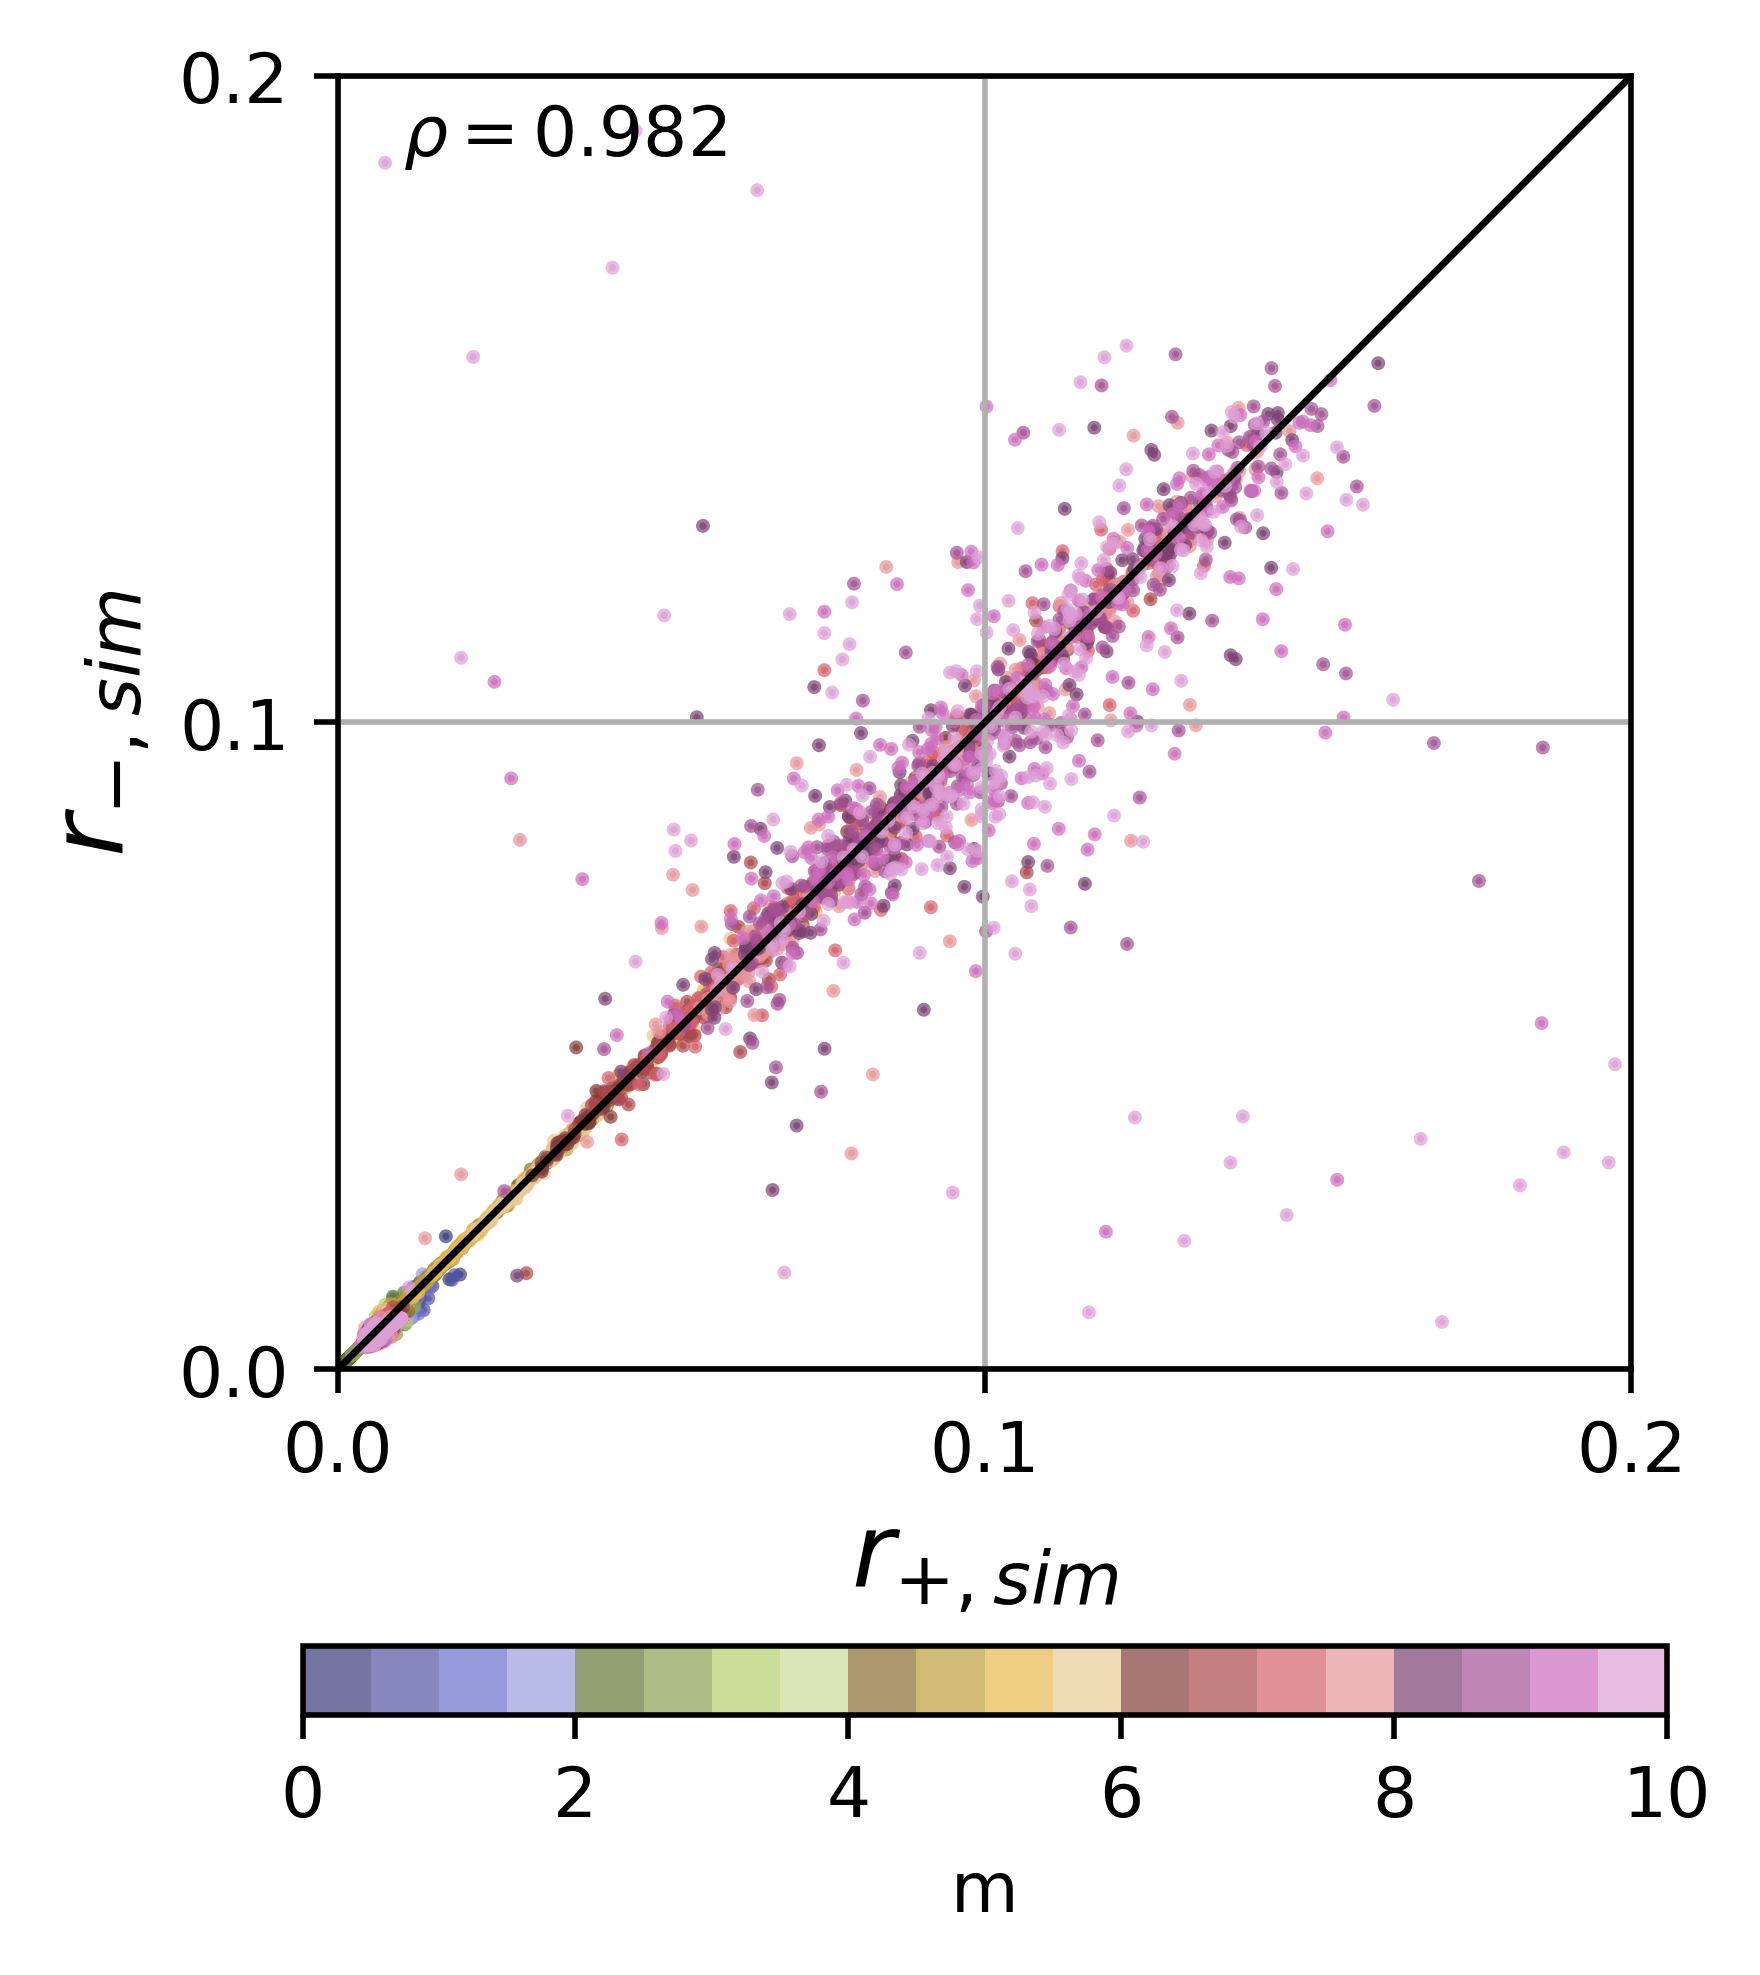

In [130]:
plt.figure(dpi=500)
plt.scatter(NRPT,NRMT,s=1,c=MM,alpha=0.7,cmap='tab20b')
l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(NRPT,NRMT)
plt.text(0.05,0.98,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top')
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$r_{-,sim}$',fontsize=15)
plt.xlabel(r'$r_{+,sim}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal',shrink=0.55)
plt.grid()



In [ ]:
plt.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')


In [114]:
NRPT

array([[0.00981623, 0.00948574, 0.00920728, ..., 0.49903432, 0.49905424,
        0.49907355],
       [0.00981623, 0.00946276, 0.00916496, ..., 0.        , 0.        ,
        0.        ],
       [0.00981623, 0.0094409 , 0.009125  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00981623, 0.00916595, 0.00863285, ..., 0.09941881, 0.09055274,
        0.06864981],
       [0.00981623, 0.00916559, 0.00863222, ..., 0.06901859, 0.10313793,
        0.0982272 ],
       [0.00981623, 0.00916524, 0.00863161, ..., 0.10791481, 0.0585868 ,
        0.09947986]])

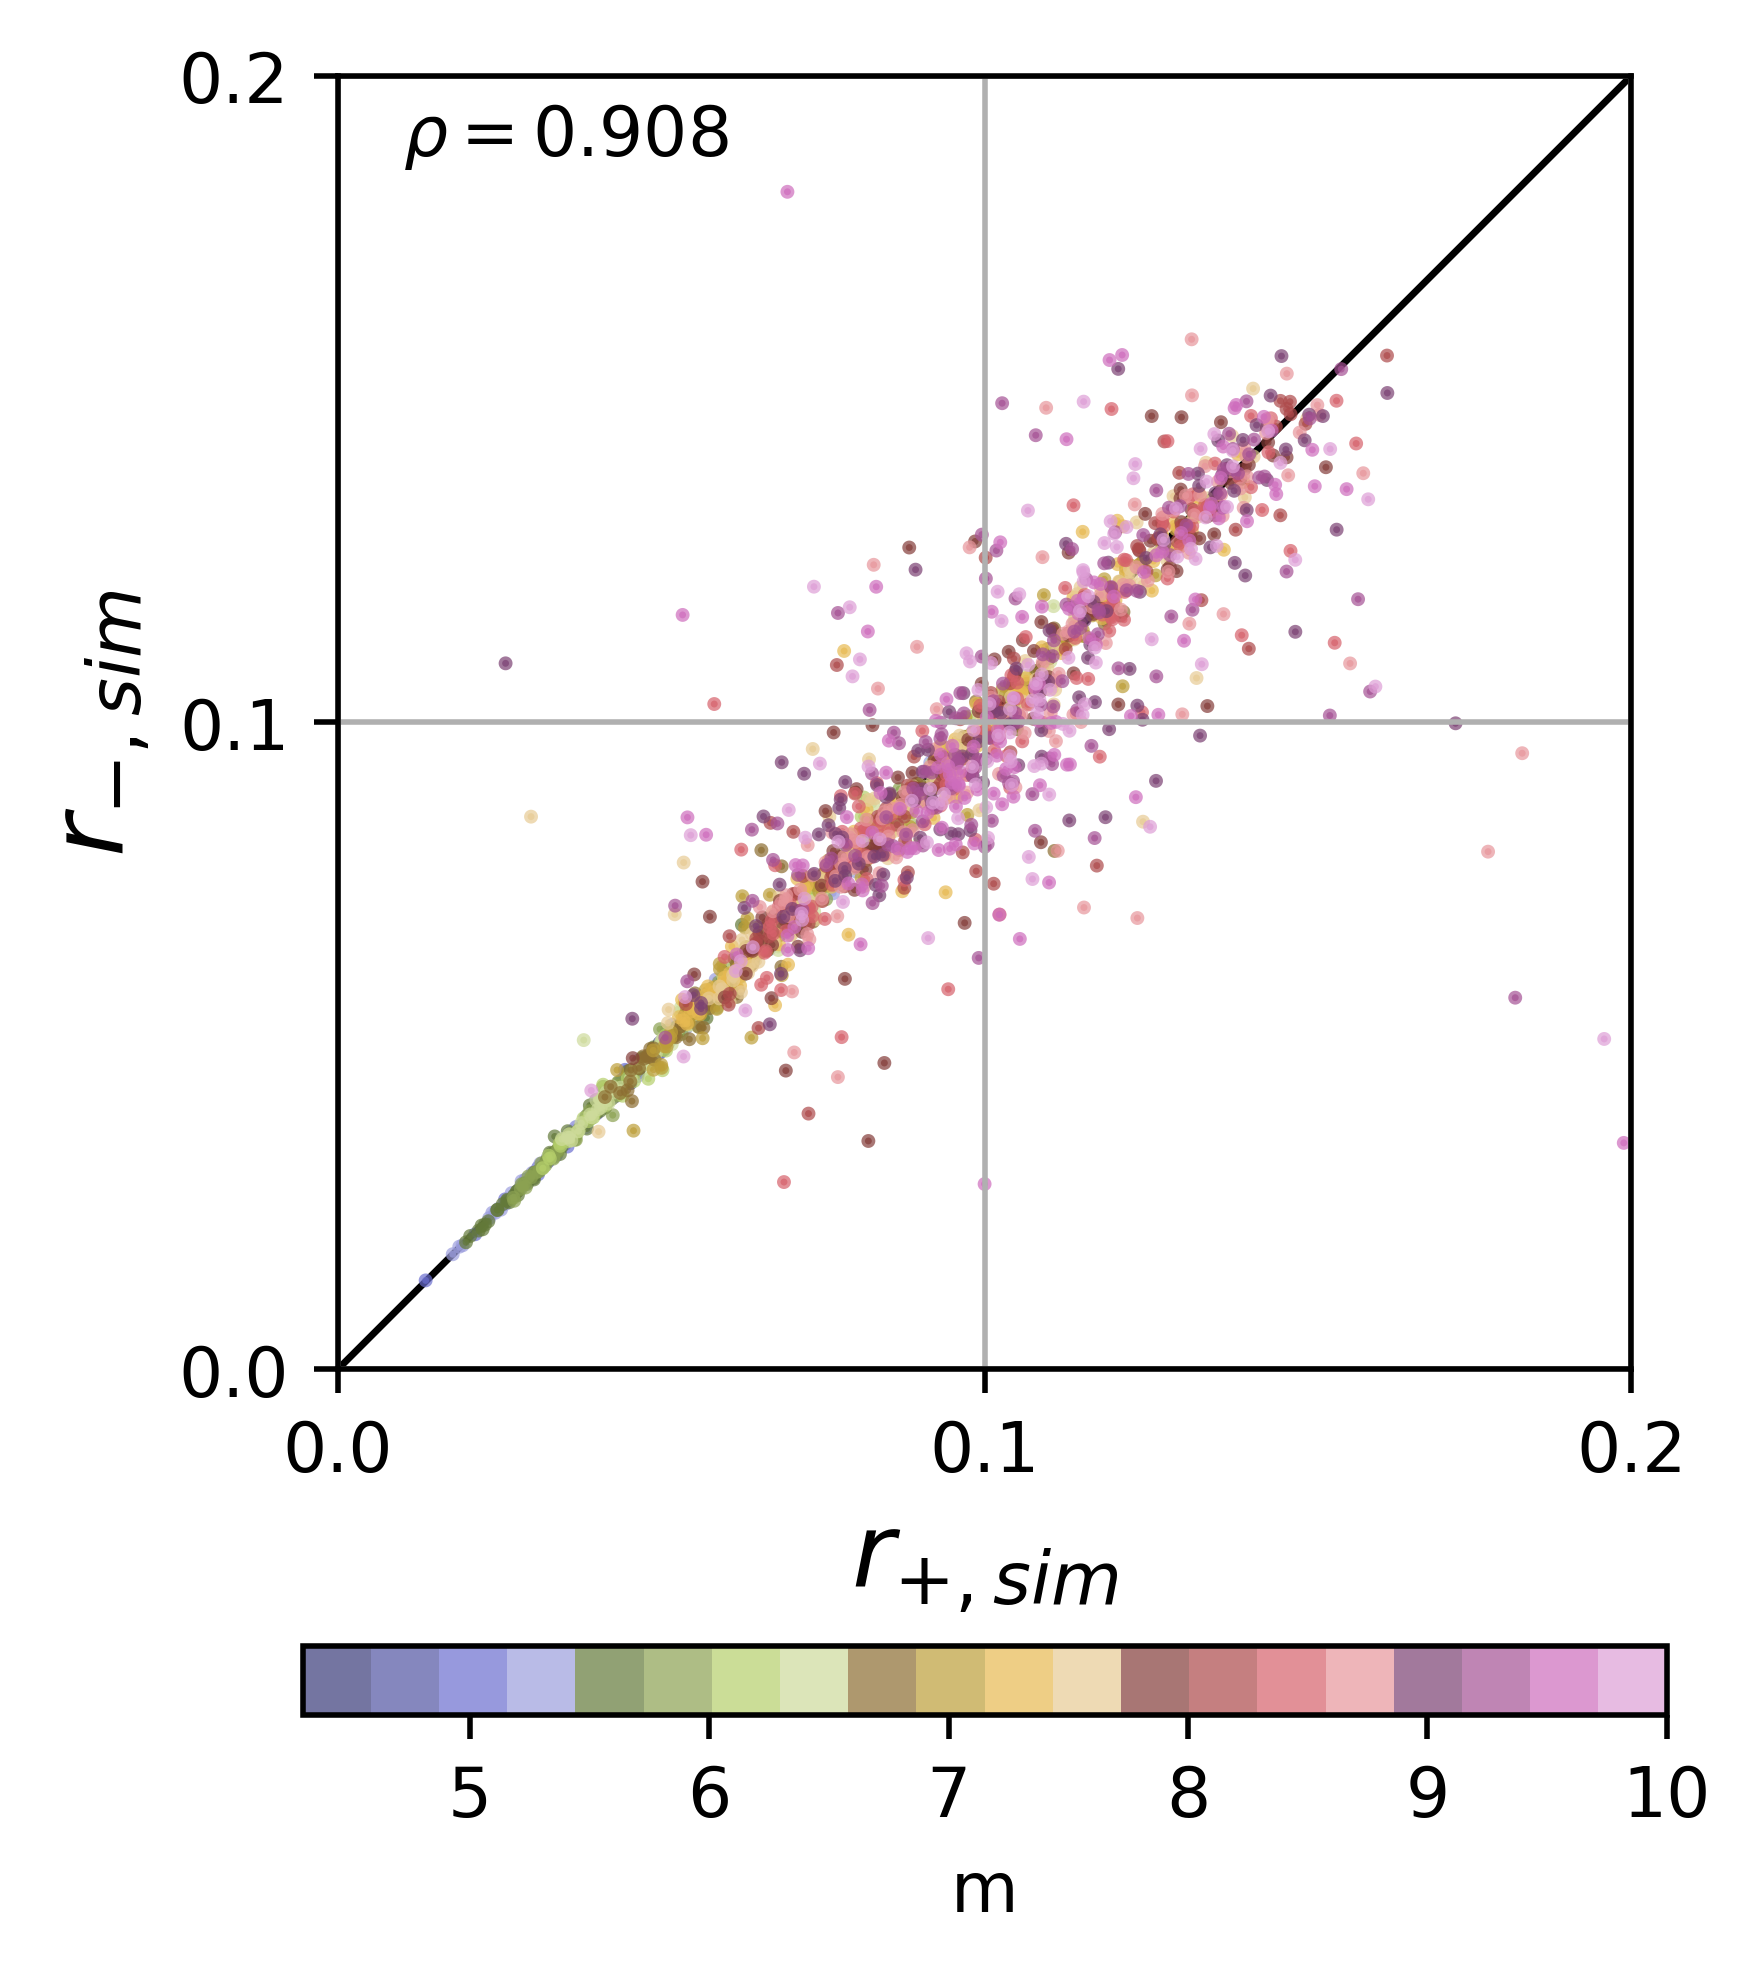

In [140]:
plt.figure(dpi=500)
plt.scatter(NRP,NRM,s=1,c=MM,alpha=0.7,cmap='tab20b')
l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(NRP,NRM)
plt.text(0.05,0.98,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top')
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$r_{-,sim}$',fontsize=15)
plt.xlabel(r'$r_{+,sim}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal',shrink=0.55)
plt.grid()



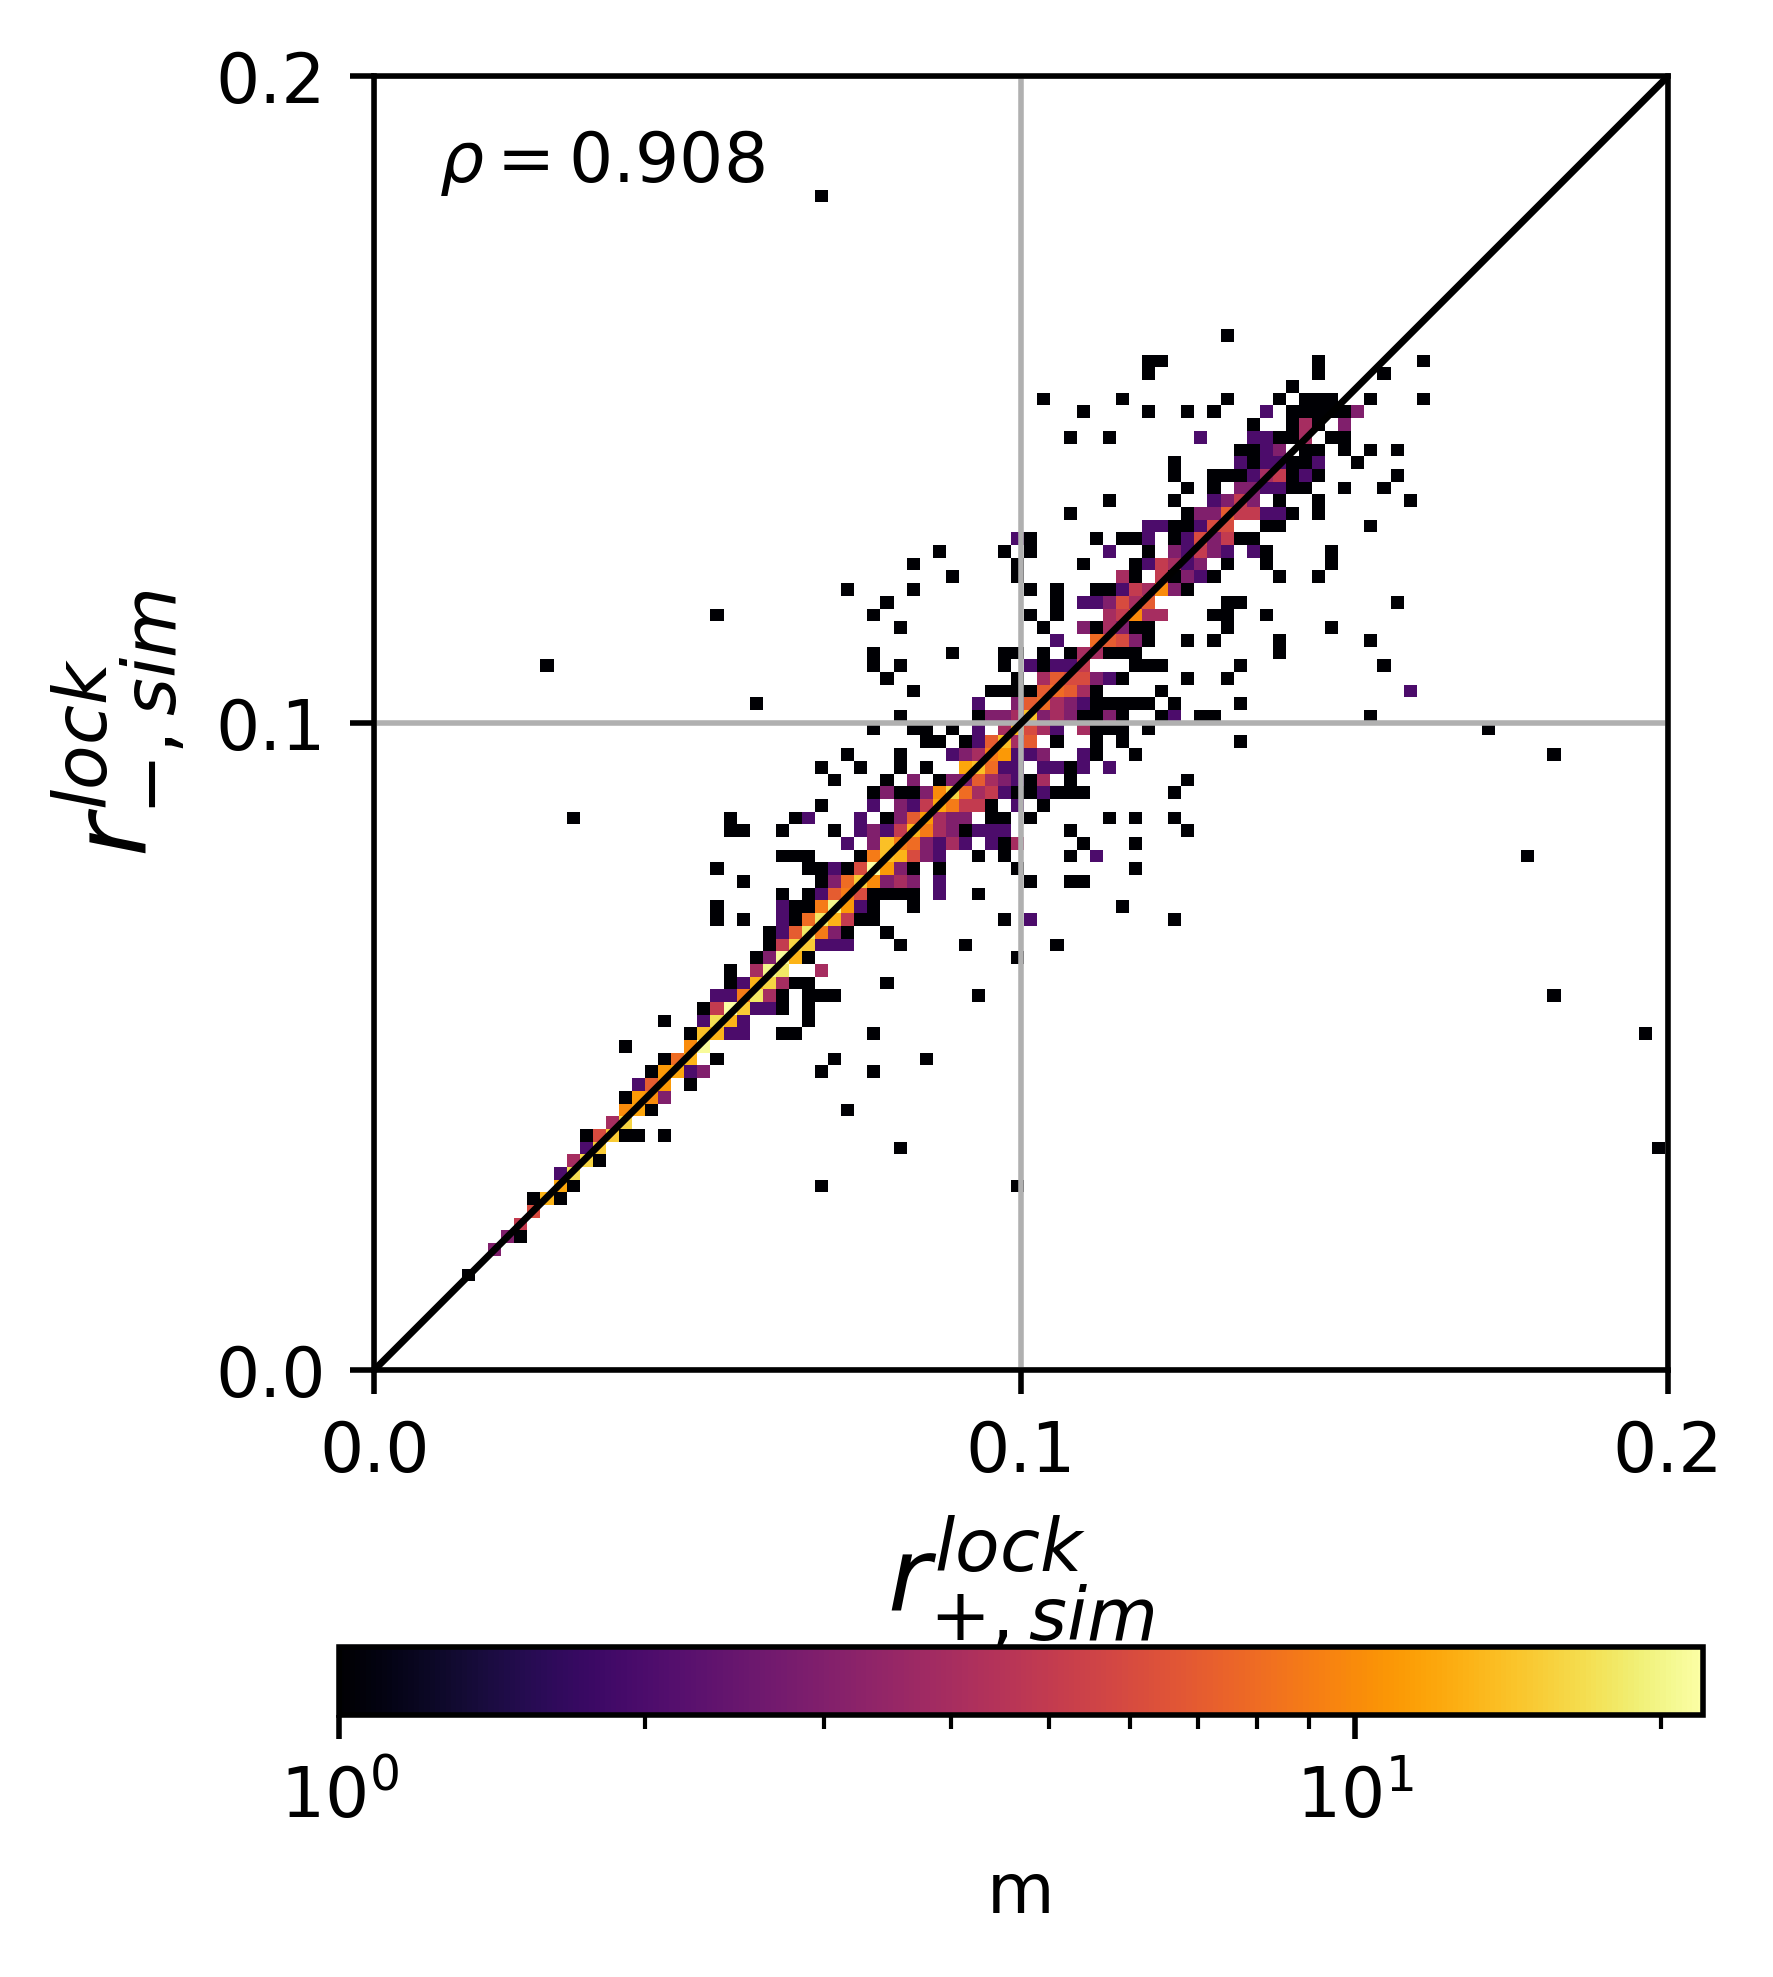

In [137]:
from matplotlib.colors import LogNorm
plt.figure(dpi=500)
# plt.scatter(NRPT,NRMT,s=1,c=MM,alpha=0.7,cmap='tab20b')
slice = np.isnan(NRP) | np.isnan(NRM)
plt.hist2d(NRP[~slice].flatten(),NRM[~slice].flatten(),bins=100,cmap='inferno',norm=LogNorm())
plt.hist2d(NRP[~slice].flatten(),NRM[~slice].flatten(),bins=100,cmap='inferno',norm=LogNorm())

l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(NRP[~slice],NRM[~slice])
plt.text(0.05,0.96,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top',bbox=dict(facecolor='w', alpha=1,linewidth=0,pad=1))
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$r_{-,sim}^{lock}$',fontsize=15)
plt.xlabel(r'$r_{+,sim}^{lock}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal',shrink=0.55)
plt.grid()



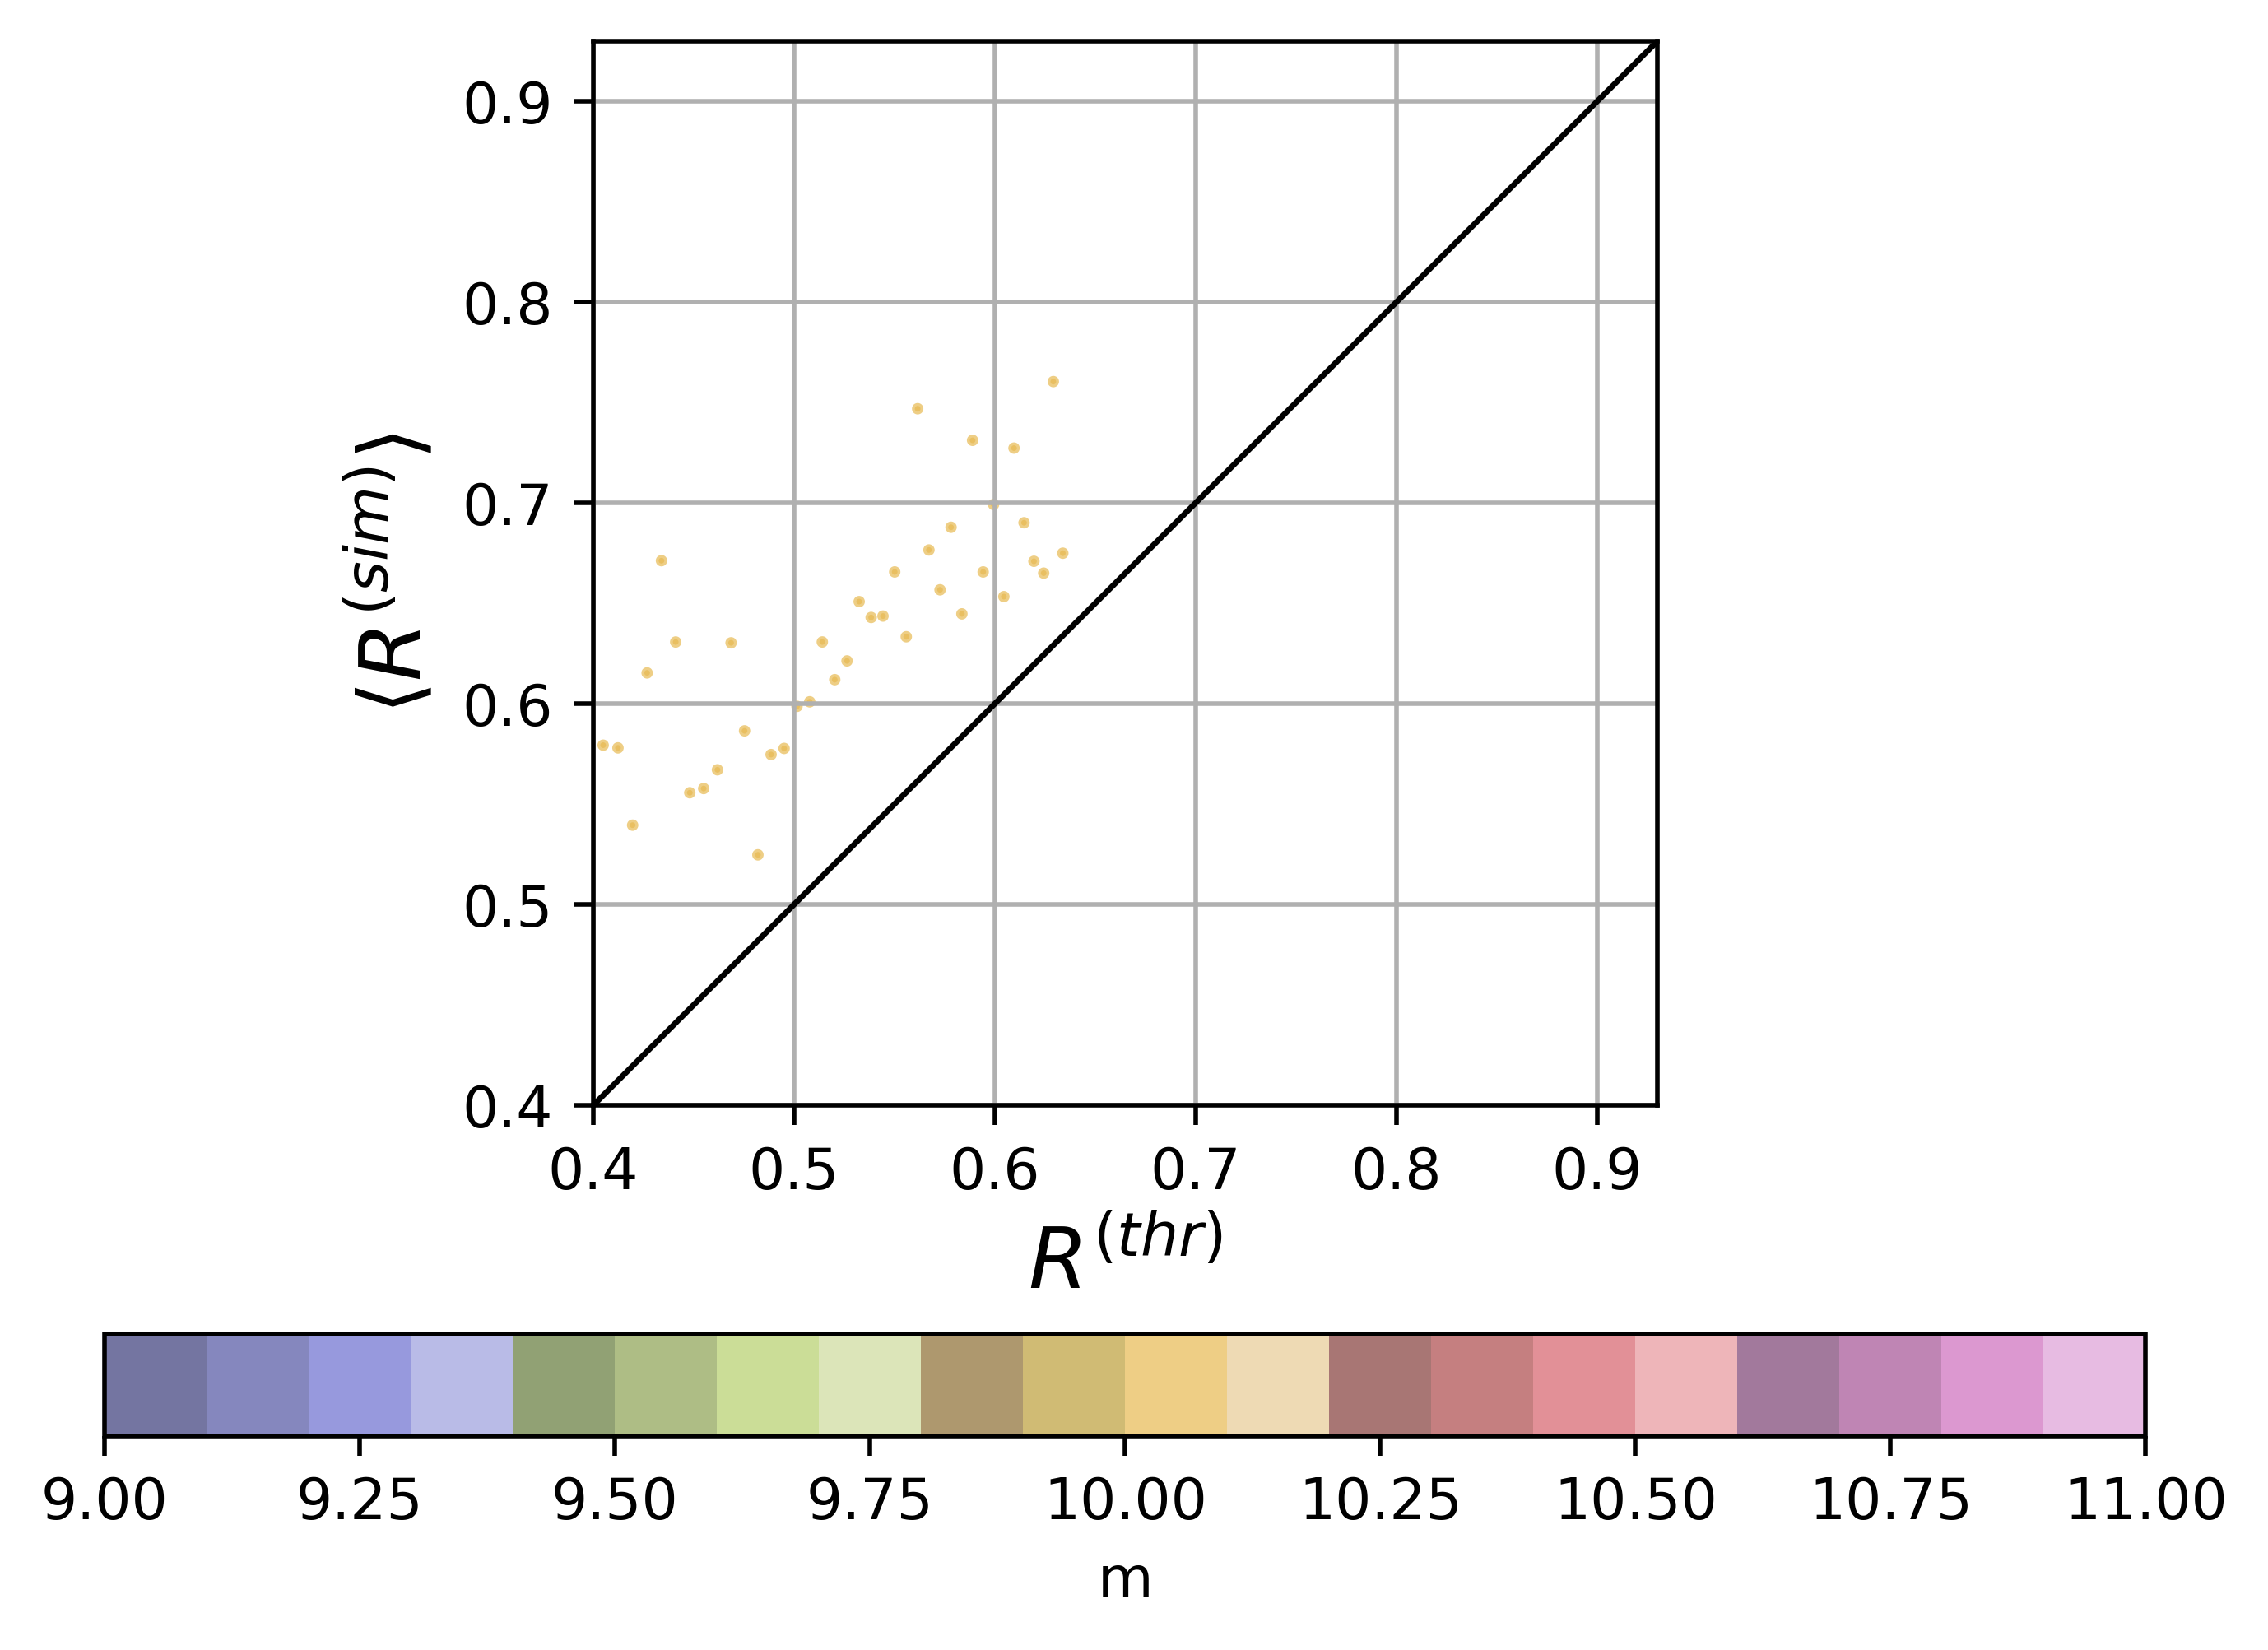

In [40]:
Rthr = R
Rsim = NR
plt.figure(dpi=500)
plt.scatter(Rthr[100,:],Rsim[100,:],s=1,c=MM[100,:],alpha=0.7,cmap='tab20b')
l = (0.4,0.93)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.4,0.93)
plt.ylim(0.4,0.93)
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\left\langle R^{(sim)}\right\rangle$',fontsize=15)
plt.xlabel(r'$R^{(thr)}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal')
plt.grid()



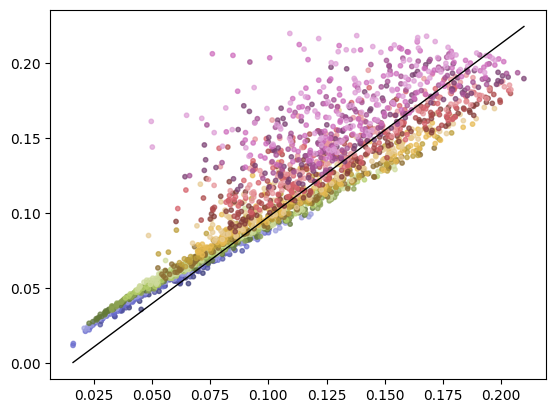

In [225]:
C = np.where(~np.isnan(NRP),NSIG_S,np.nan)
plt.scatter(C,sig_r,c=MM,s=10,alpha=0.7,cmap='tab20b')
plt.plot([np.nanmin(C),np.nanmax(C)],[np.nanmin(sig_r),np.nanmax(sig_r)],color='k',lw=1)

In [90]:
mcs_rp0 = np.load('Simul/mcs_rp0.npz',allow_pickle=True)
mcs_rpdh = np.load('Simul/mcs_rpdh.npz',allow_pickle=True)


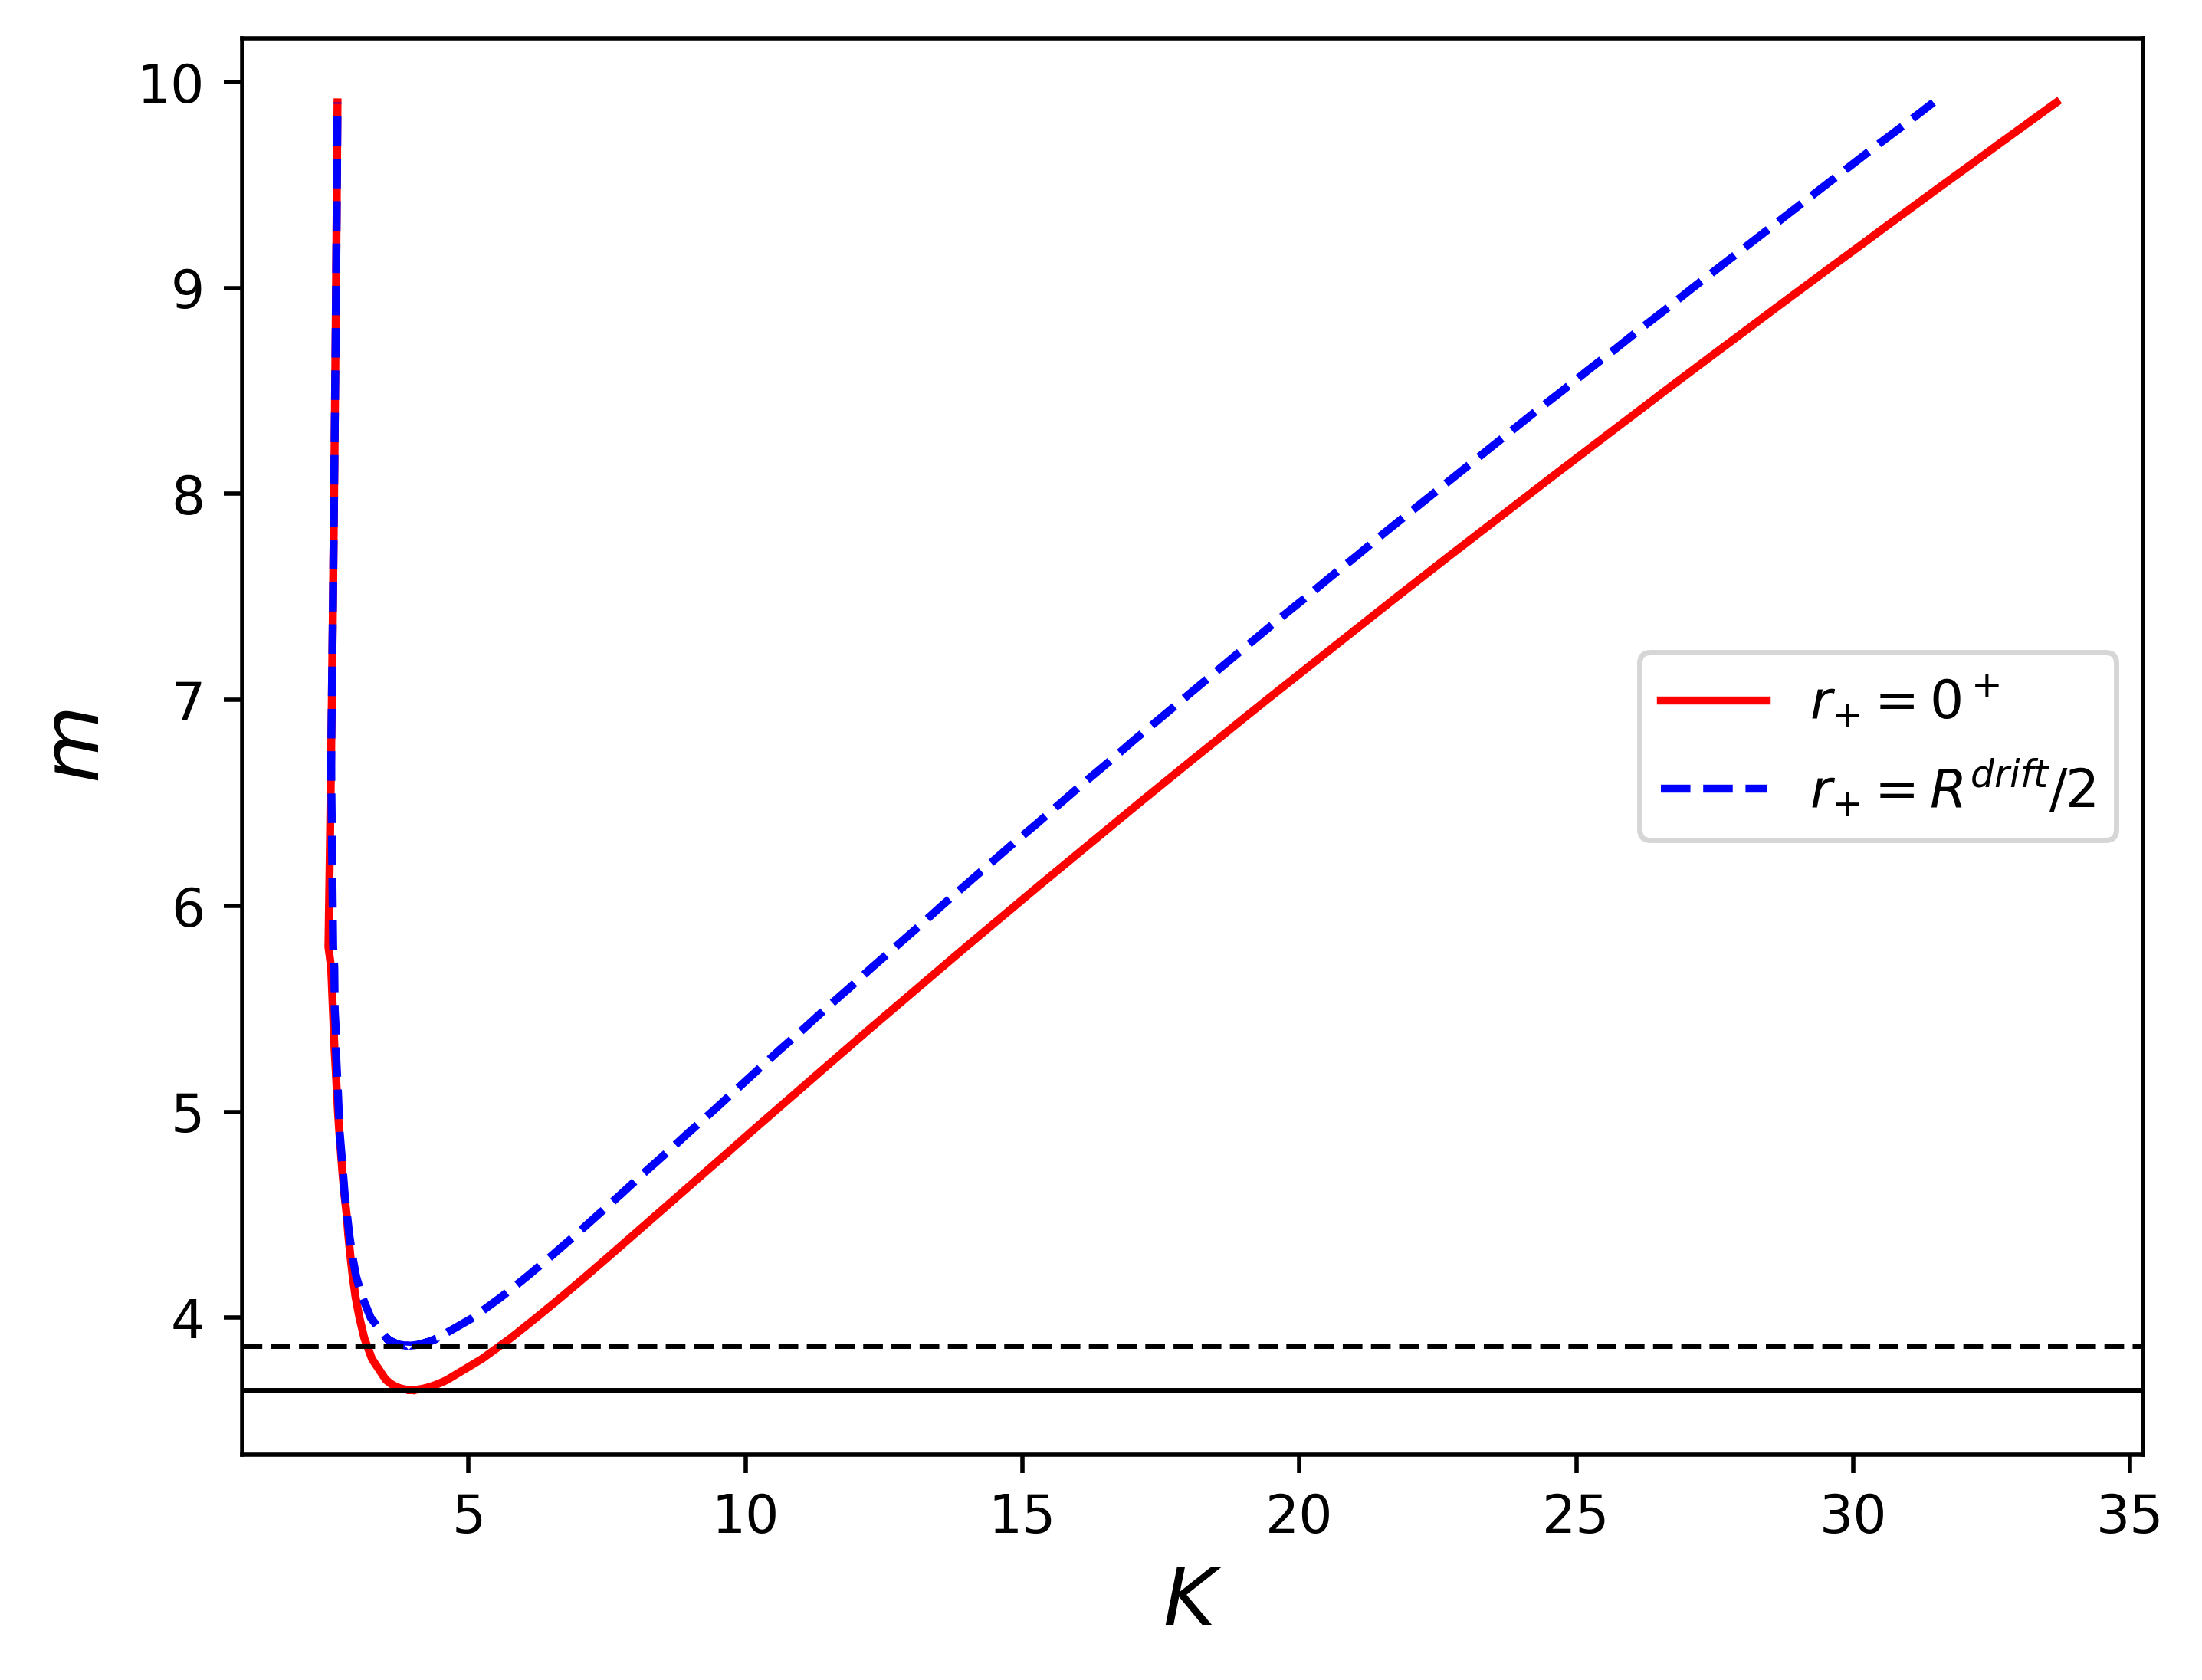

In [91]:
ms_rp0=mcs_rp0['ms']
K_rp0u=mcs_rp0['K_u']
K_rp0d=mcs_rp0['K_d']

ms_rpdh=mcs_rpdh['ms']
K_rpdhu=mcs_rpdh['K_u']
K_rpdhd=mcs_rpdh['K_d']

plt.figure(dpi=500)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')

plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.axhline(np.min(ms_rp0),ls='-',c='k',lw=1)
plt.axhline(np.min(ms_rpdh),ls='--',c='k',lw=1)
plt.legend()

In [114]:
np.min(ms_rp0),np.min(ms_rpdh)

(3.6492096000000003, 3.8645426)

Text(0, 0.5, '$m$')

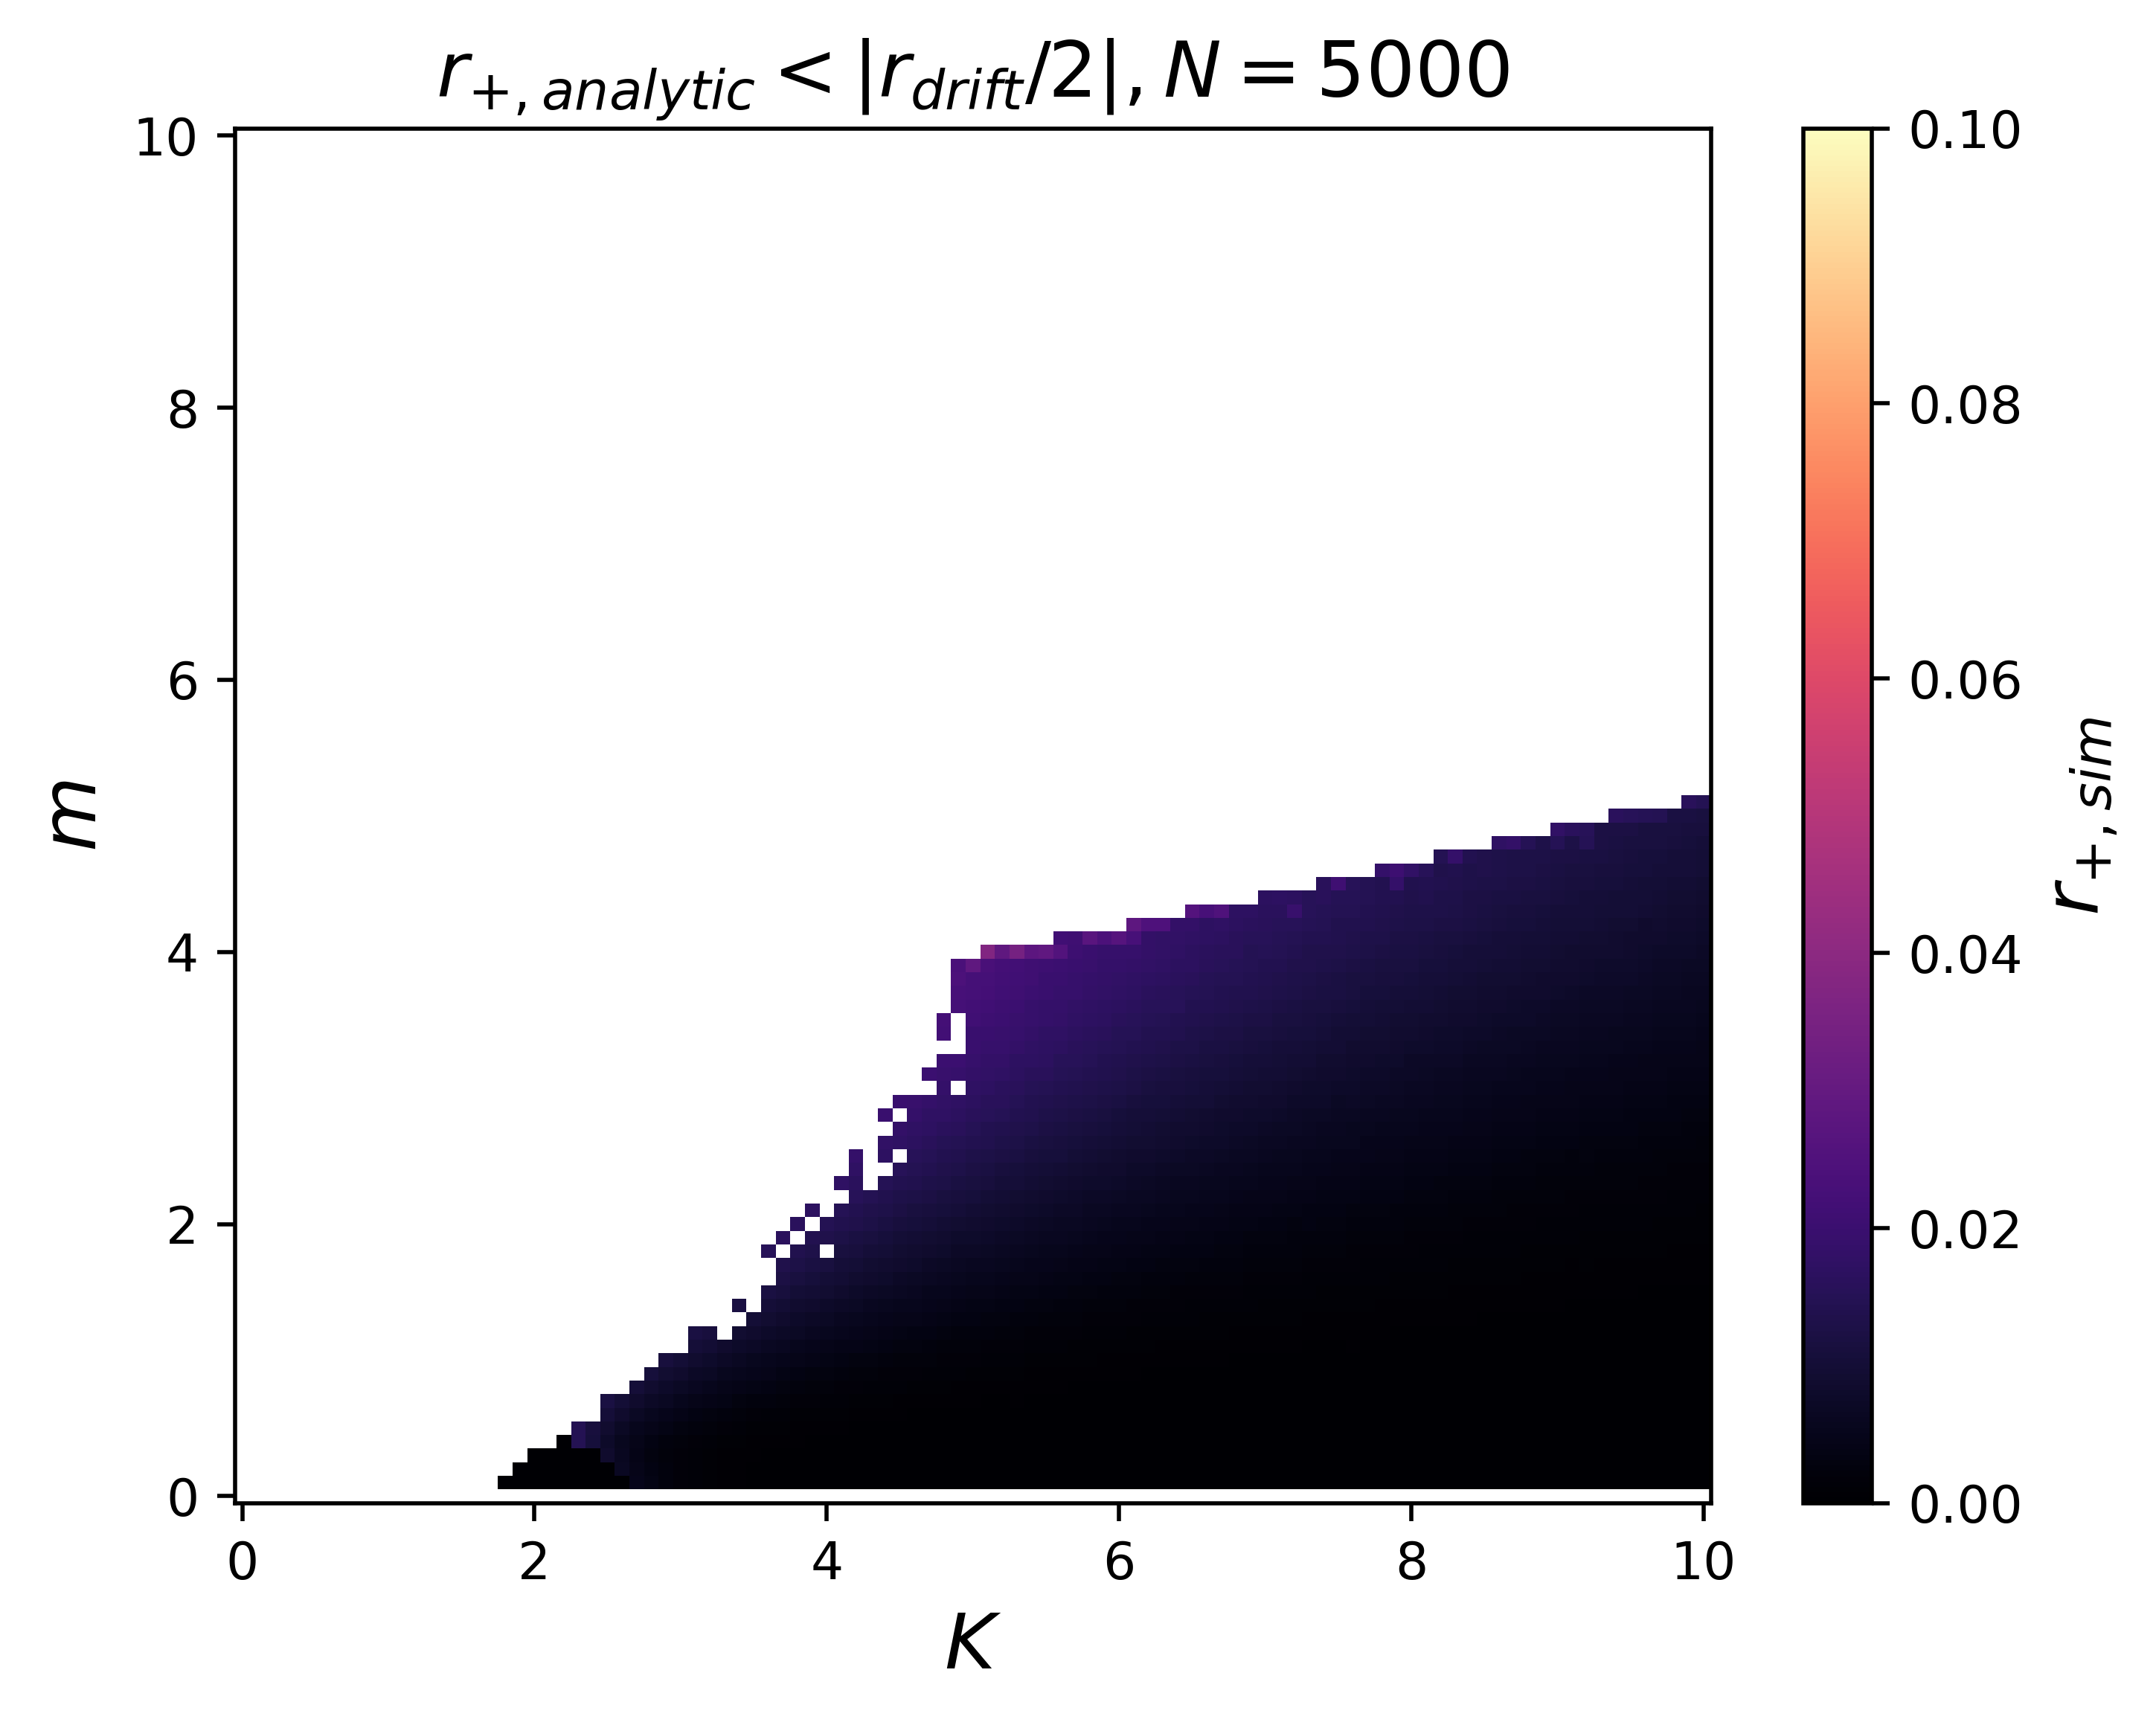

In [98]:
plt.figure(dpi=500)
X = np.isnan(RP)
Y = RP>=RD/2
Z = np.isnan(NR0)
plt.pcolormesh(KK,MM,np.where(~Z&~Y,NRPT,np.nan),cmap='magma',vmin=0,vmax=0.1)
cbar = plt.colorbar(label=r'$r_{+,sim}$')
# cbar.ax.tick_params(labelsize=12)  # Adjust the font size of the colorbar ticks
cbar.set_label(r'$r_{+,sim}$', fontsize=15)  # Set the font size of the colorbar label
# plt.title(r'$r_{0,sim}>0.1$',fontsize=15)
plt.title(r'$r_{+,analytic}<|r_{drift}/2|,N = {5000}$',fontsize=15)

plt.xlabel('$K$',fontsize=15)
plt.ylabel('$m$',fontsize=15)


C:\Users\kim9y\AppData\Local\Temp\ipykernel_38252\605740637.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('magma')


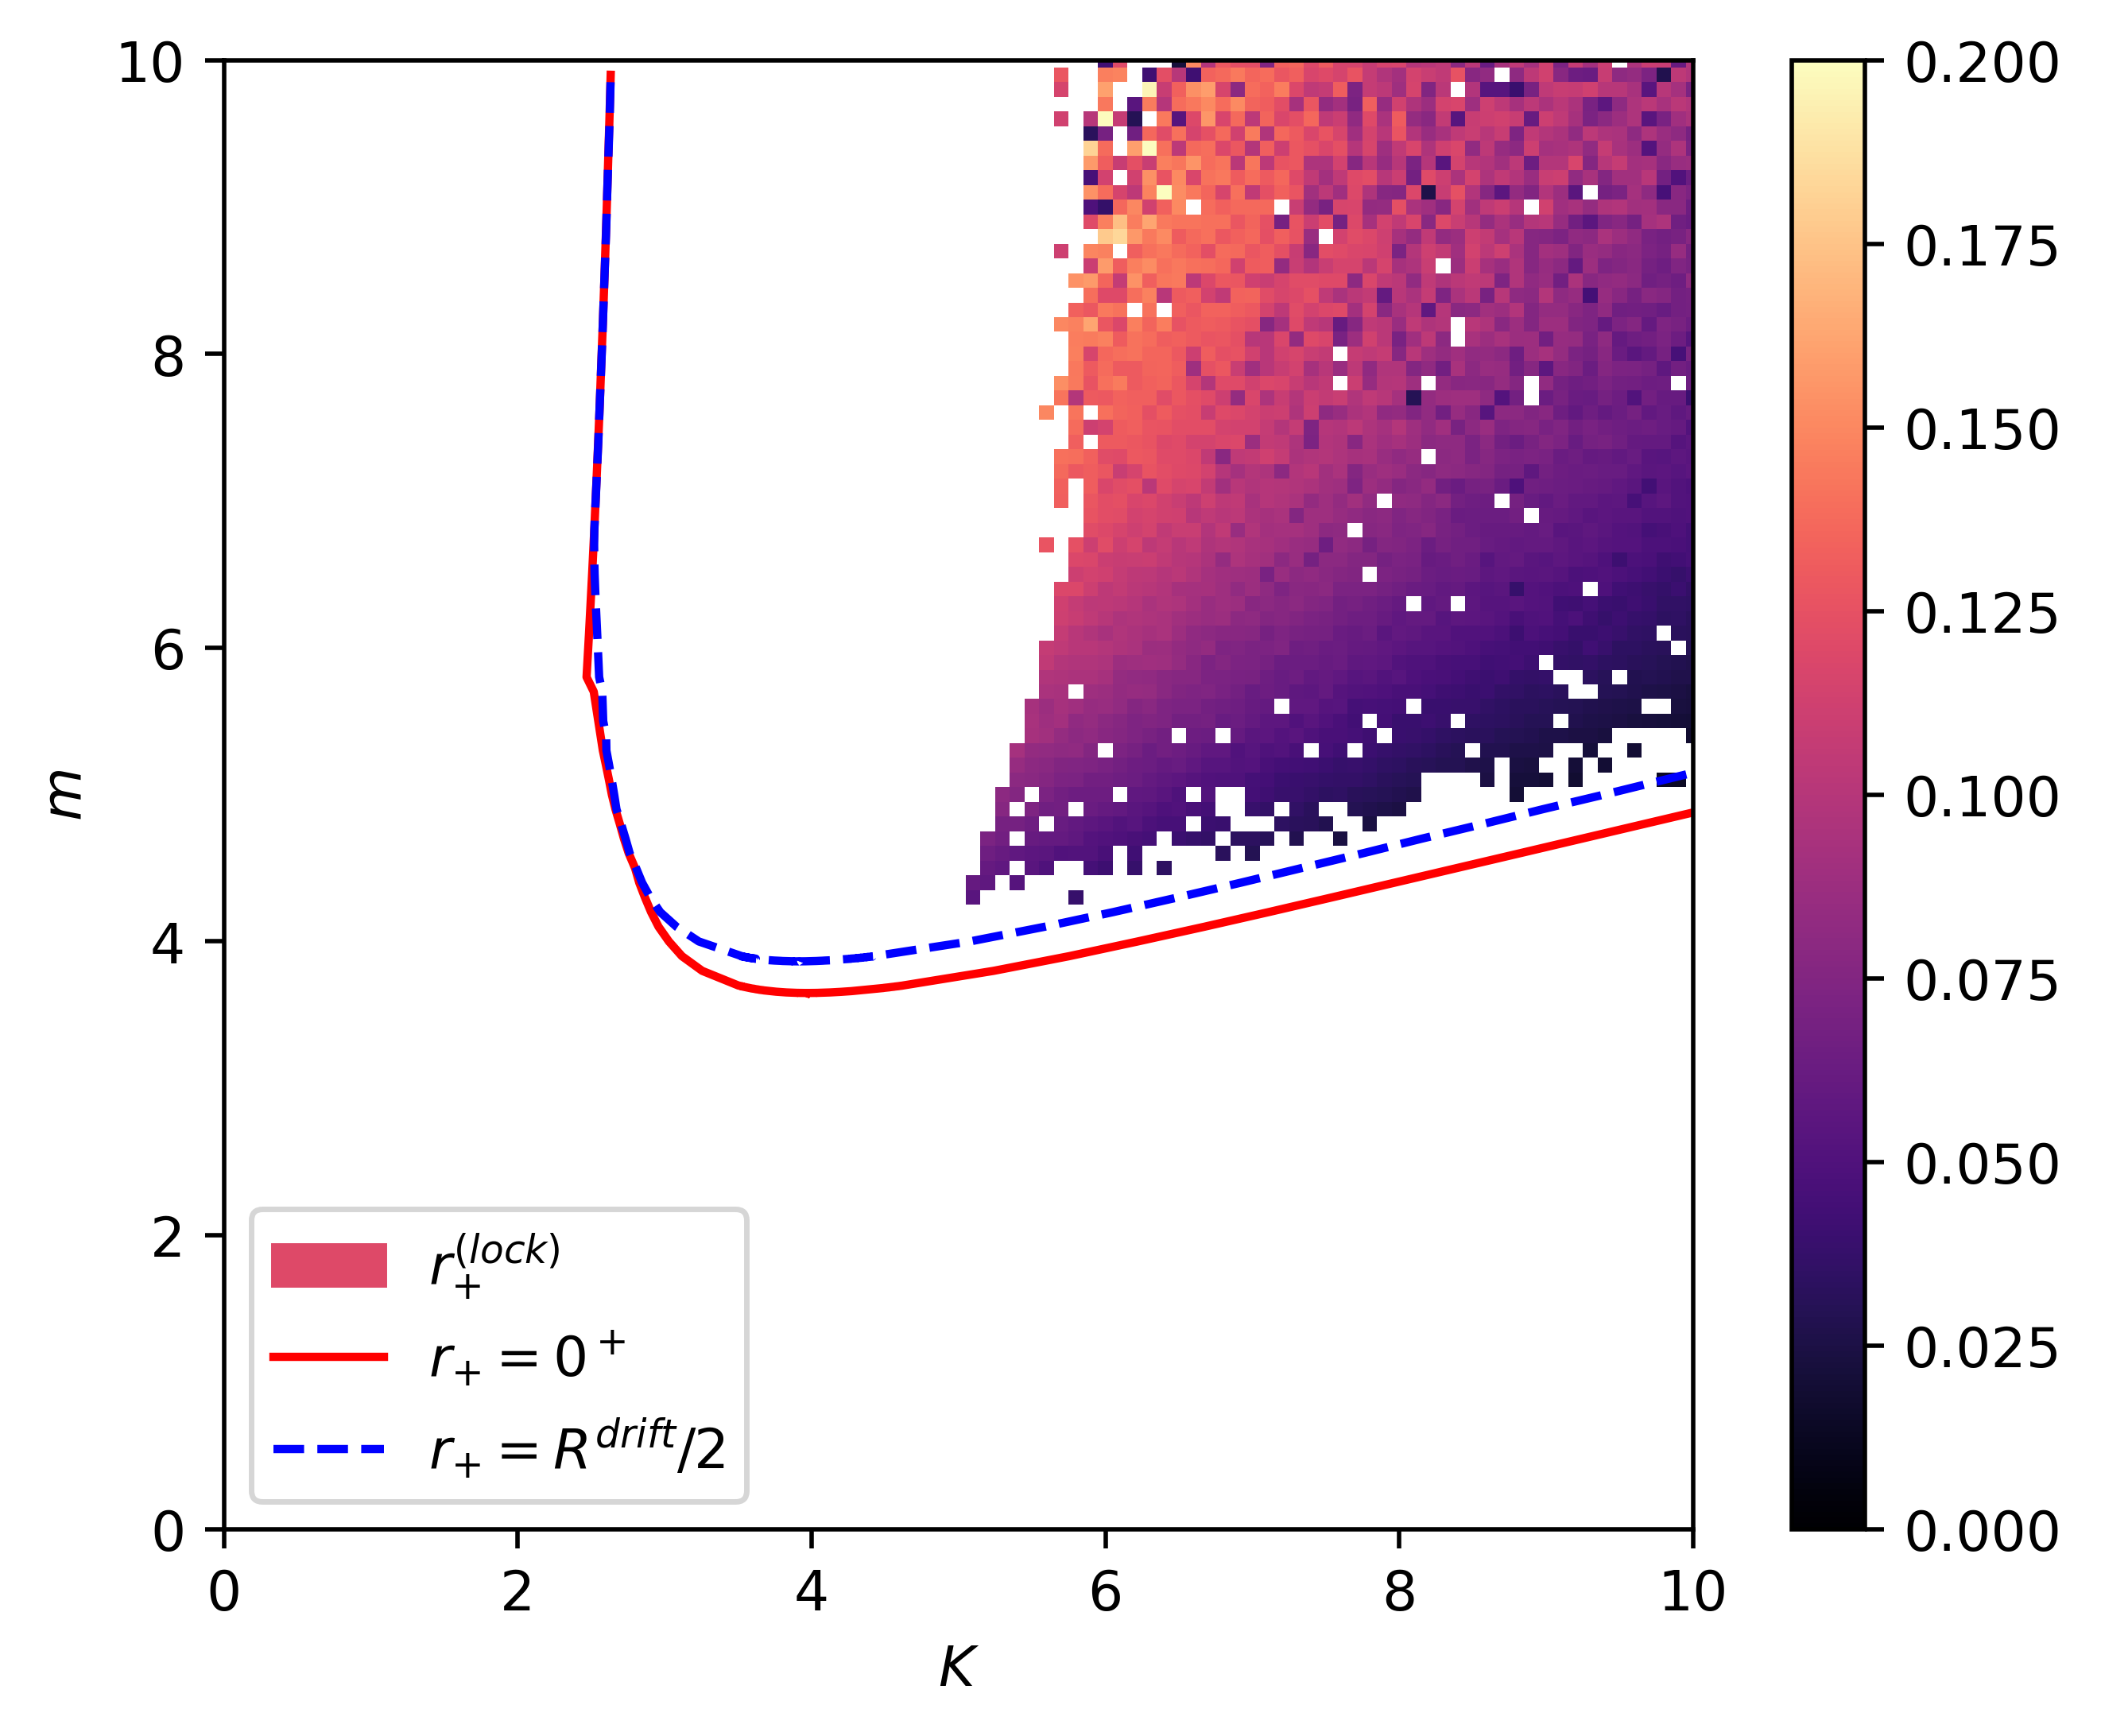

In [172]:
plt.figure(dpi=500)
plt.pcolormesh(KK,MM,NRP,cmap='magma',vmin=0,vmax=0.2)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
plt.gca().set_aspect('equal')
cmap = cm.get_cmap('magma')
color_middle = cmap(0.6)  # colormap에서 중간색 선택

patch = mpatches.Patch(color=color_middle, label=r'$r_{+}^{(lock)}$')

# legend에 라인 + patch 같이 넣기
plt.legend(handles=[patch] + plt.gca().get_legend_handles_labels()[0],loc=3)
plt.colorbar()
plt.show()

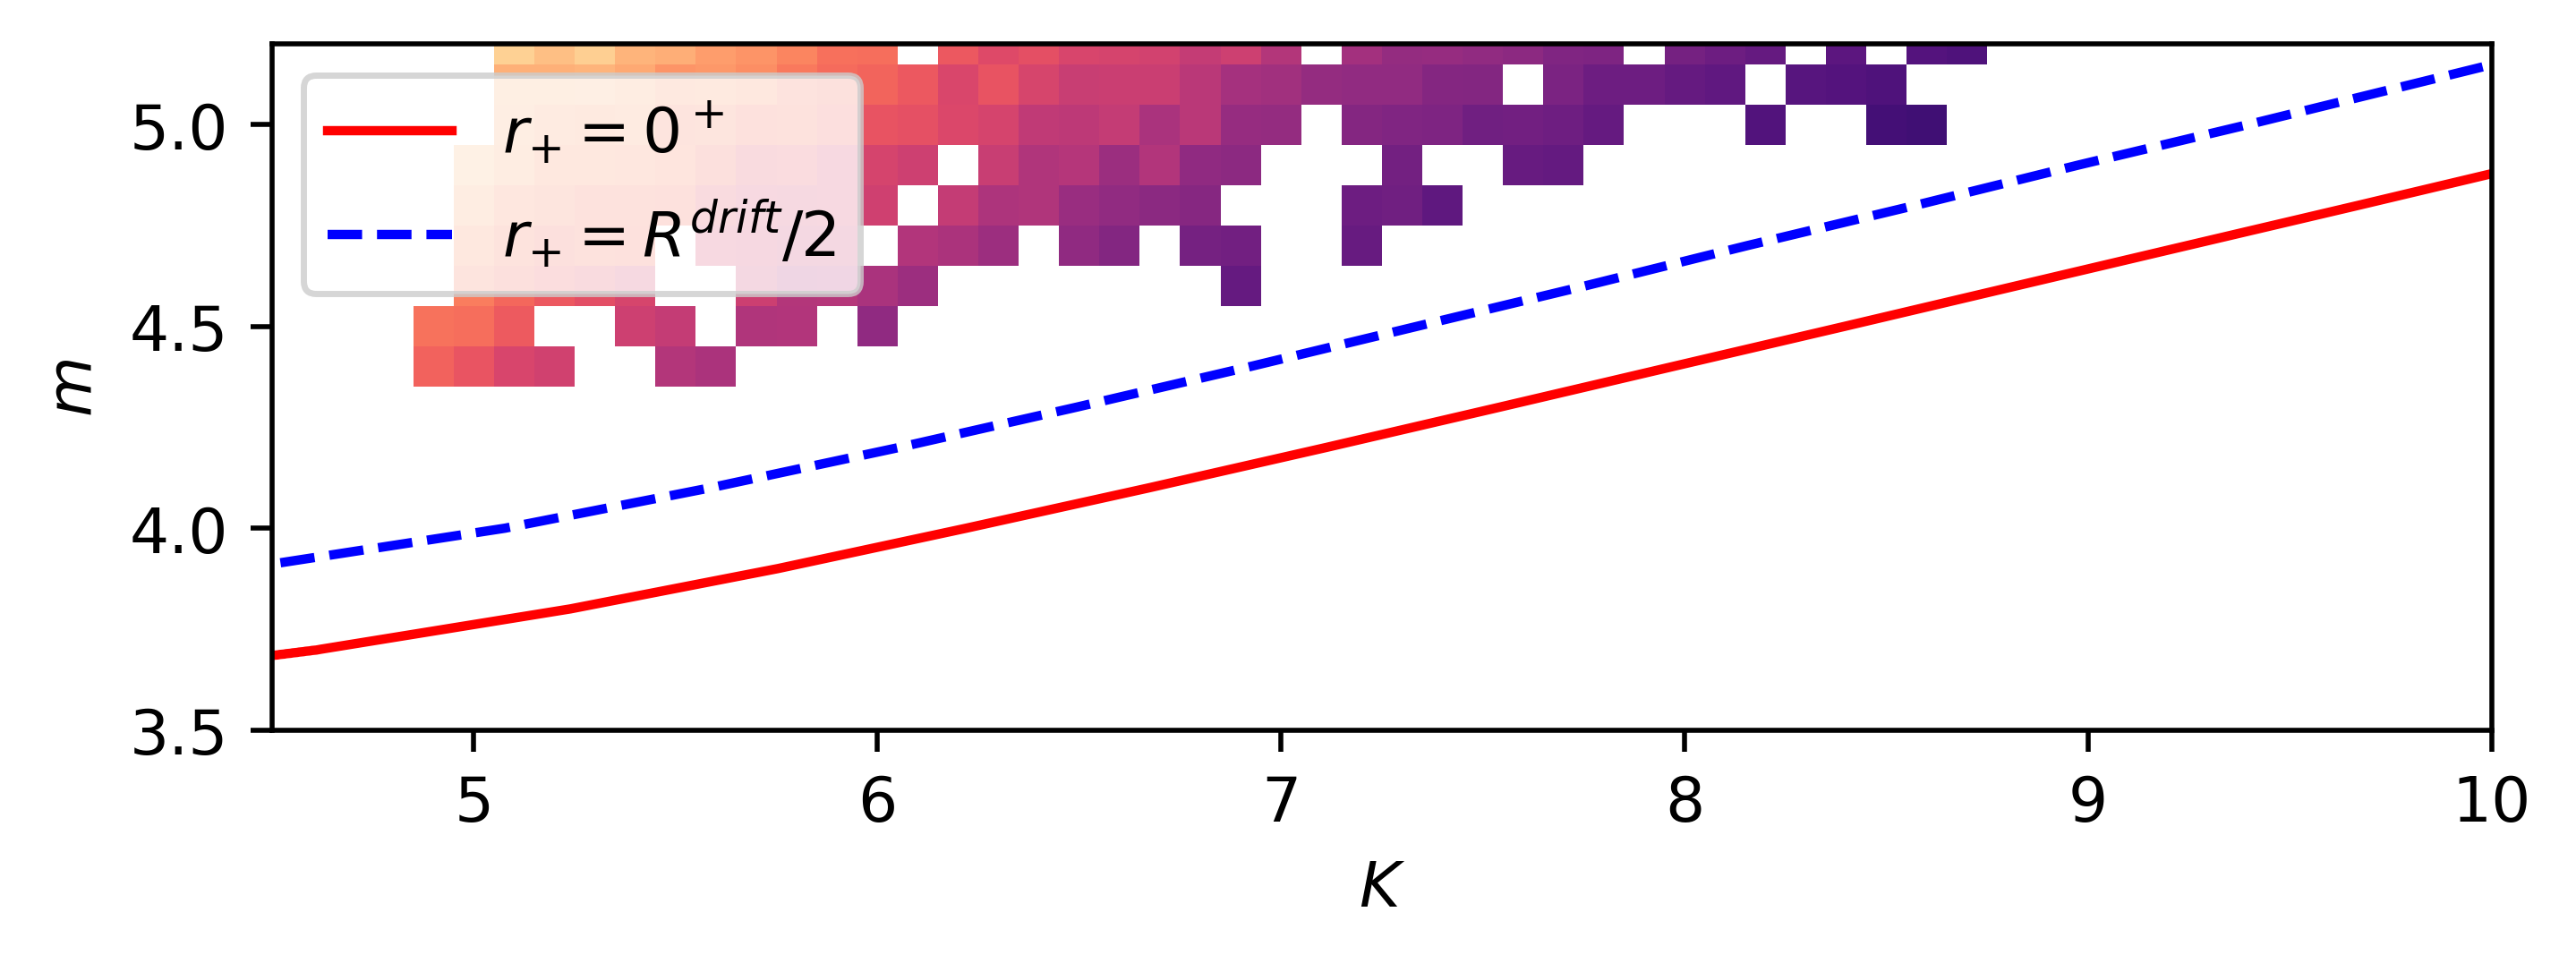

In [153]:
plt.figure(dpi=500)
plt.pcolormesh(KK,MM,NRP,cmap='magma',vmin=0,vmax=0.1)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
plt.xlim(4.5,10)
plt.ylim(3.5,5.2)
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
plt.gca().set_aspect('equal')
plt.legend()
# plt.colorbar()
plt.show()

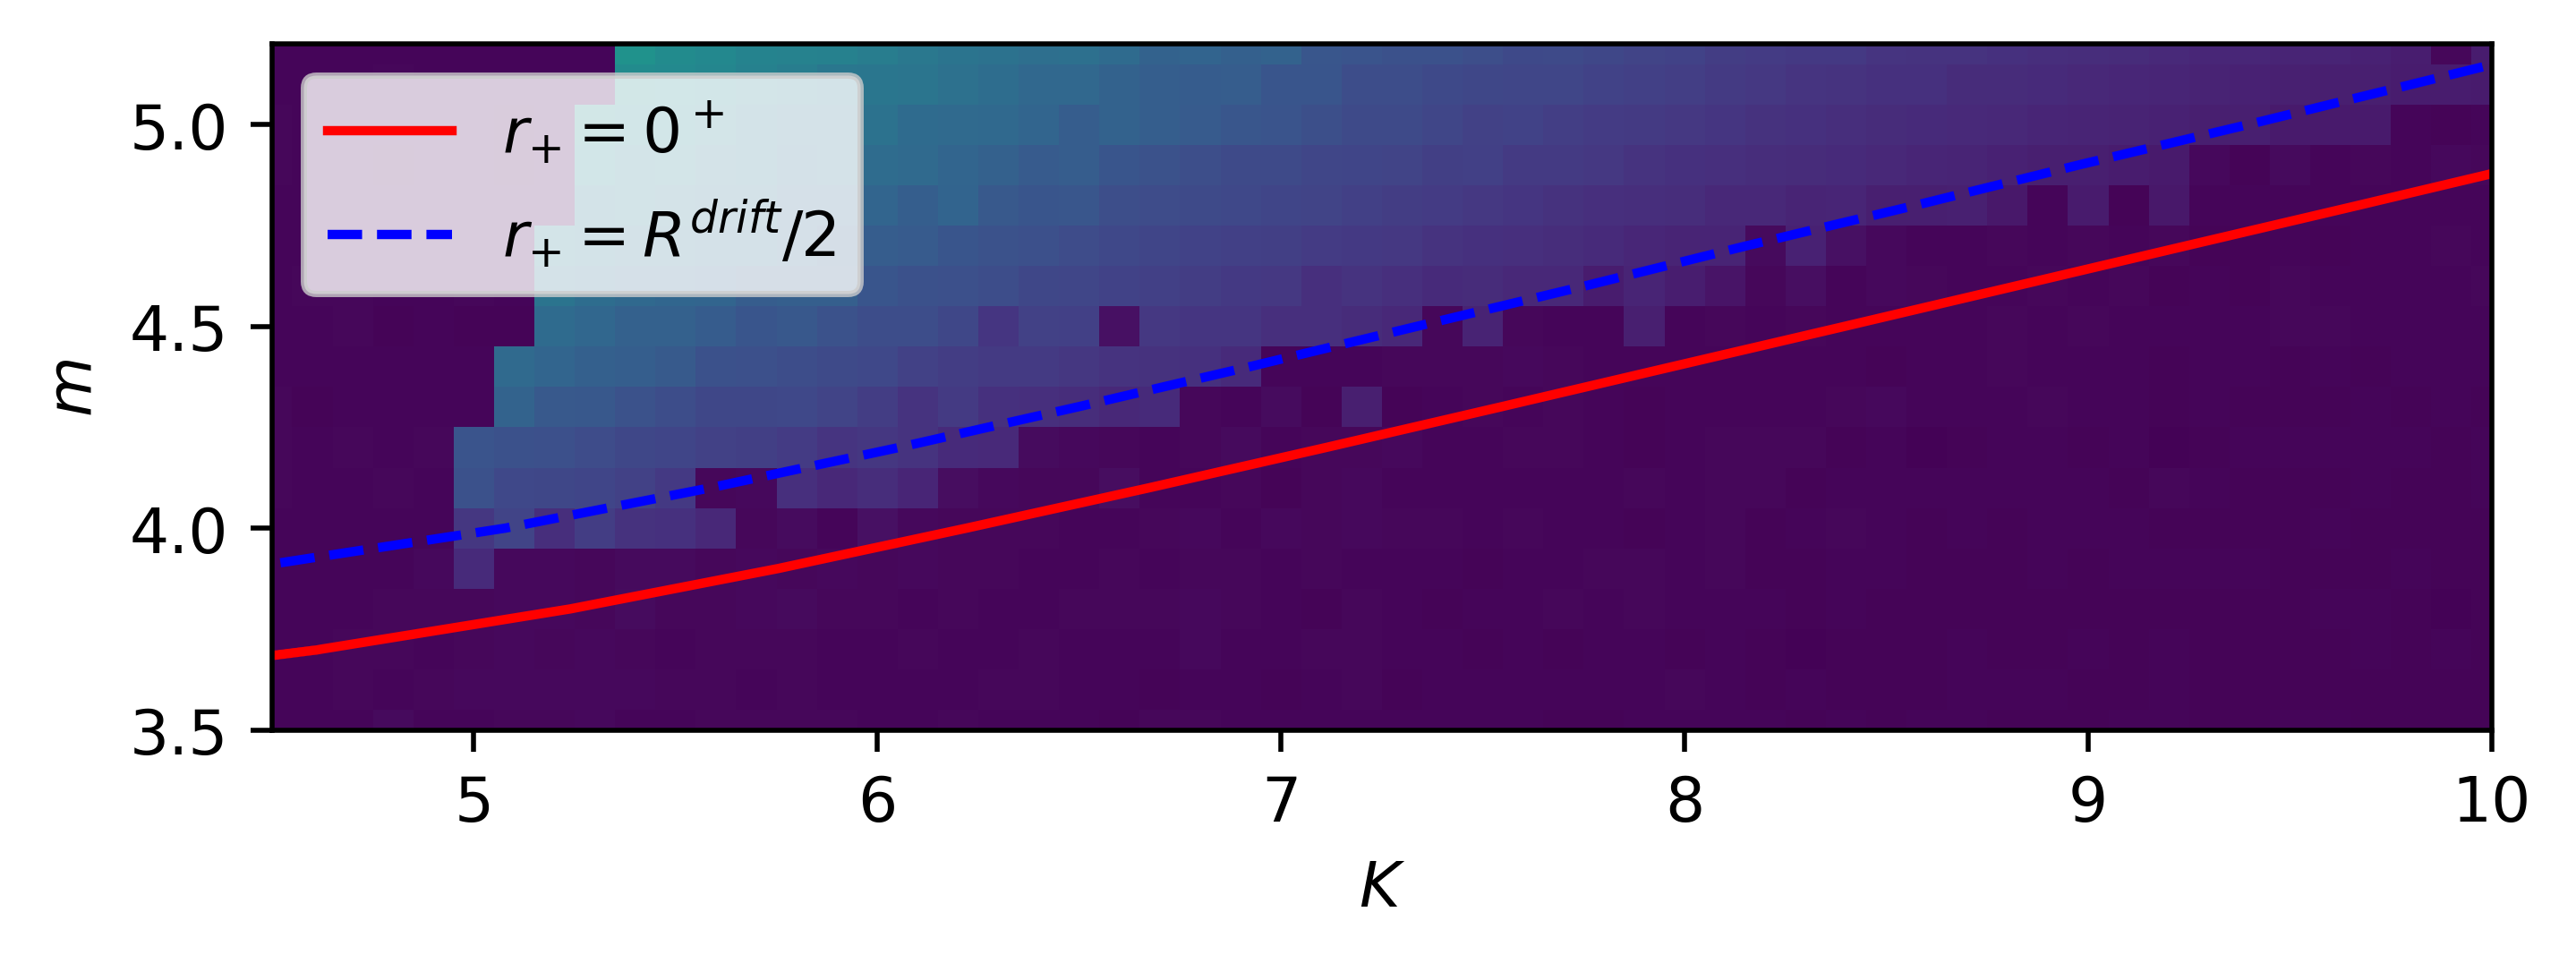

In [142]:
plt.figure(dpi=500)
plt.pcolormesh(KK,MM,NSIG_S)
plt.plot(K_rp0d,ms_rp0,'r-',label=r'$r_{+}=0^+$')
plt.plot(K_rp0u,ms_rp0,'r-')

plt.plot(K_rpdhd,ms_rpdh,'b--',label=r'$r_{+}=R^{drift}/2$')
plt.plot(K_rpdhu,ms_rpdh,'b--')
plt.xlim(4.5,10)
plt.ylim(3.5,5.2)
plt.xlabel(r'$K$')
plt.ylabel(r'$m$')
plt.gca().set_aspect('equal')
plt.legend()
# plt.colorbar()
plt.show()

In [177]:
RPl

NameError: name 'RPl' is not defined

Text(0, 0.5, '$r_{+,lock,sim}$')

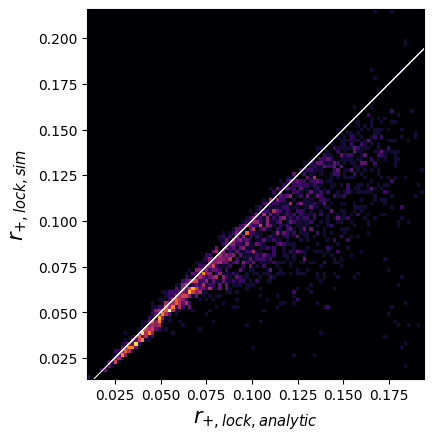

In [179]:
# Filter out NaN values from A_RPU and RP
valid_indices = ~np.isnan(RPl.flatten()) & ~np.isnan(NRP.flatten())
filtered_A_RPU = RPl.flatten()[valid_indices]
filtered_RP = NRP.flatten()[valid_indices]

# Plot the 2D histogram
plt.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')
# Plot the diagonal line
plt.plot(filtered_RP, filtered_RP, lw=0.5, c='w')
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('$r_{+,lock,analytic}$',fontsize=15)
plt.ylabel('$r_{+,lock,sim}$',fontsize=15)

Text(0, 0.5, '$r_{+,lock,sim}$')

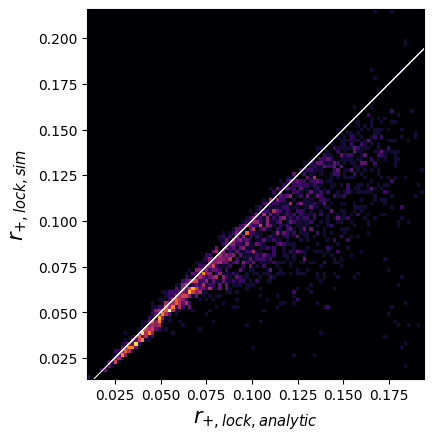

In [195]:
# Filter out NaN values from A_RPU and RP
valid_indices = ~np.isnan(RPl) & ~np.isnan(NRP)
filtered_A_RPU = RPl[valid_indices]
filtered_RP = NRP[valid_indices]

# Plot the 2D histogram
plt.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')
# Plot the diagonal line
plt.plot(filtered_RP, filtered_RP, lw=0.5, c='w')
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('$r_{+,lock,analytic}$',fontsize=15)
plt.ylabel('$r_{+,lock,sim}$',fontsize=15)

Text(0.5, 0, '$\\sigma_{t,analytic}$')

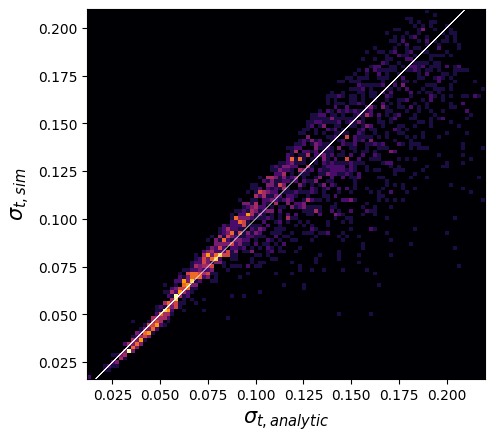

In [196]:
# Filter out NaN values from A_RPU and RP
# valid_indices = ~np.isnan(sig_r) & ~np.isnan(NSIG_S)
filtered_A_RPU = sig_r[valid_indices]
filtered_RP = NSIG_S[valid_indices]

# Plot the 2D histogram
plt.hist2d(filtered_A_RPU, filtered_RP, bins=100, cmap='inferno')
# Plot the diagonal line
plt.plot(filtered_RP, filtered_RP, lw=0.5, c='w')
plt.gca().set_aspect('equal', adjustable='box')

plt.ylabel('$\sigma_{t,sim}$',fontsize=15)
plt.xlabel('$\sigma_{t,analytic}$',fontsize=15)

In [199]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]
nan_corrcoef(sig_r[valid_indices], NSIG_S[valid_indices])

0.9019726793591636

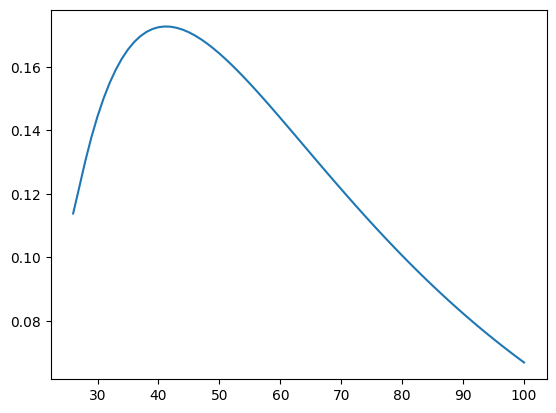

In [37]:
plt.plot(sig_r[70,:])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


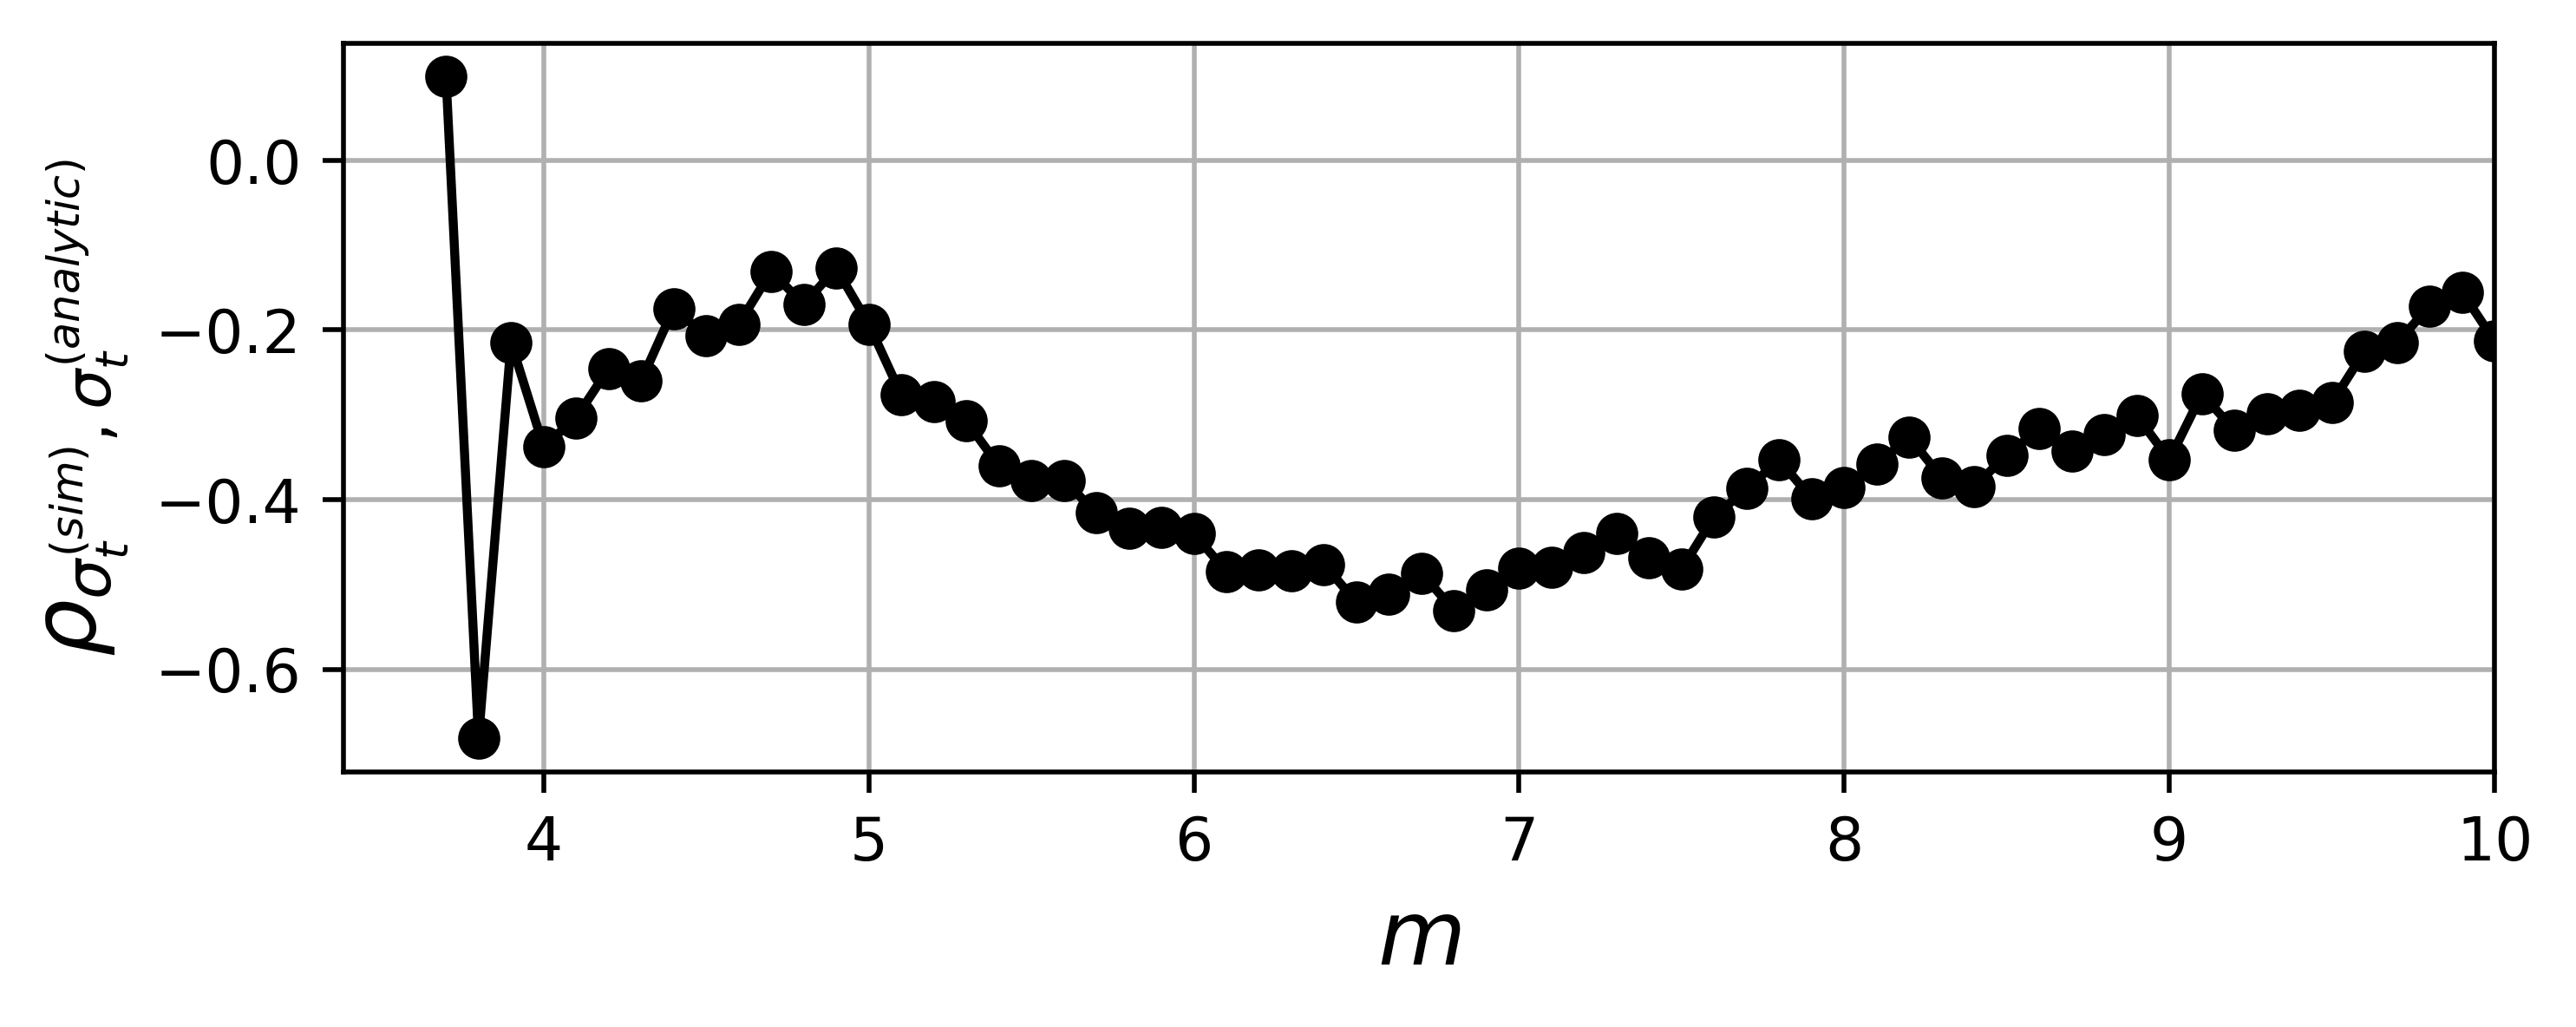

In [41]:
def nan_corrcoef(a,b):
    a = a.flatten()
    b = b.flatten()
    nan_idx1 = np.isnan(a)
    nan_idx2 = np.isnan(b)
    nan_idx = nan_idx1 | nan_idx2
    a = a[~nan_idx]
    b = b[~nan_idx]
    return np.corrcoef(a,b)[0,1]

# S = np.where(valid_indices,sig_r,np.nan)
# NS = np.where(valid_indices,NSIG_S,np.nan)

S = sig_r
NS = NSIG_S
c_sigs = []
for i in range(0,101,1):
    c = nan_corrcoef(S[i,:], NS[i,:])
    c_sigs.append(c)
c_sigs = np.array(c_sigs)
plt.figure(dpi=500)
plt.subplot(211)
plt.plot(np.linspace(0,10,101),c_sigs,'ko-')
plt.xlabel('$m$',fontsize=15)
plt.ylabel(r'$\rho_{\sigma_{t}^{(sim)},\sigma_{t}^{(analytic)}}$',fontsize=15)
# plt.ylim(0.5,1)
plt.xlim(right=10)
plt.grid()
plt.show()

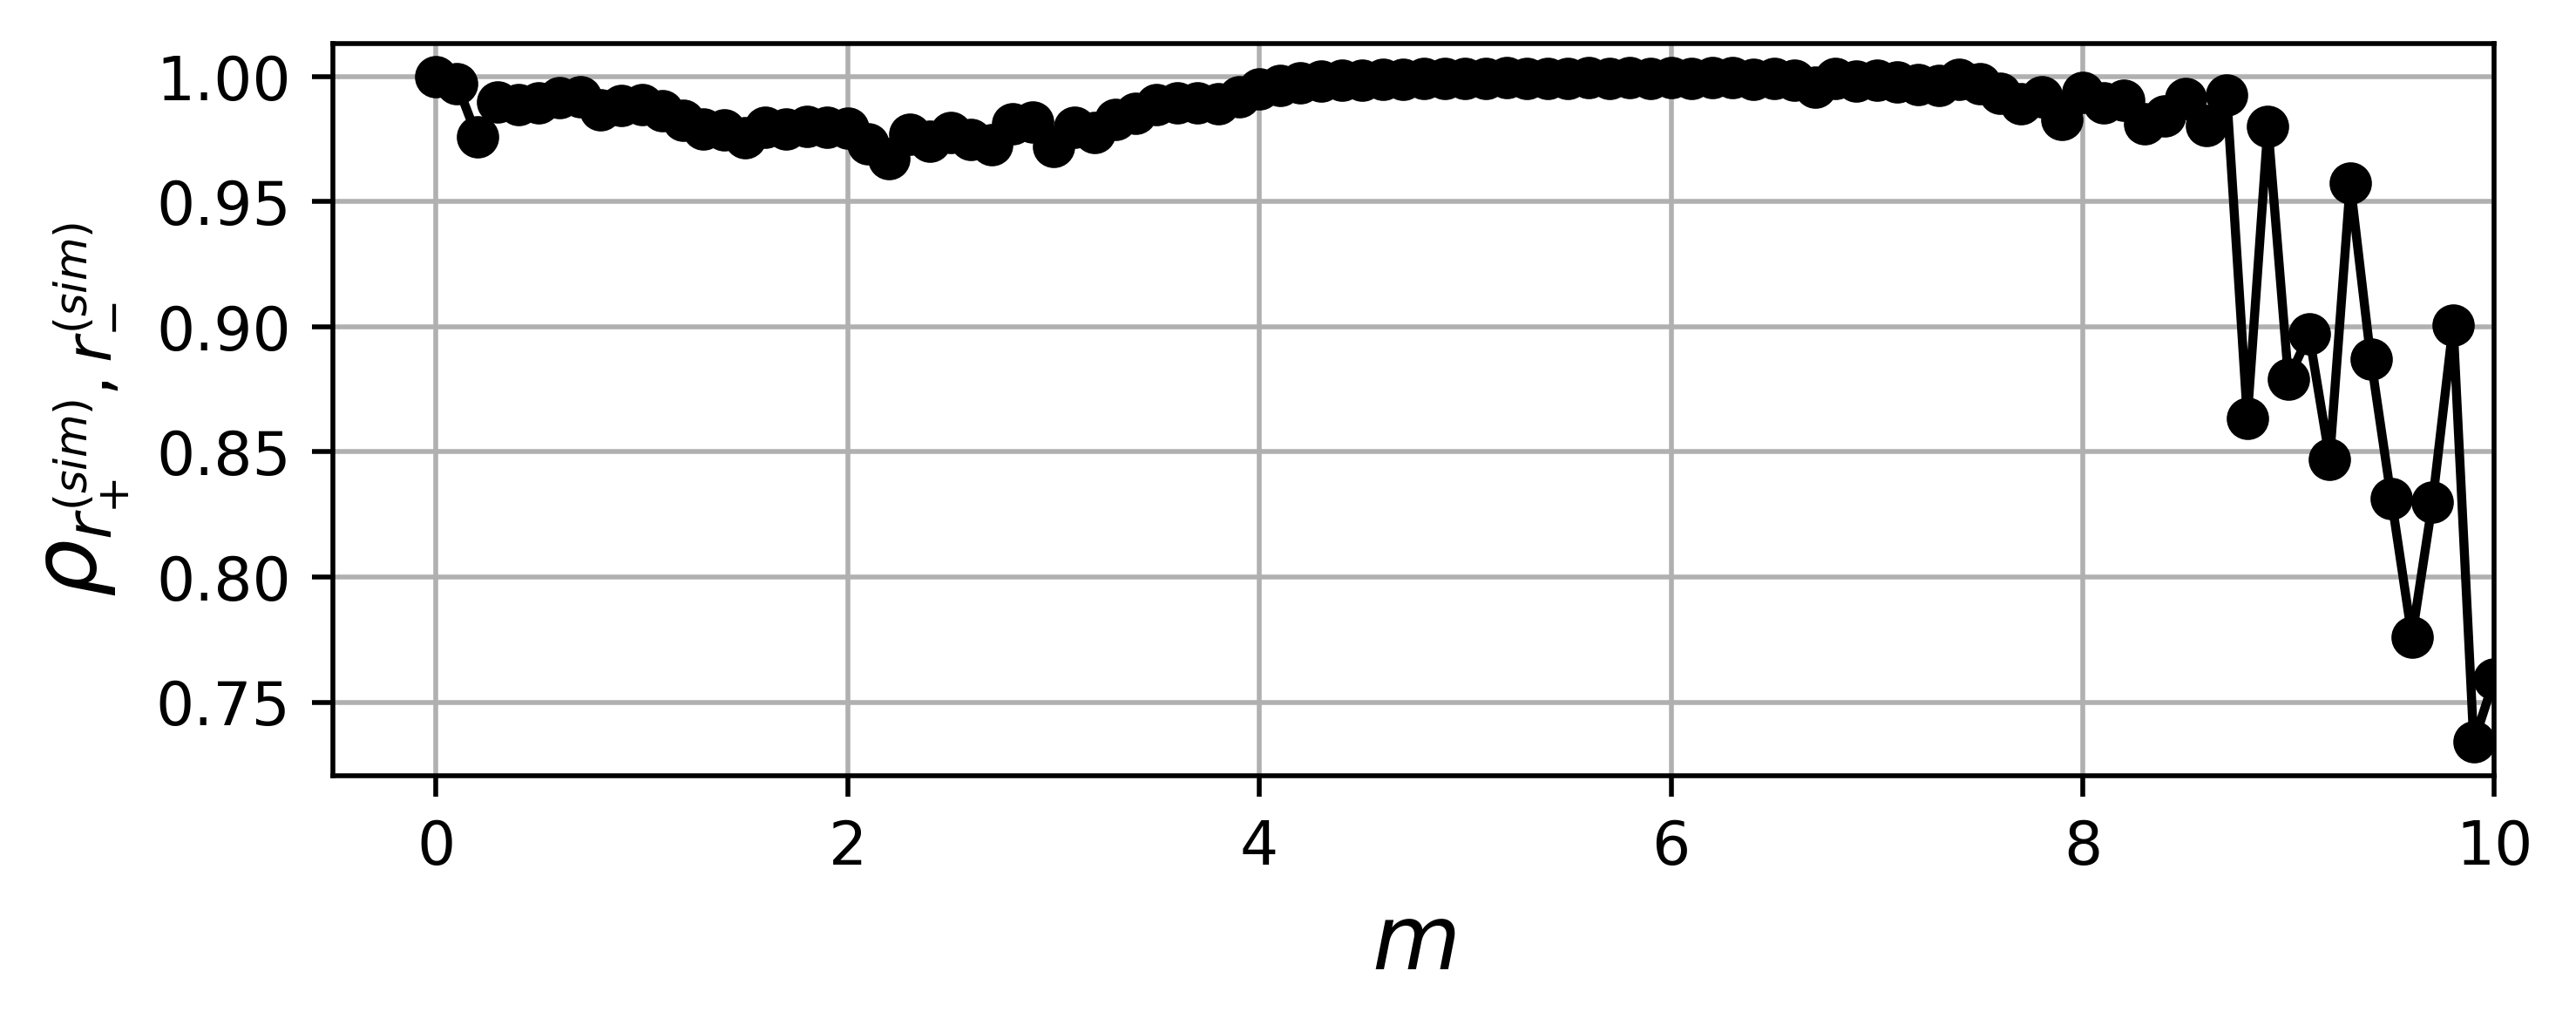

In [134]:
S = NRPT
NS = NRMT
c_sigs = []
for i in range(0,101,1):
    c = nan_corrcoef(S[i,:], NS[i,:])
    c_sigs.append(c)
c_sigs = np.array(c_sigs)
plt.figure(dpi=500)
plt.subplot(211)
plt.plot(np.linspace(0,10,101),c_sigs,'ko-')
plt.xlabel('$m$',fontsize=15)
plt.ylabel(r'$\rho_{r_{+}^{(sim)},r_{-}^{(sim)}}$',fontsize=15)
# plt.ylim(0.5,1)
plt.xlim(right=10)
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


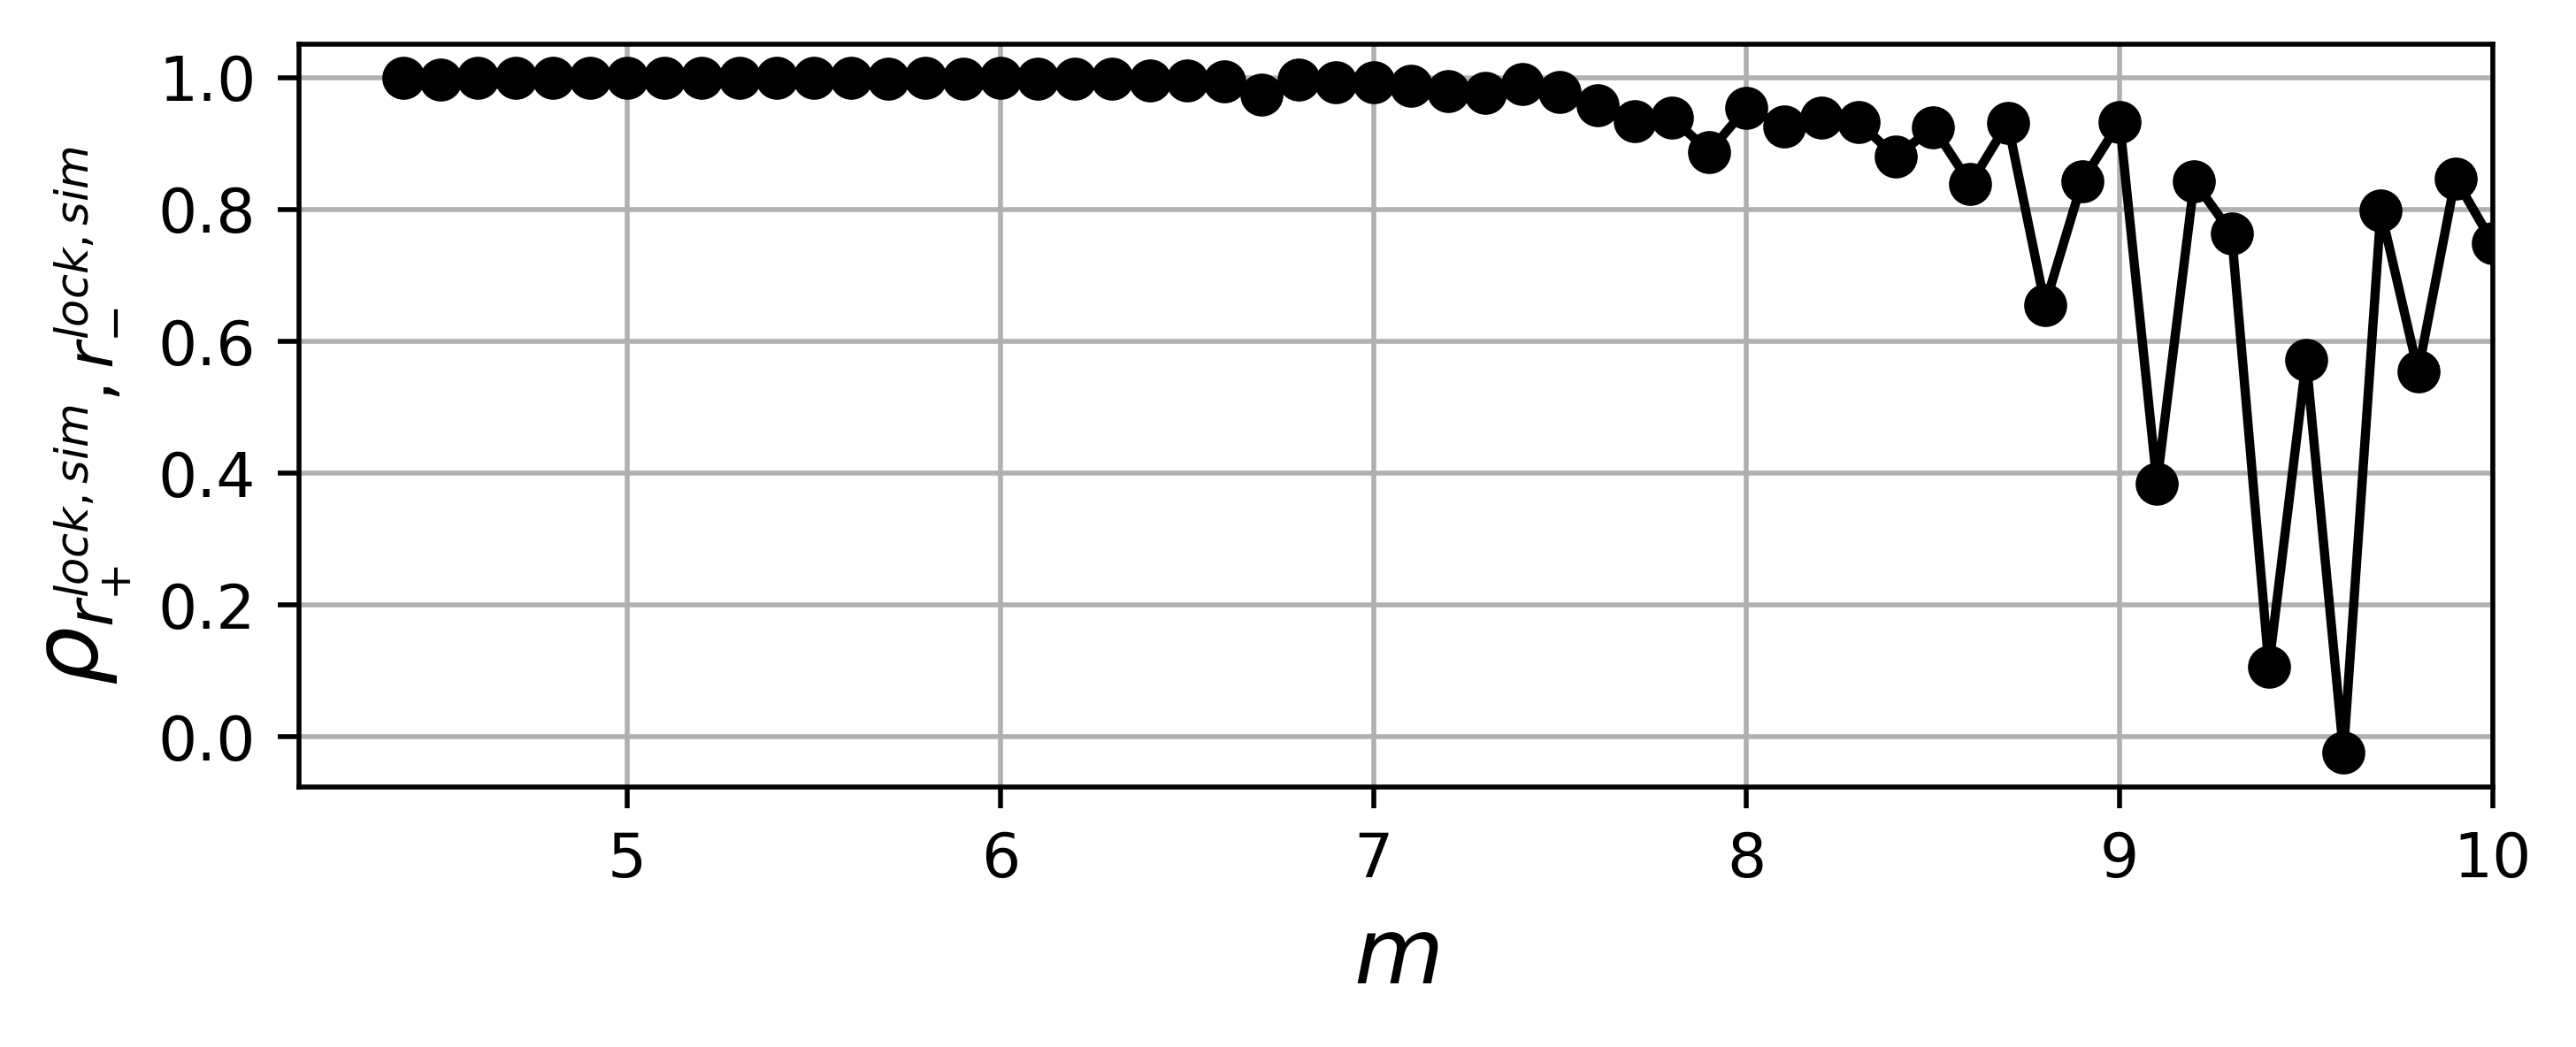

In [136]:
S = NRP
NS = NRM
c_sigs = []
for i in range(0,101,1):
    c = nan_corrcoef(S[i,:], NS[i,:])
    c_sigs.append(c)
c_sigs = np.array(c_sigs)
plt.figure(dpi=500)
plt.subplot(211)
plt.plot(np.linspace(0,10,101),c_sigs,'ko-')
plt.xlabel('$m$',fontsize=15)
plt.ylabel(r'$\rho_{r_{+}^{lock,sim},r_{-}^{lock,sim}}$',fontsize=15)
# plt.ylim(0.5,1)
plt.xlim(right=10)
plt.grid()
plt.show()

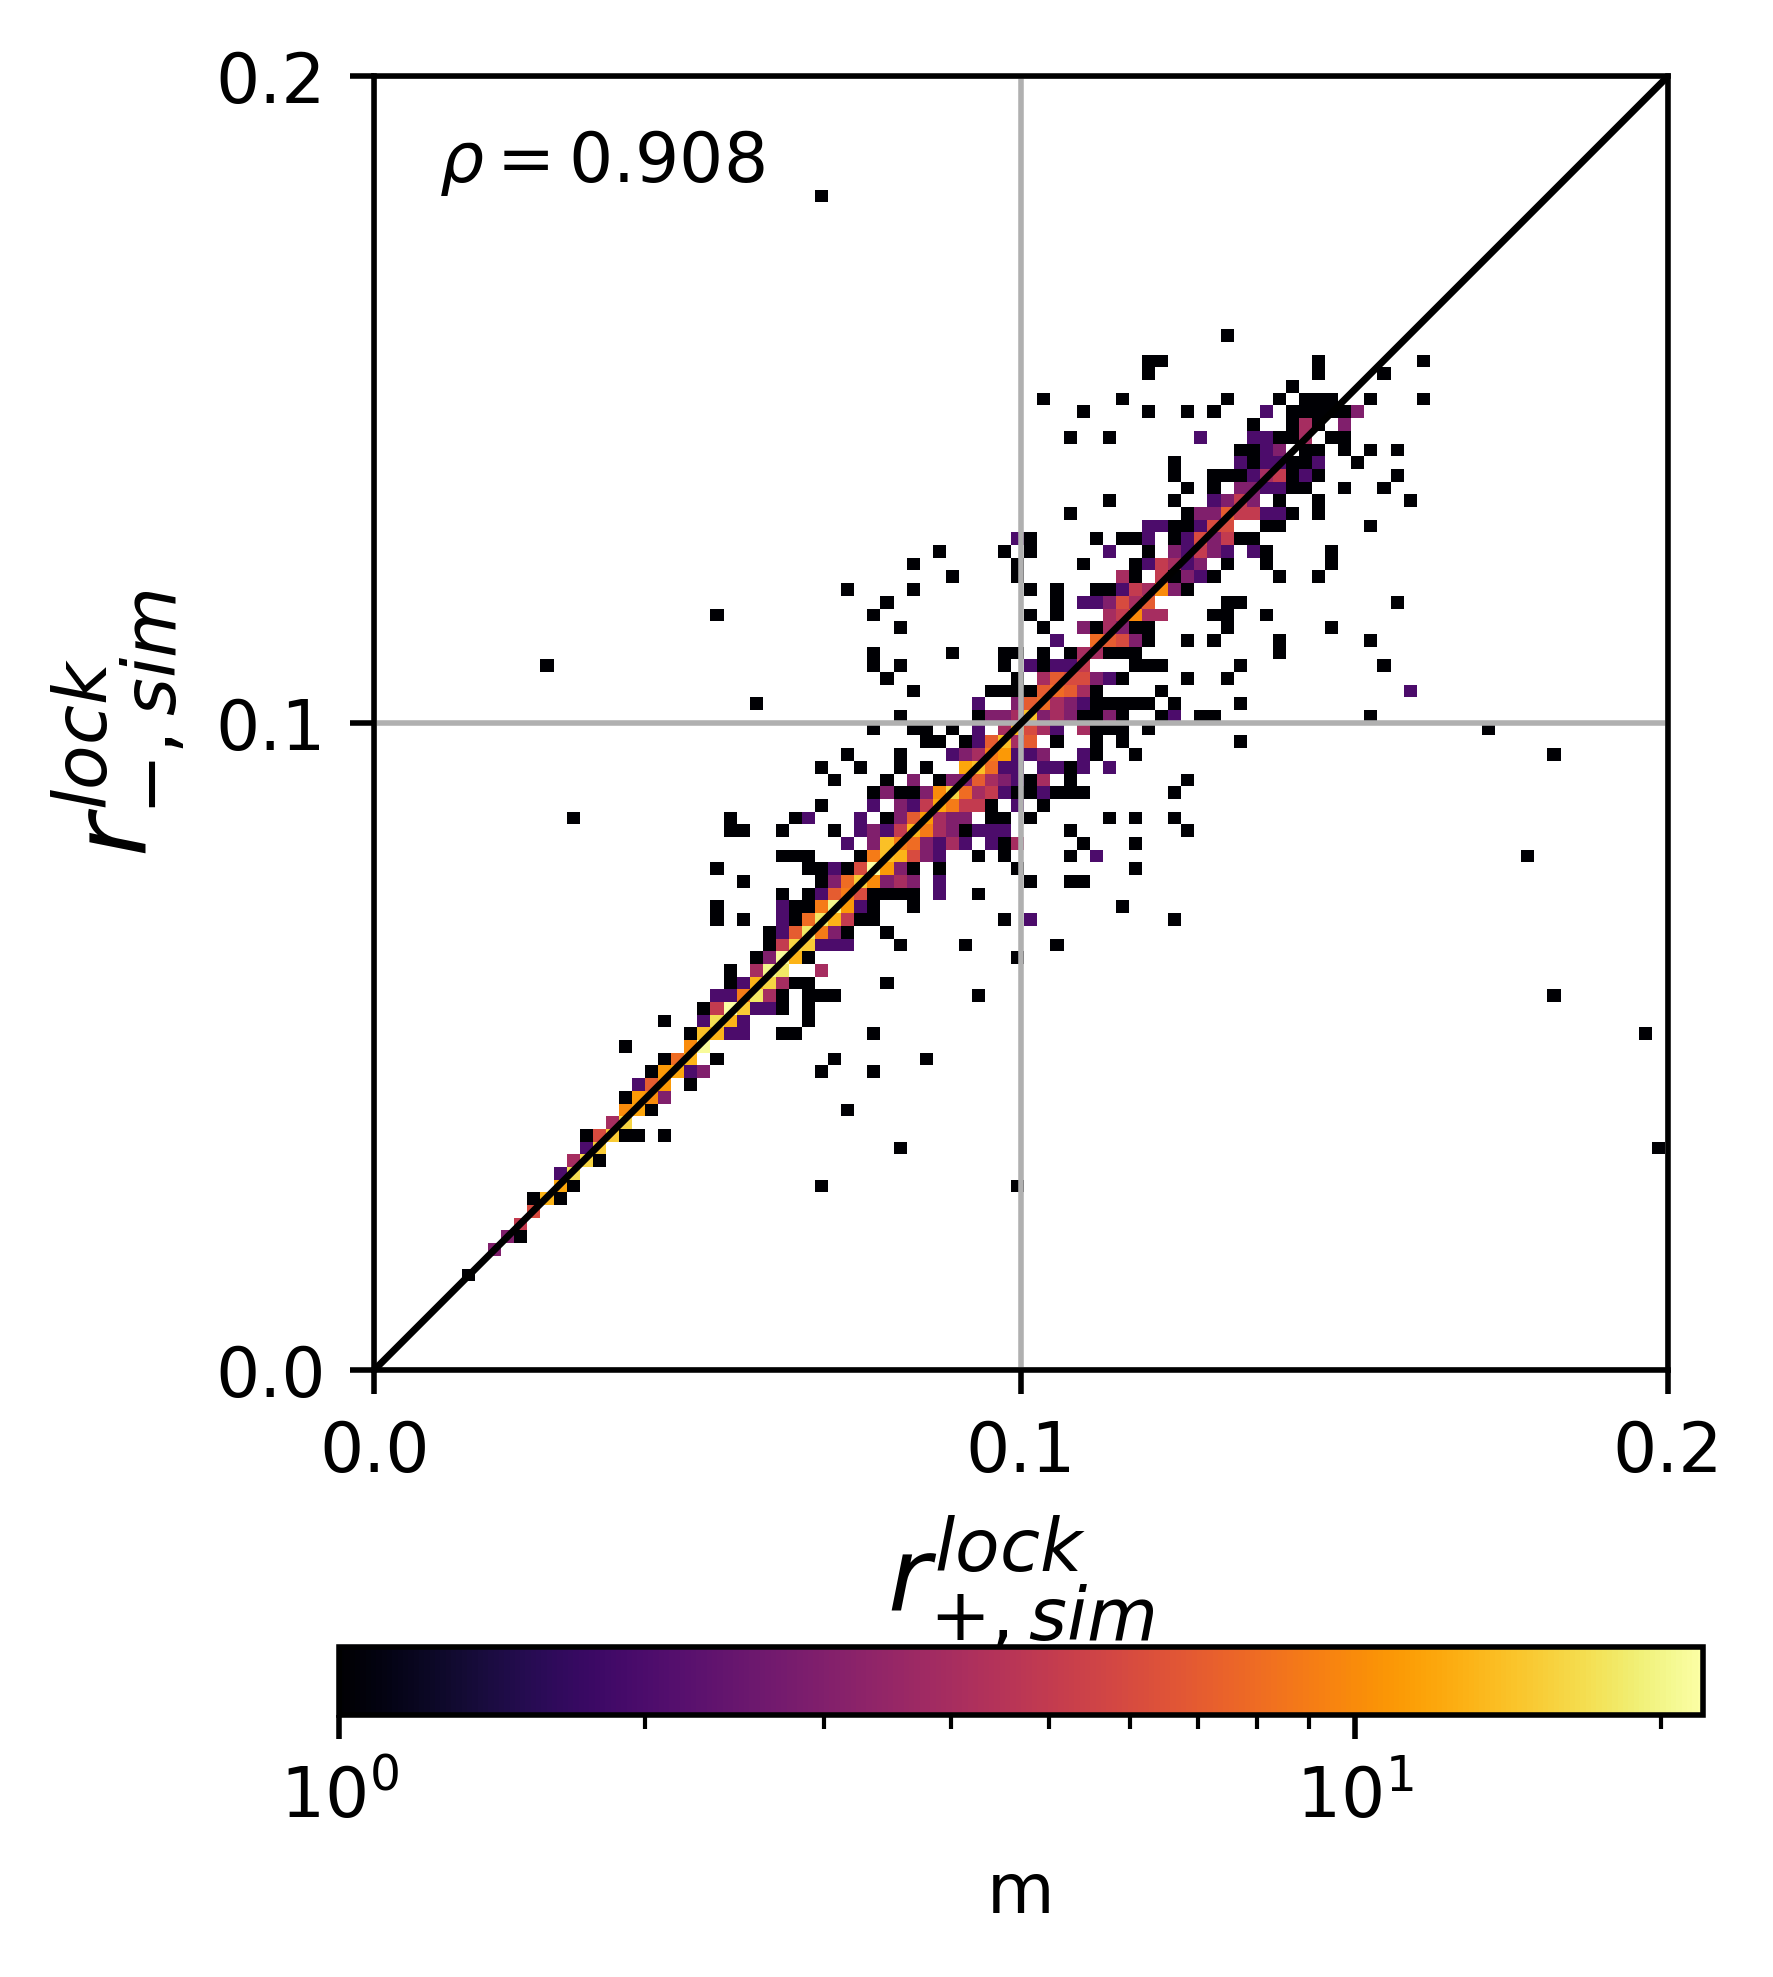

In [157]:
from matplotlib.colors import LogNorm
plt.figure(dpi=500)
# plt.scatter(NRPT,NRMT,s=1,c=MM,alpha=0.7,cmap='tab20b')
slice = np.isnan(NRP) | np.isnan(NRM)
plt.hist2d(NRP[~slice].flatten(),NRM[~slice].flatten(),bins=100,cmap='inferno',norm=LogNorm())

l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(NRP,NRM)
plt.text(0.05,0.96,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top',bbox=dict(facecolor='w', alpha=1,linewidth=0,pad=1))
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$r_{-,sim}^{lock}$',fontsize=15)
plt.xlabel(r'$r_{+,sim}^{lock}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal',shrink=0.55)
plt.grid()



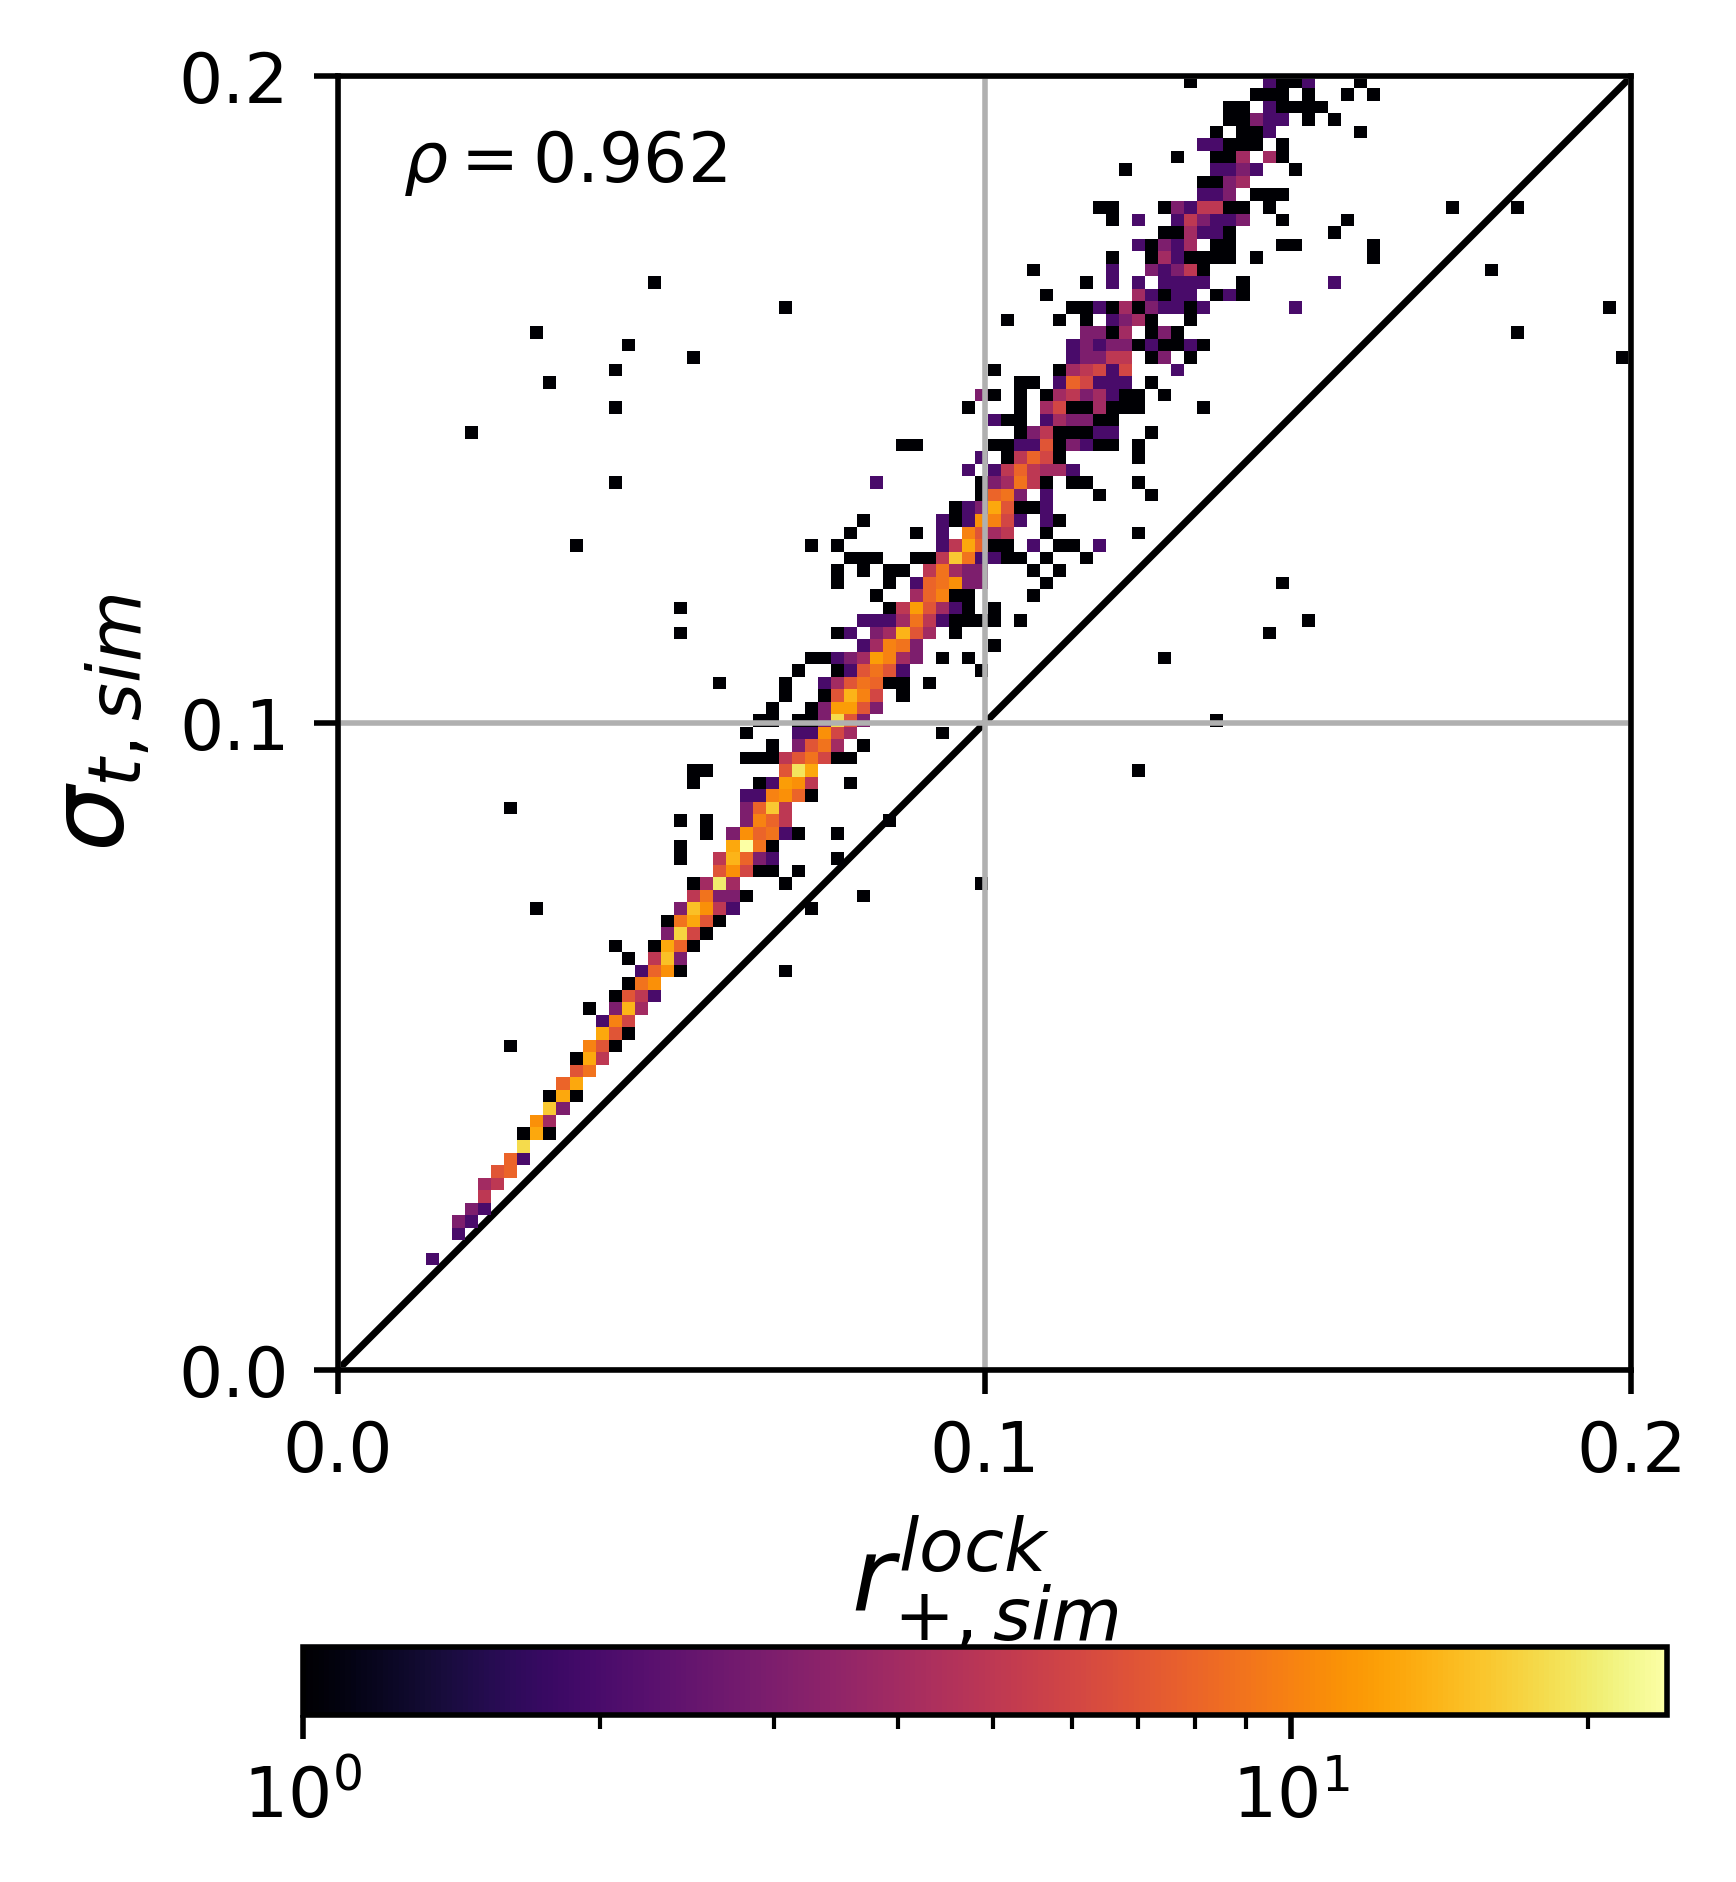

In [159]:
from matplotlib.colors import LogNorm
plt.figure(dpi=500)
# plt.scatter(NRPT,NRMT,s=1,c=MM,alpha=0.7,cmap='tab20b')
slice = np.isnan(NRP) | np.isnan(NSIG_S)
plt.hist2d(NRP[~slice].flatten(),NSIG_S[~slice].flatten(),bins=100,cmap='inferno',norm=LogNorm())

l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(NRP[~slice],NSIG_S[~slice])
plt.text(0.05,0.96,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top',bbox=dict(facecolor='w', alpha=1,linewidth=0,pad=1))
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\sigma_{t,sim}$',fontsize=15)
plt.xlabel(r'$r_{+,sim}^{lock}$',fontsize=15)
plt.colorbar(orientation='horizontal',shrink=0.55)
plt.grid()



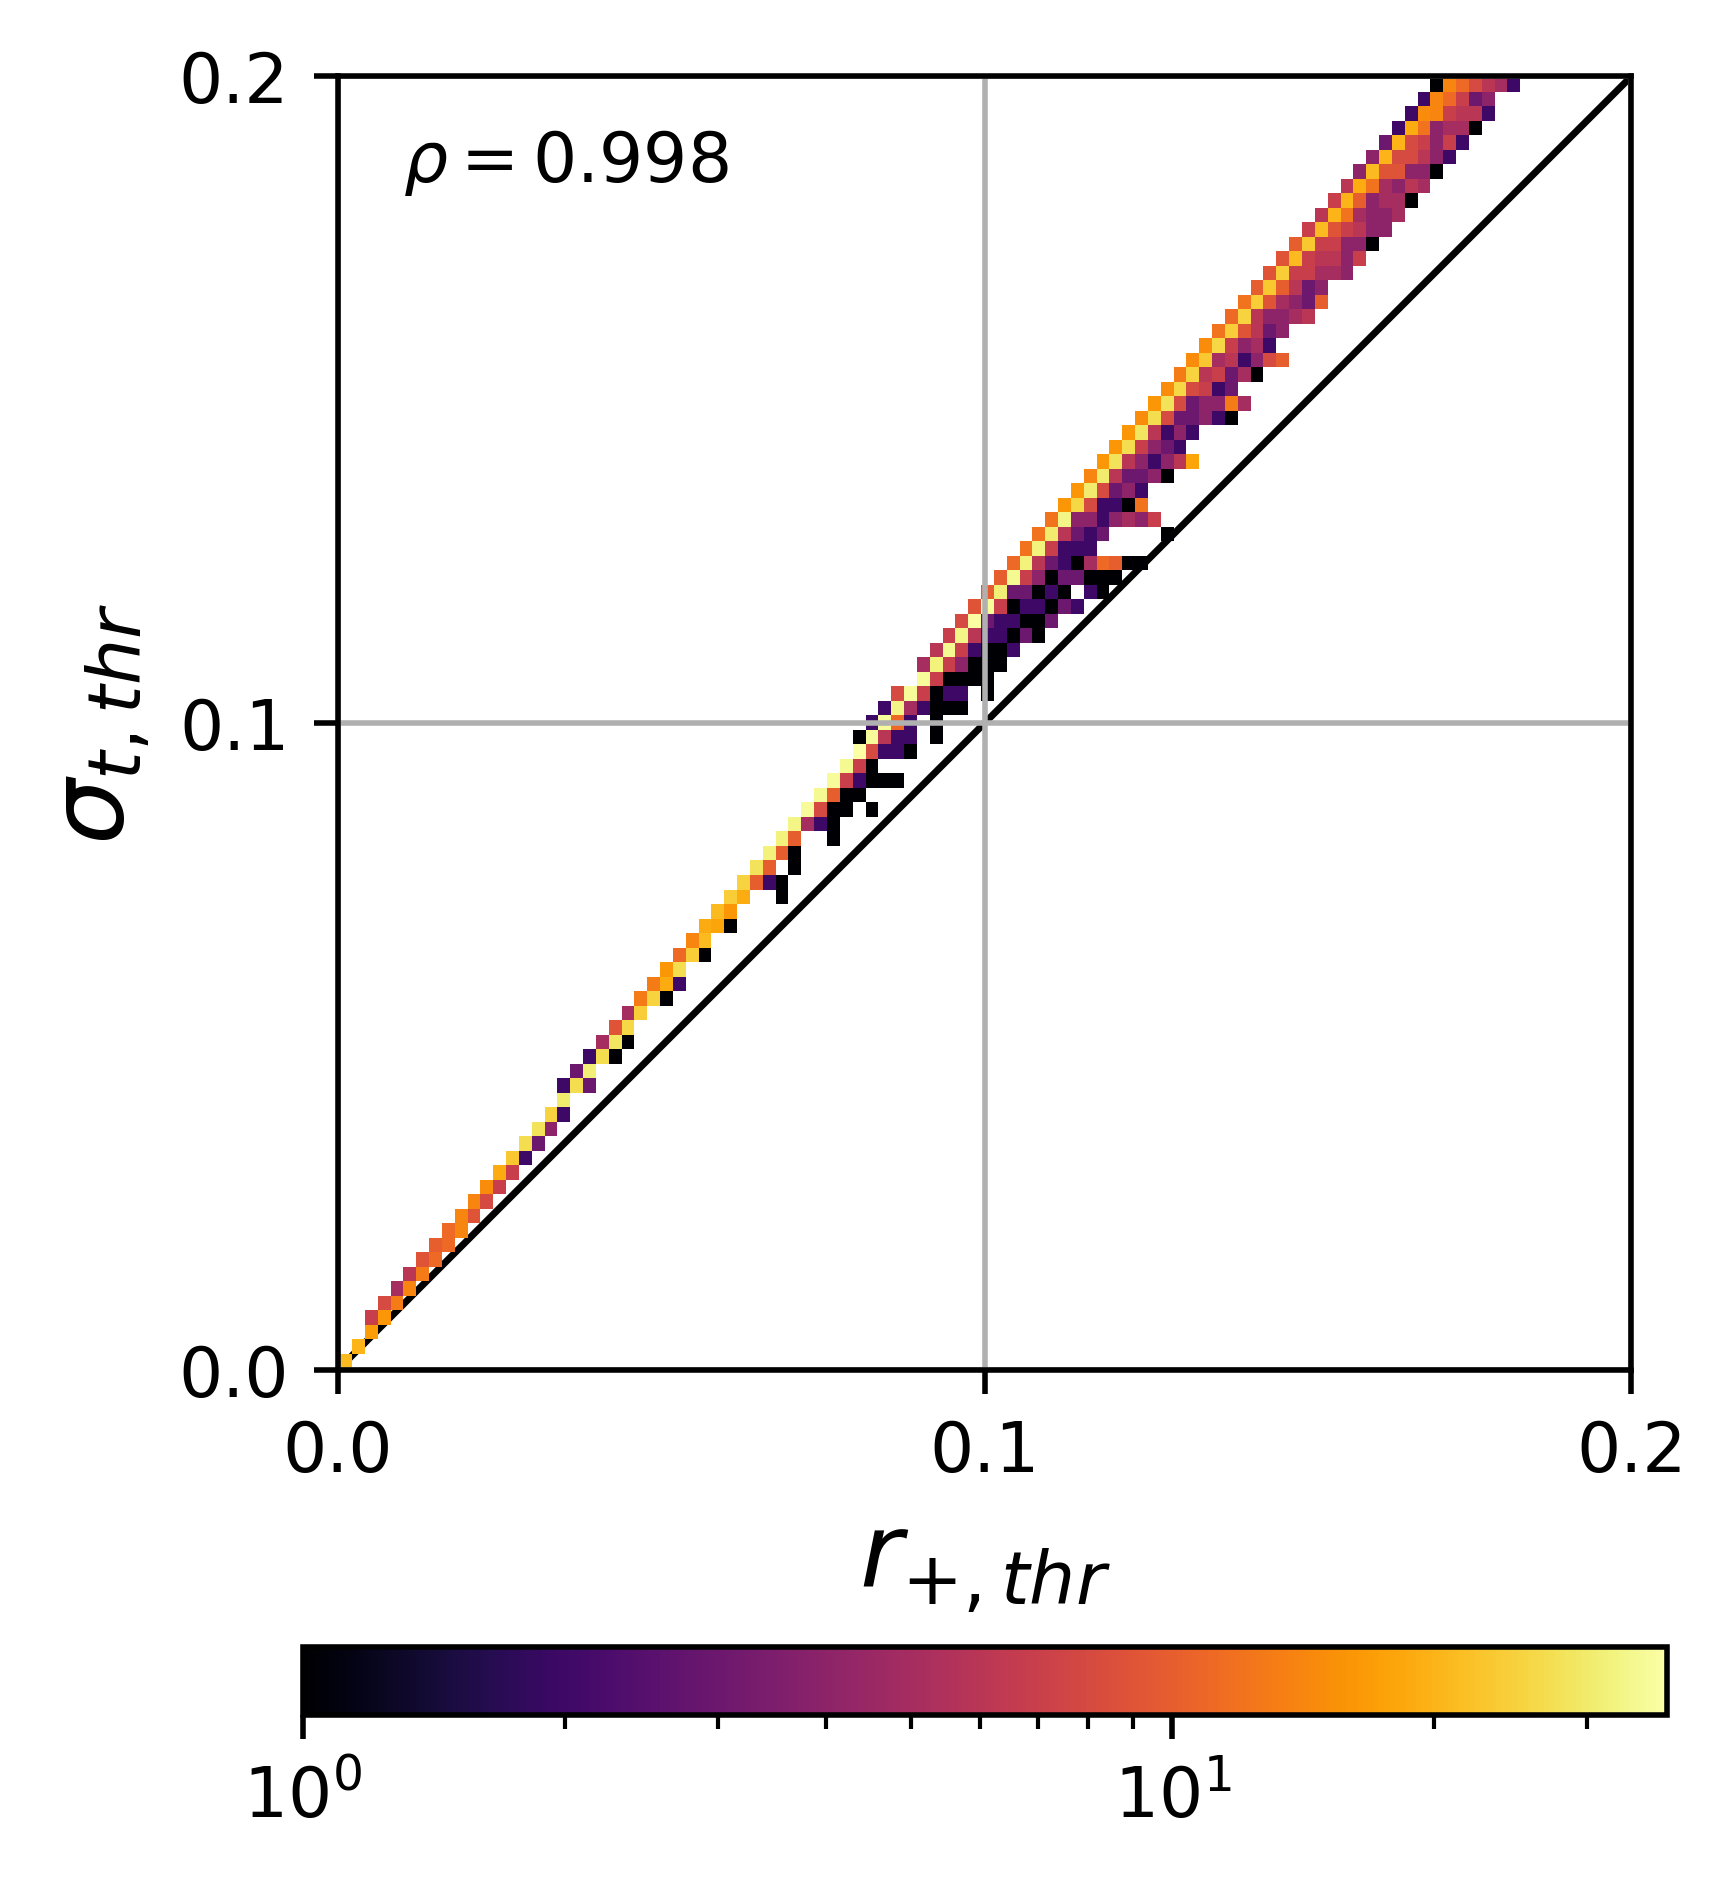

In [160]:
from matplotlib.colors import LogNorm
plt.figure(dpi=500)
# plt.scatter(NRPT,NRMT,s=1,c=MM,alpha=0.7,cmap='tab20b')
slice = np.isnan(RP) | np.isnan(sig_r)
plt.hist2d(RP[~slice].flatten(),sig_r[~slice].flatten(),bins=100,cmap='inferno',norm=LogNorm())

l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(RP[~slice],sig_r[~slice])
plt.text(0.05,0.96,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top',bbox=dict(facecolor='w', alpha=1,linewidth=0,pad=1))
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\sigma_{t,thr}$',fontsize=15)
plt.xlabel(r'$r_{+,thr}$',fontsize=15)
plt.colorbar(orientation='horizontal',shrink=0.55)
plt.grid()



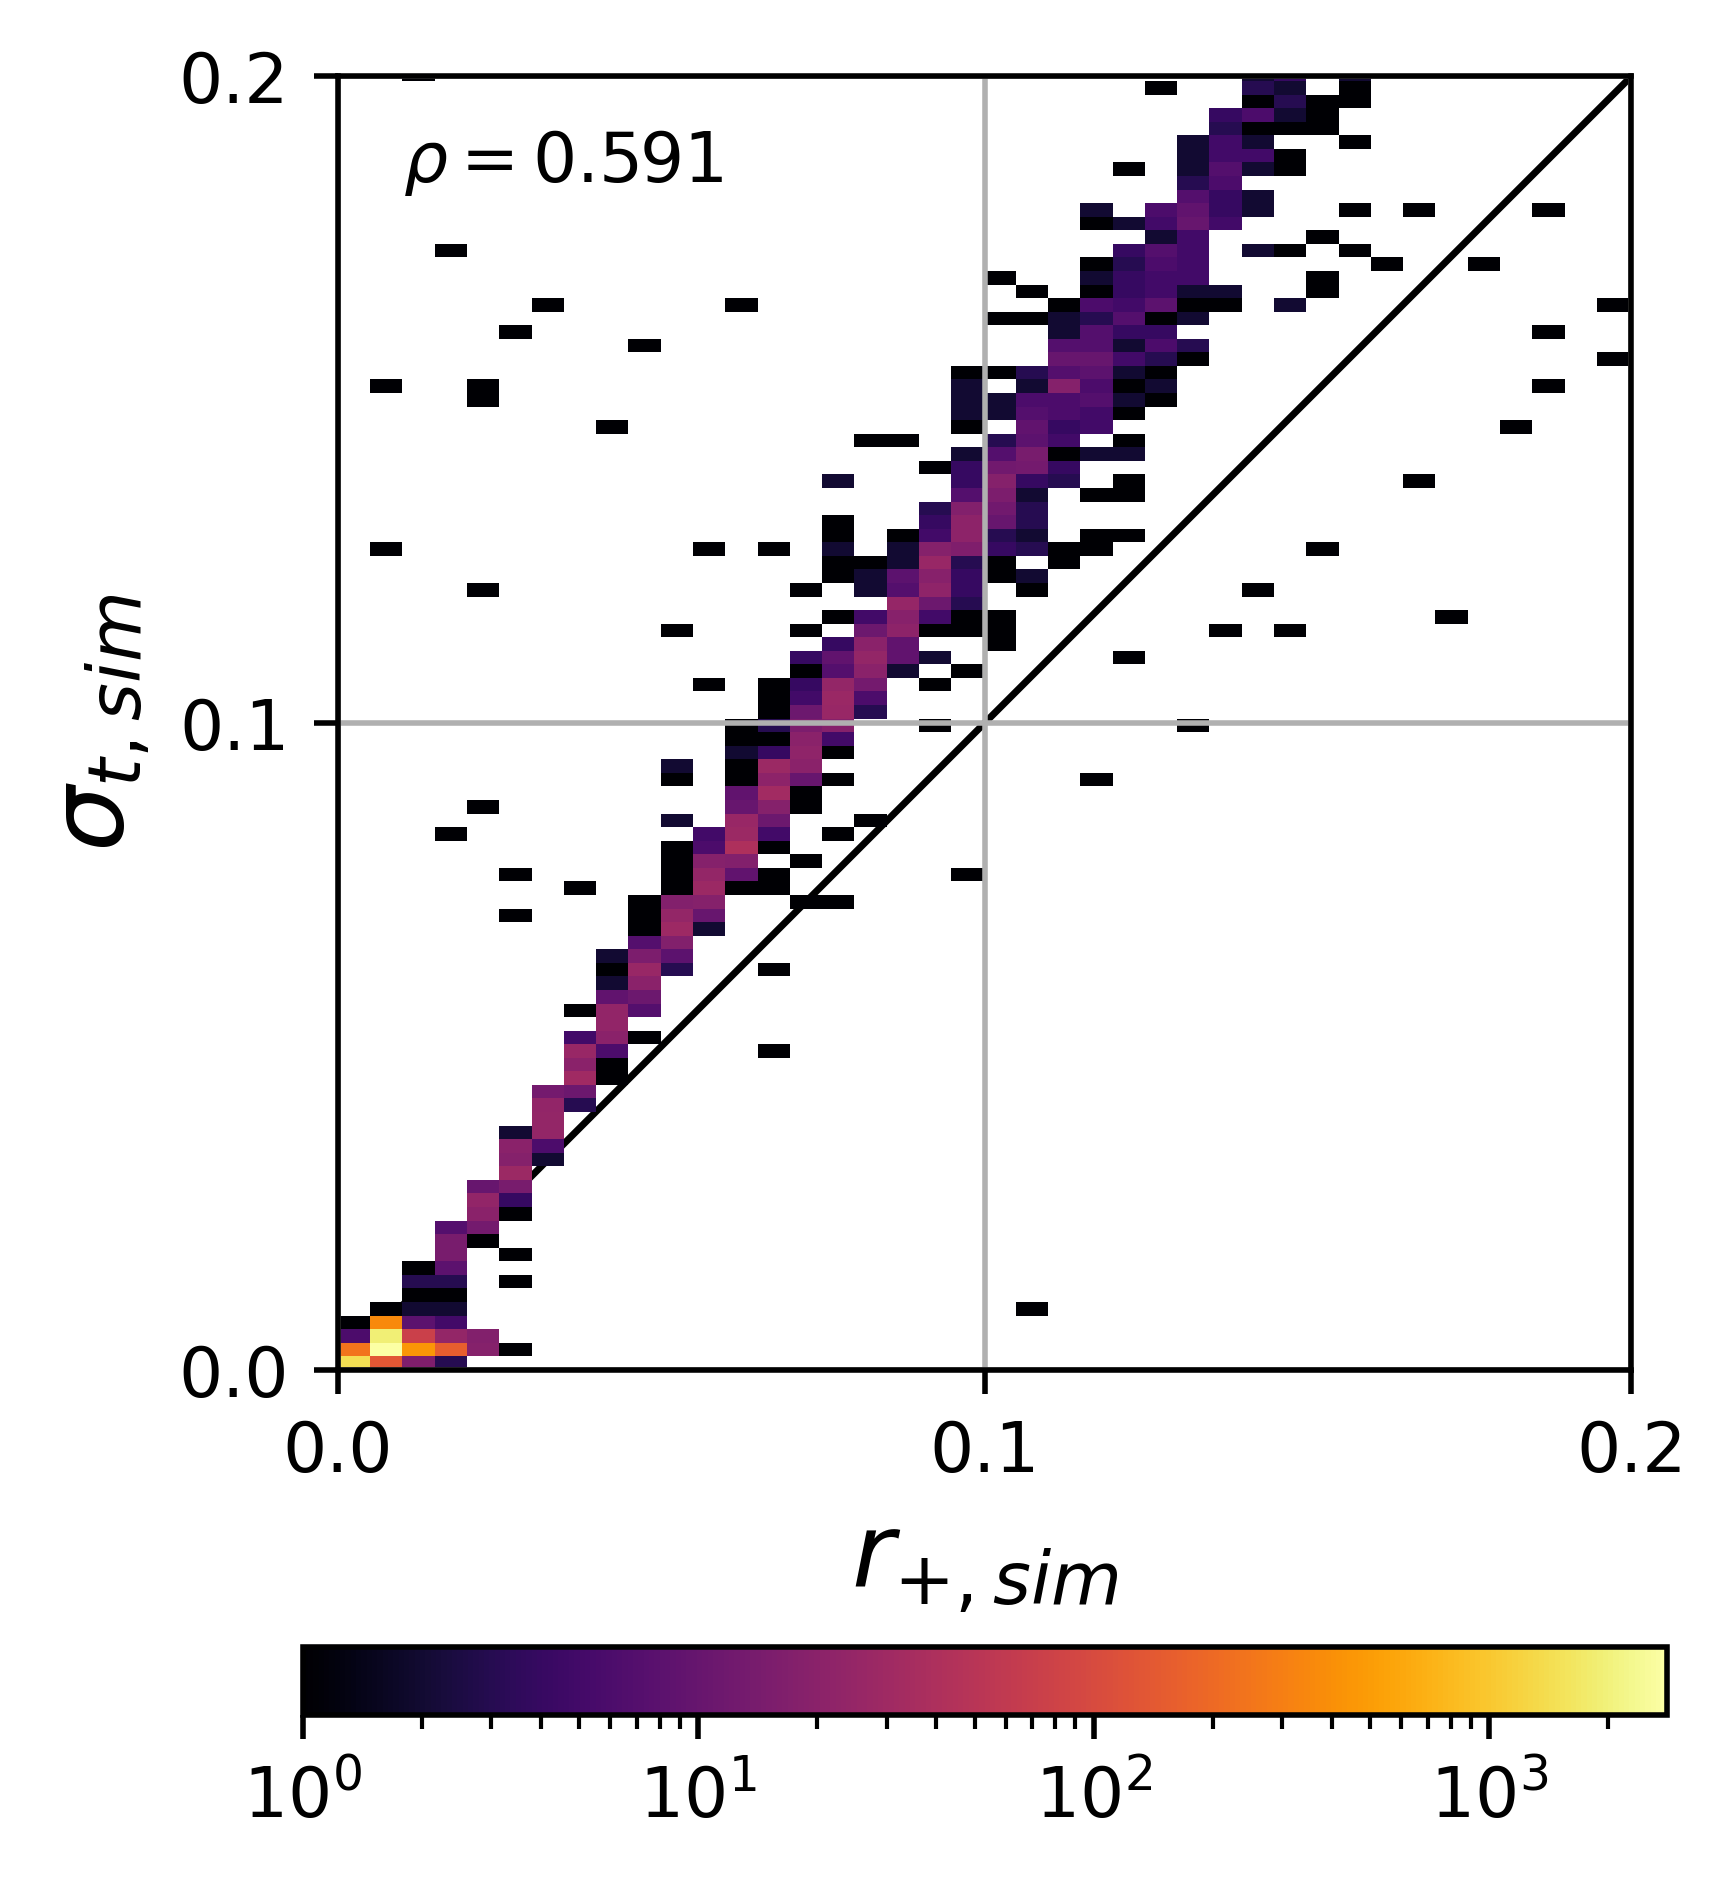

In [155]:
from matplotlib.colors import LogNorm
plt.figure(dpi=500)
# plt.scatter(NRPT,NRMT,s=1,c=MM,alpha=0.7,cmap='tab20b')
slice = np.isnan(NRPT) | np.isnan(NSIG_S)
plt.hist2d(NRPT[~slice].flatten(),NSIG_S[~slice].flatten(),bins=100,cmap='inferno',norm=LogNorm())

l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(NRPT[~slice],NSIG_S[~slice])
plt.text(0.05,0.96,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top',bbox=dict(facecolor='w', alpha=1,linewidth=0,pad=1))
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\sigma_{t,sim}$',fontsize=15)
plt.xlabel(r'$r_{+,sim}$',fontsize=15)
plt.colorbar(orientation='horizontal',shrink=0.55)
plt.grid()



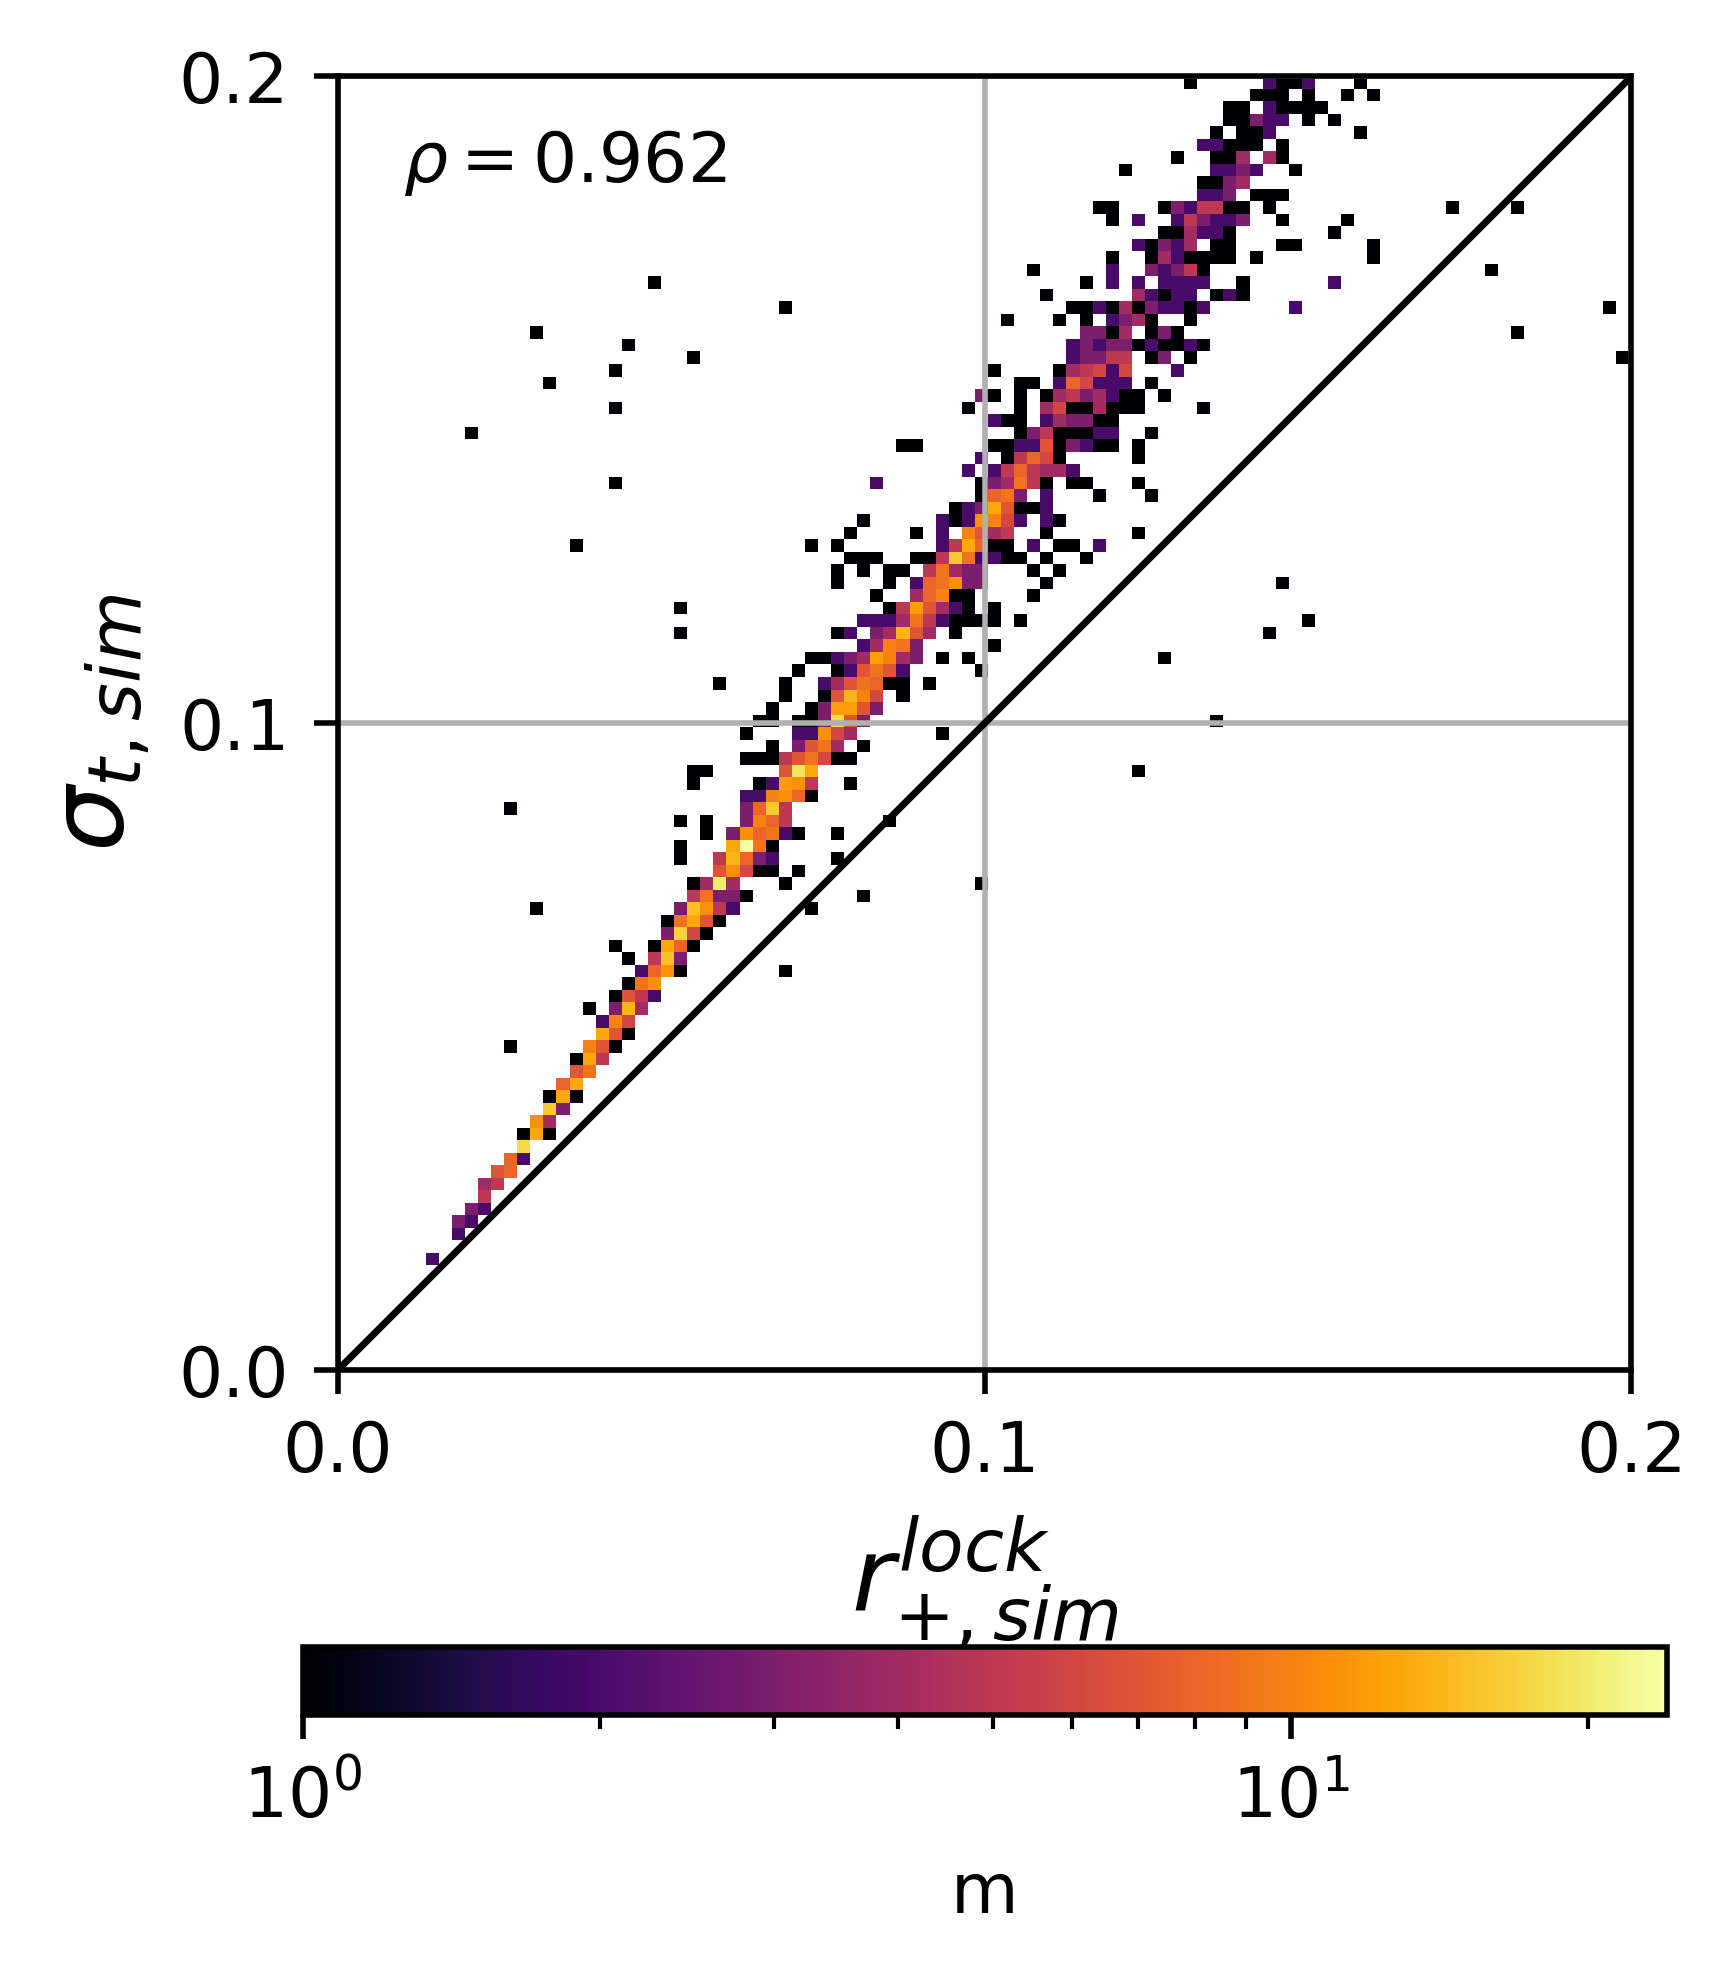

In [146]:
from matplotlib.colors import LogNorm
plt.figure(dpi=500)
# plt.scatter(NRPT,NRMT,s=1,c=MM,alpha=0.7,cmap='tab20b')
slice = np.isnan(NRP) | np.isnan(NSIG_S)
plt.hist2d(NRP[~slice].flatten(),NSIG_S[~slice].flatten(),bins=100,cmap='inferno',norm=LogNorm())

l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(NRP[~slice],NSIG_S[~slice])
plt.text(0.05,0.96,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top',bbox=dict(facecolor='w', alpha=1,linewidth=0,pad=1))
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\sigma_{t,sim}$',fontsize=15)
plt.xlabel(r'$r_{+,sim}^{lock}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal',shrink=0.55)
plt.grid()



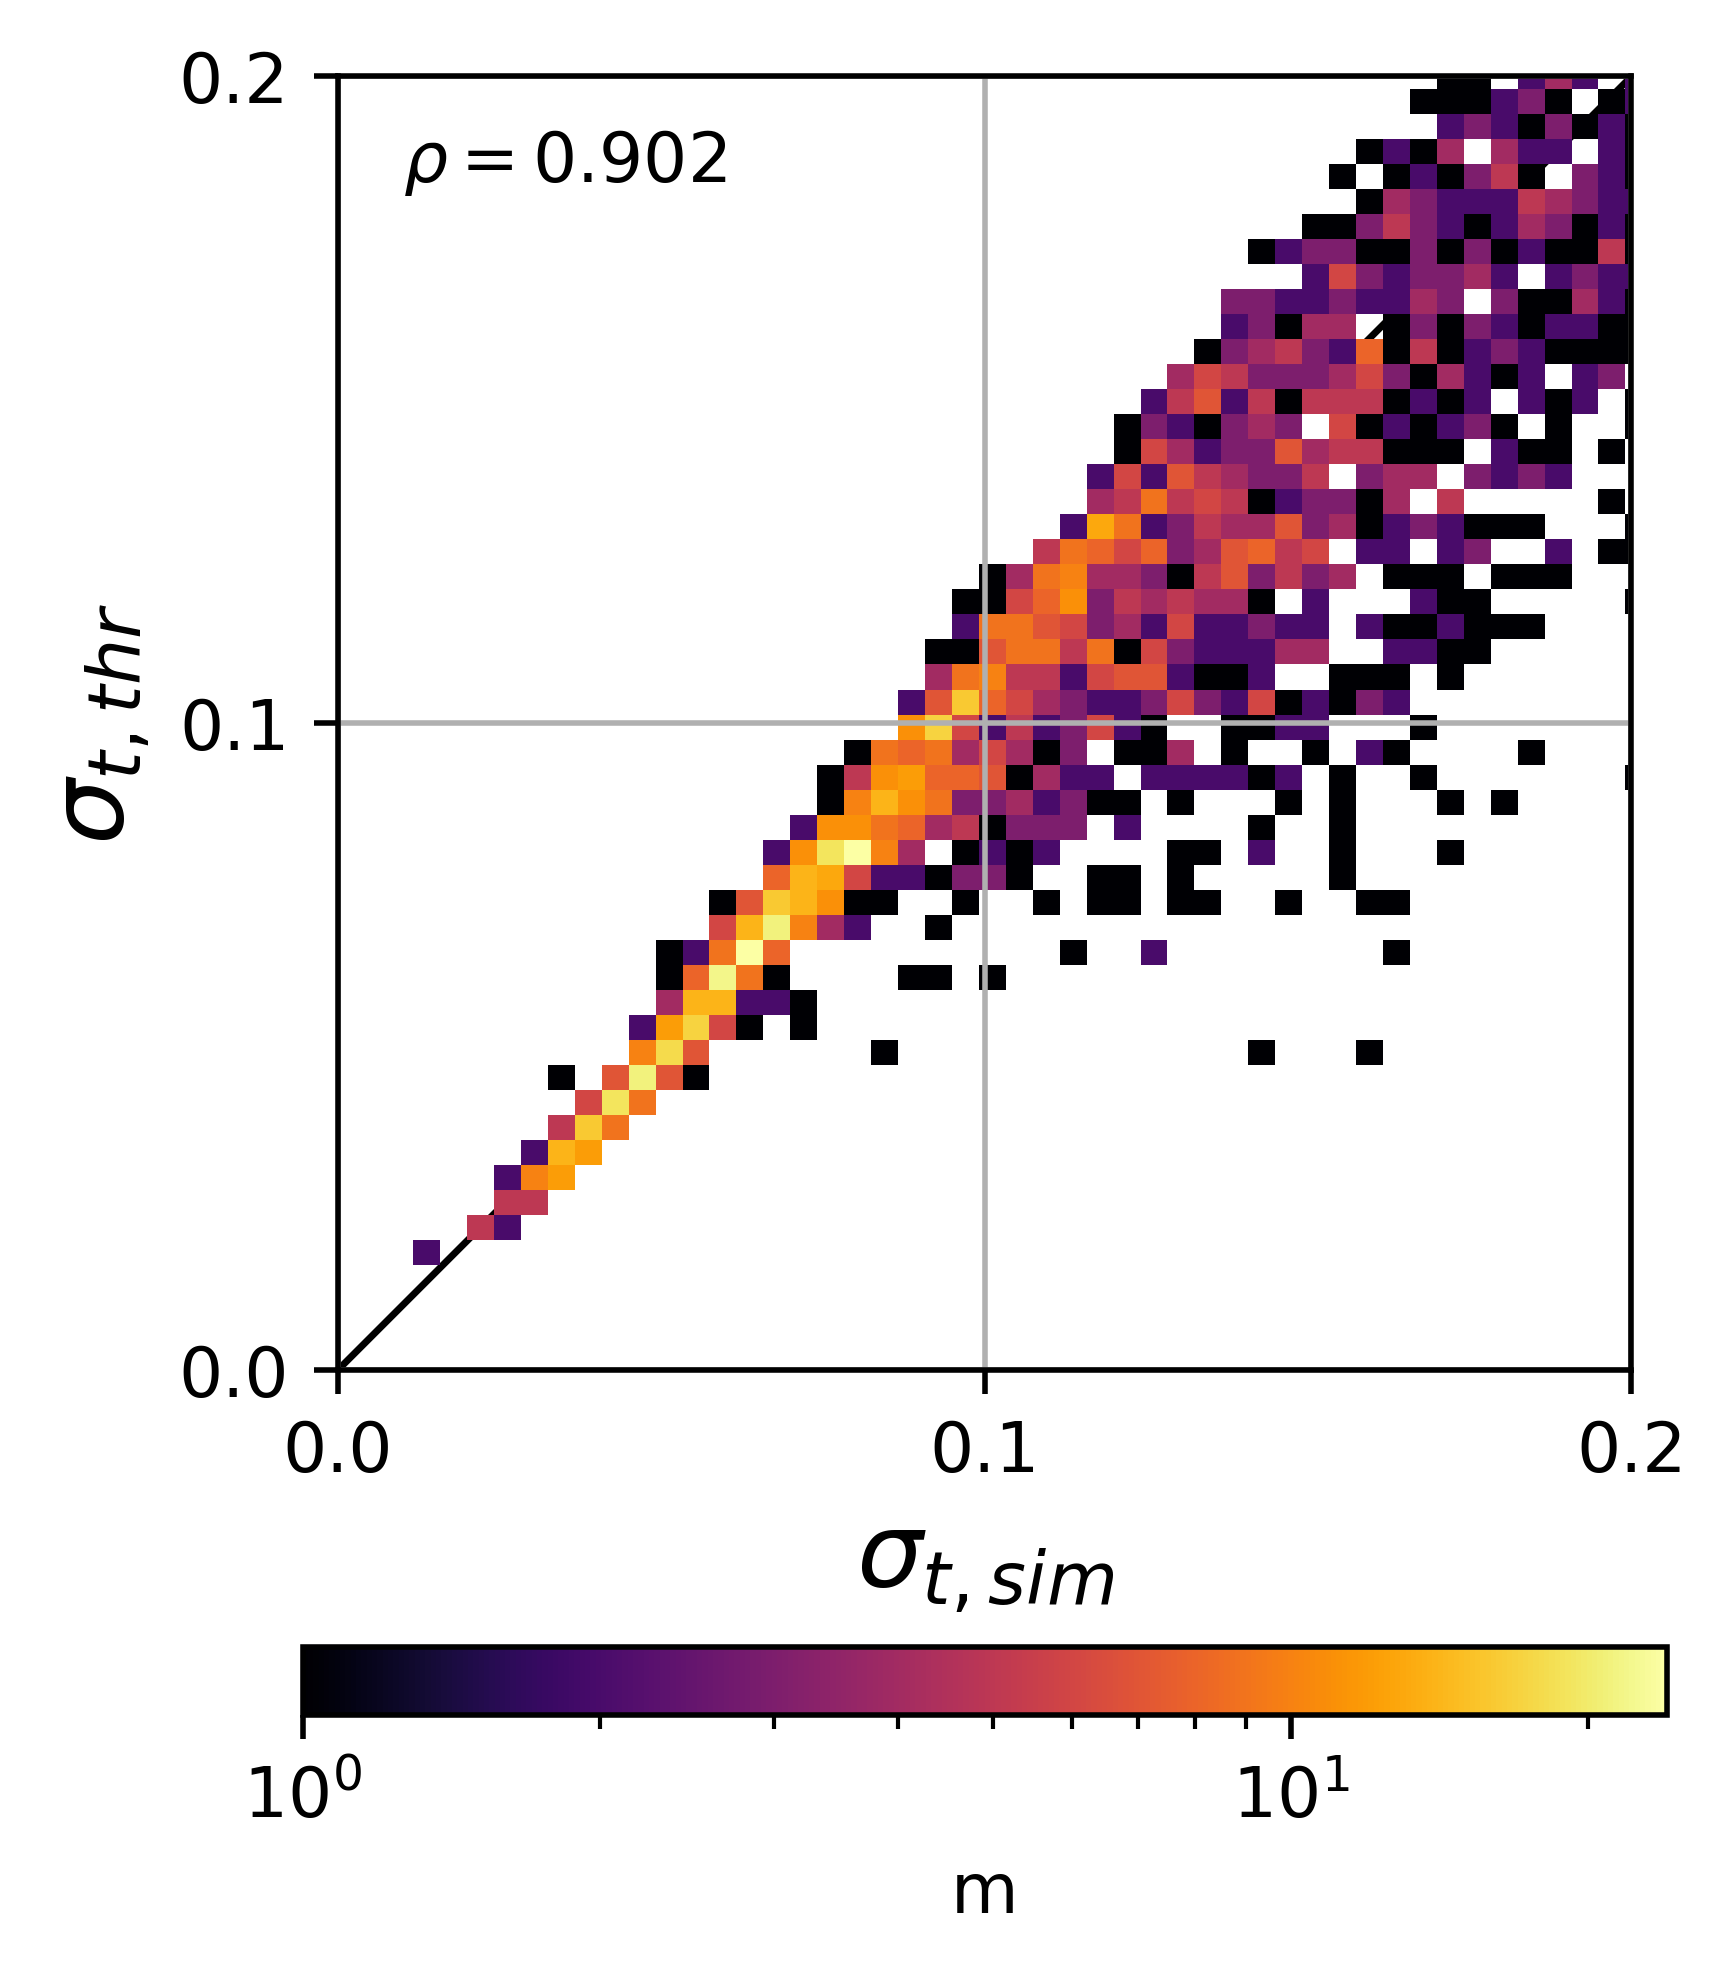

In [149]:
from matplotlib.colors import LogNorm
plt.figure(dpi=500)
# plt.scatter(NRPT,NRMT,s=1,c=MM,alpha=0.7,cmap='tab20b')
slice = np.isnan(NRP) | np.isnan(NSIG_S)
plt.hist2d(sig_r[~slice].flatten(),NSIG_S[~slice].flatten(),bins=50,cmap='inferno',norm=LogNorm())

l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(sig_r[~slice],NSIG_S[~slice])
plt.text(0.05,0.96,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top',bbox=dict(facecolor='w', alpha=1,linewidth=0,pad=1))
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\sigma_{t,thr}$',fontsize=15)
plt.xlabel(r'$\sigma_{t,sim}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal',shrink=0.55)
plt.grid()



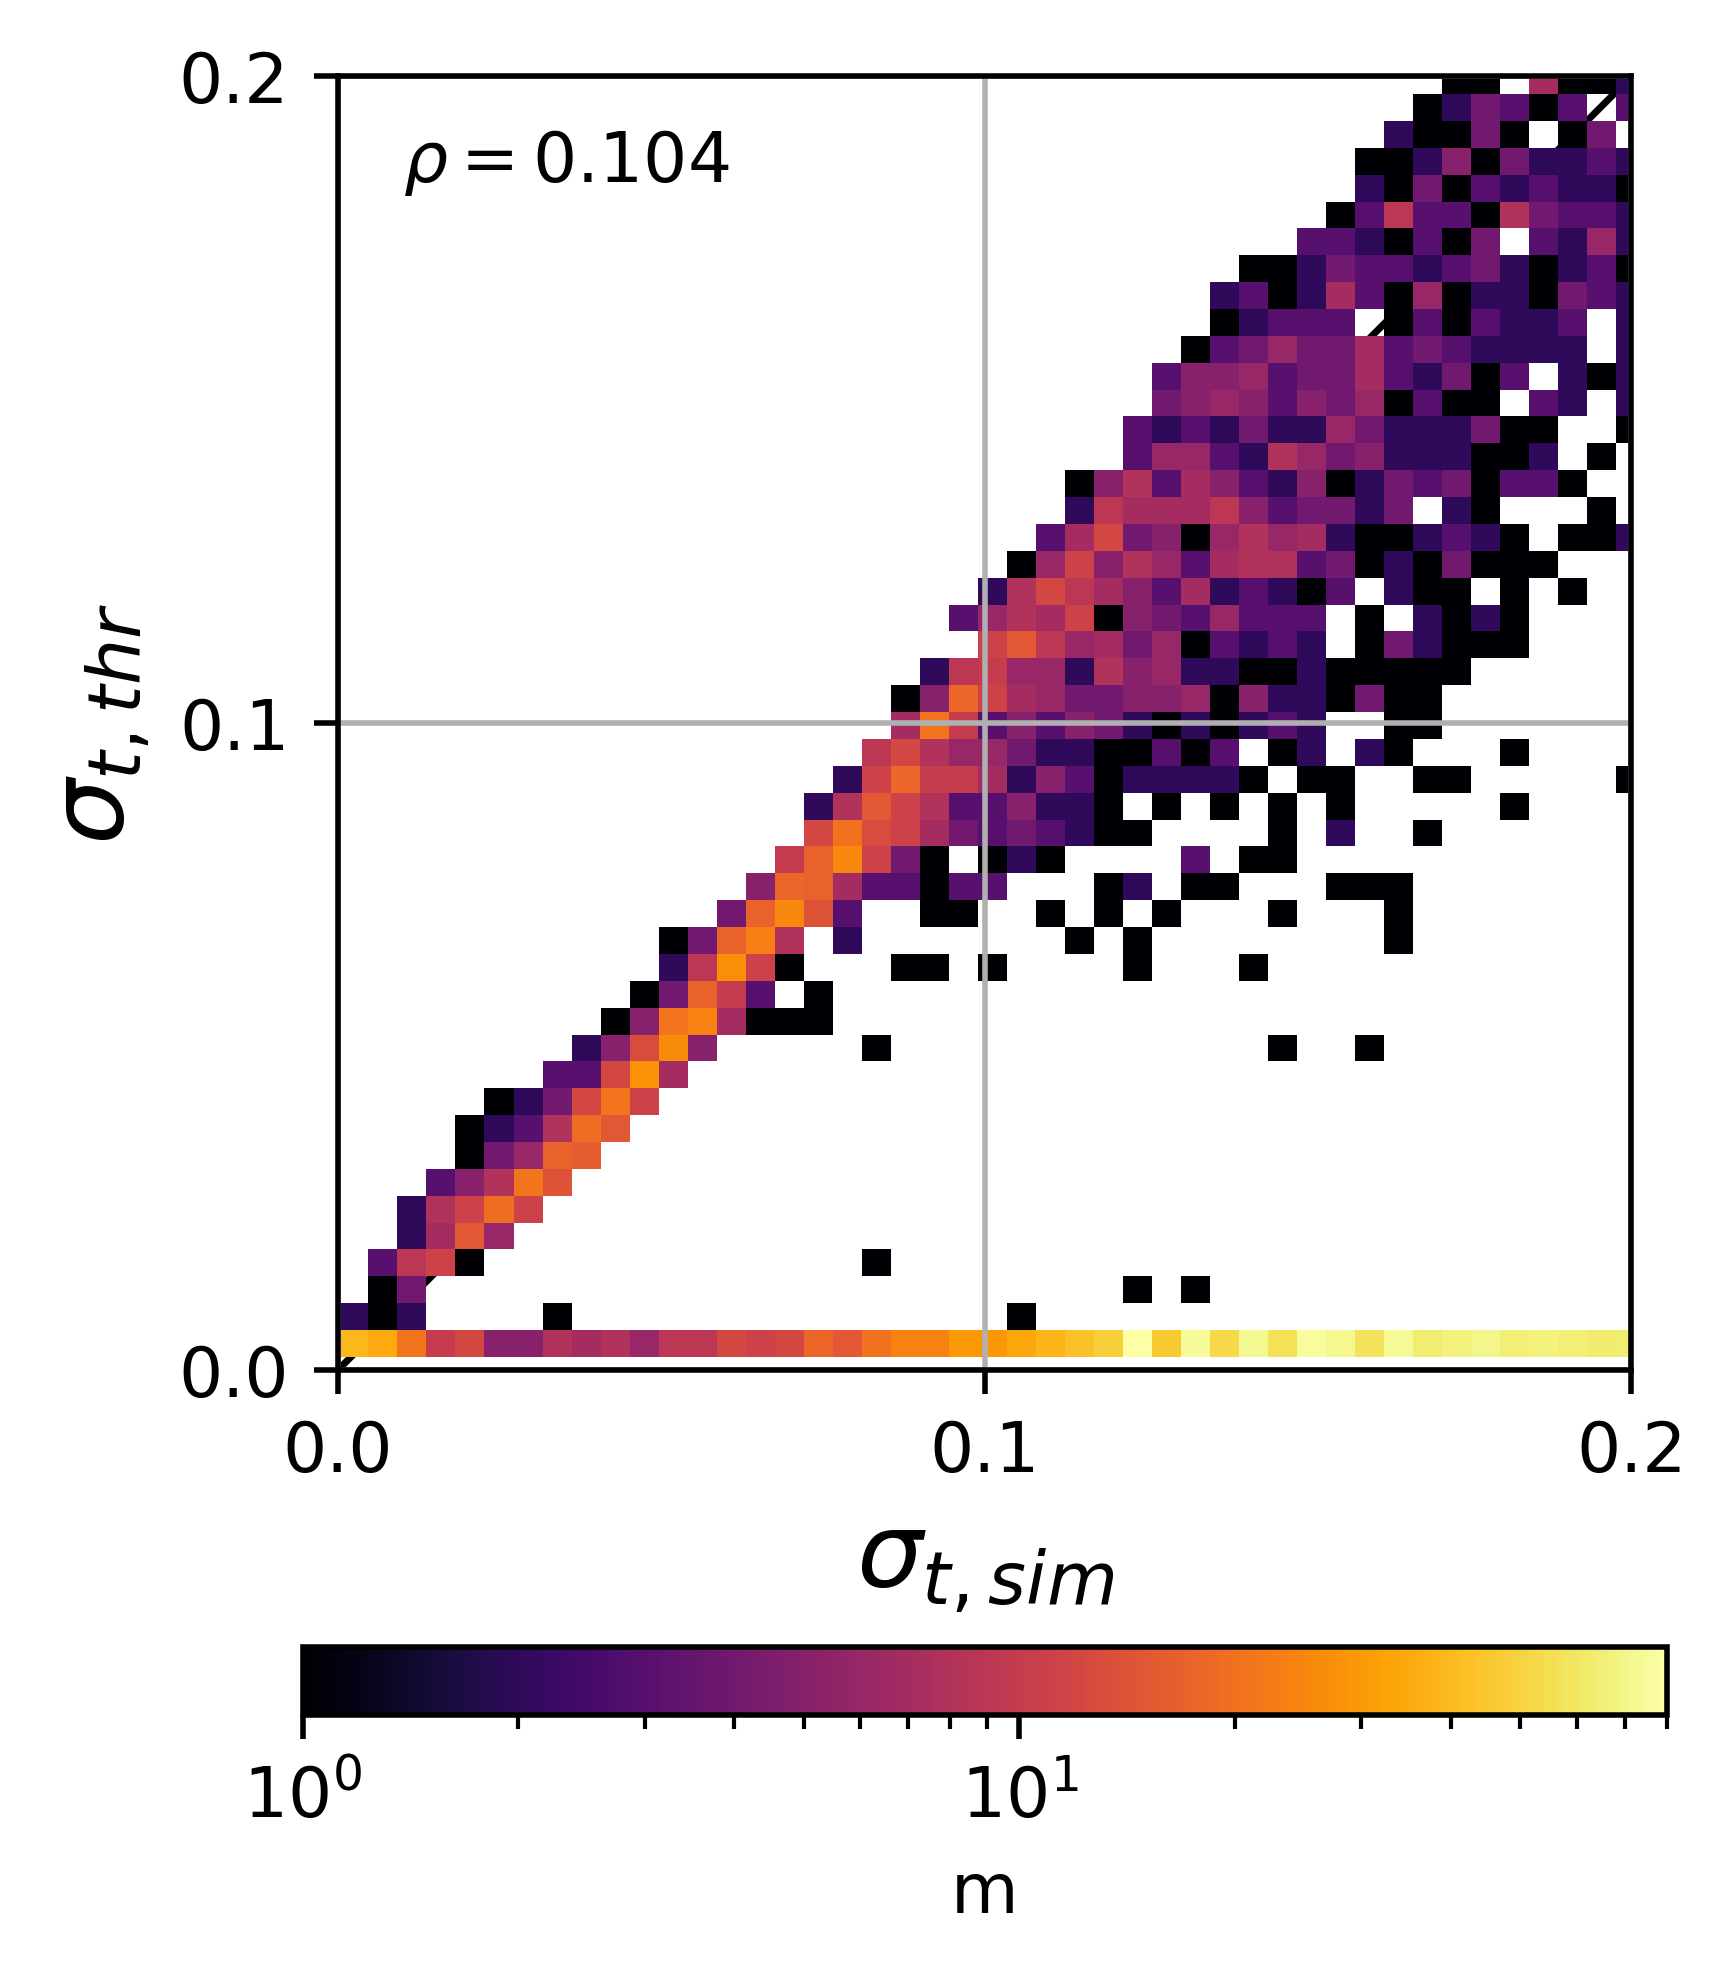

In [151]:
from matplotlib.colors import LogNorm
plt.figure(dpi=500)
# plt.scatter(NRPT,NRMT,s=1,c=MM,alpha=0.7,cmap='tab20b')
slice = np.isnan(sig_r) | np.isnan(NSIG_S)
plt.hist2d(sig_r[~slice].flatten(),NSIG_S[~slice].flatten(),bins=50,cmap='inferno',norm=LogNorm())

l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1,zorder=-10)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(sig_r[~slice],NSIG_S[~slice])
plt.text(0.05,0.96,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top',bbox=dict(facecolor='w', alpha=1,linewidth=0,pad=1))
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.ylabel(r'$\sigma_{t,thr}$',fontsize=15)
plt.xlabel(r'$\sigma_{t,sim}$',fontsize=15)
plt.colorbar(label='m',orientation='horizontal',shrink=0.55)
plt.grid()



# $r_+$ thr vs sim

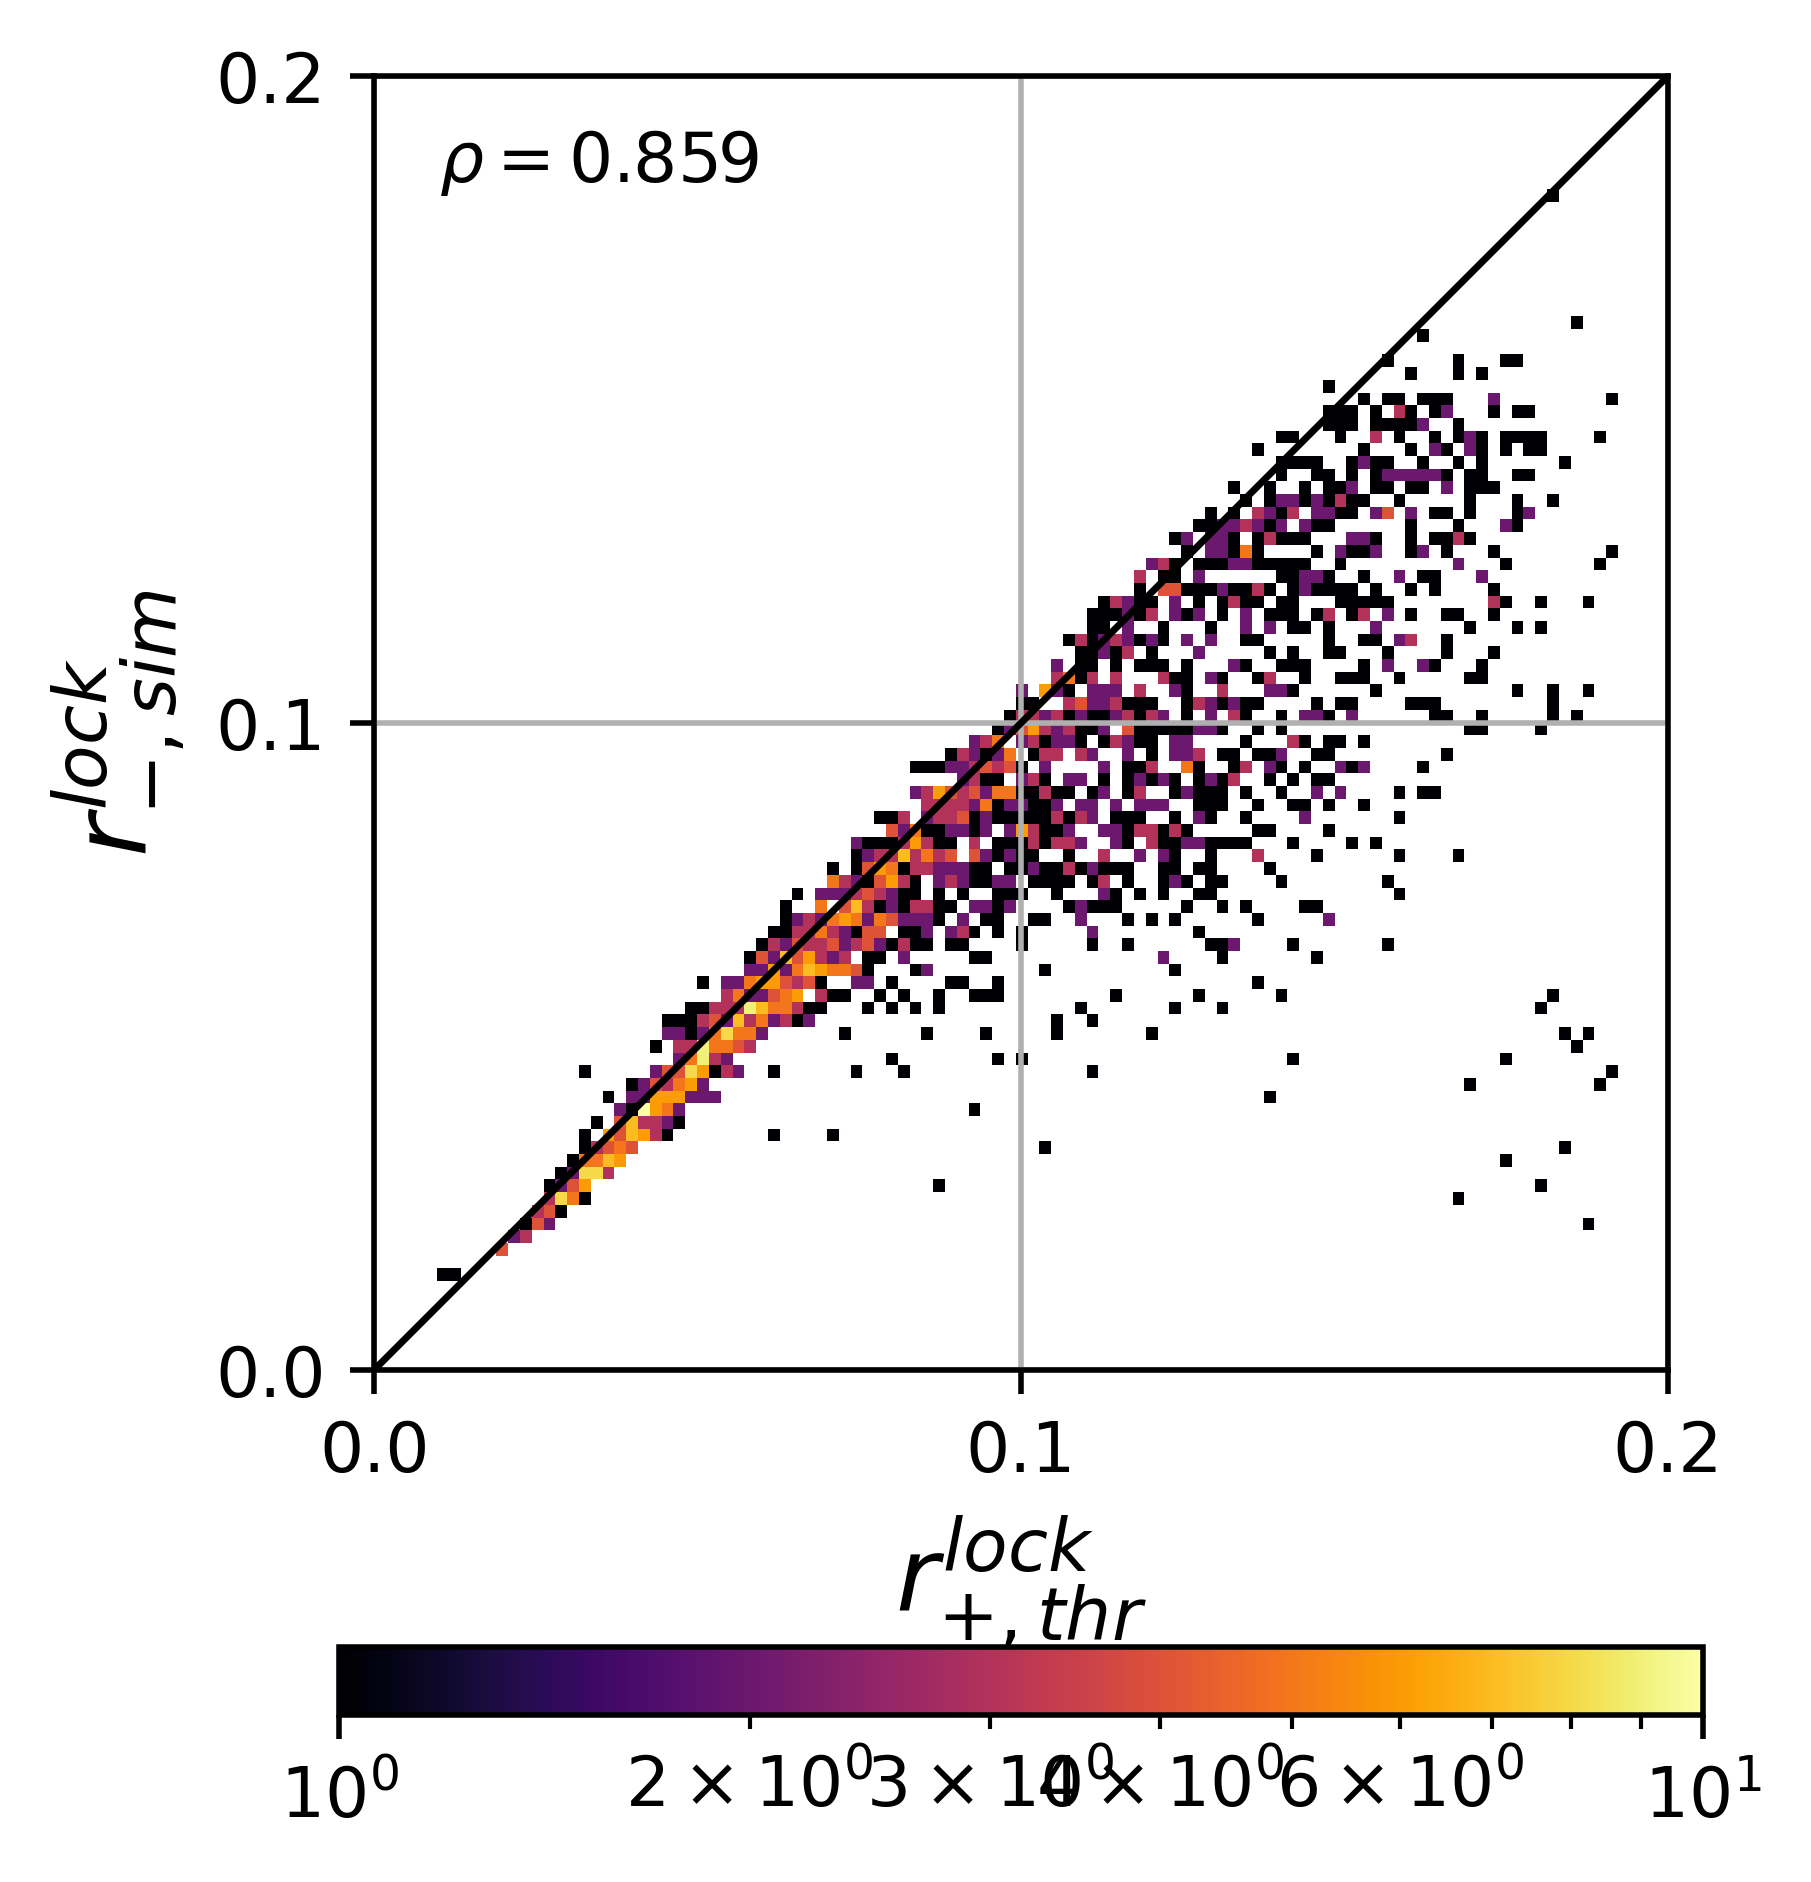

In [177]:
from matplotlib.colors import LogNorm
plt.figure(dpi=500)
# plt.scatter(NRPT,NRMT,s=1,c=MM,alpha=0.7,cmap='tab20b')
slice = np.isnan(RPl) | np.isnan(NRM)
plt.hist2d(RPl[~slice].flatten(),NRM[~slice].flatten(),bins=100,cmap='inferno',norm=LogNorm())

l = (0.0,0.2)
plt.plot(l,l,c='k',lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0.0,0.2)
plt.ylim(0.0,0.2)
plt.xticks([0.0,0.1,0.2],[0.0,0.1,0.2])
plt.yticks([0.0,0.1,0.2],[0.0,0.1,0.2])
rho = nan_corrcoef(RPl[~slice],NRM[~slice])
plt.text(0.05,0.96,fr'$\rho = {rho:.3f}$',transform=plt.gca().transAxes,fontsize=10,ha='left',va='top',bbox=dict(facecolor='w', alpha=1,linewidth=0,pad=1))
# plt.ylabel(r'$r_{0,sim}+r_{+,sim}+r_{-,sim}$',fontsize=15)
# plt.xlabel(r'$r_{0,analytic}+2r_{+,analytic}$',fontsize=15)

plt.xlabel(r'$r_{+,thr}^{lock}$',fontsize=15)
plt.ylabel(r'$r_{-,sim}^{lock}$',fontsize=15)
plt.colorbar(orientation='horizontal',shrink=0.55)
plt.grid()

